<a href="https://colab.research.google.com/github/DDMotinha/analisedasacoes/blob/main/questoes_trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

formatocoluna = [(1, 2), (3, 10), (11, 12), (13, 24), (28, 39), (109, 121)]
data = []
arquivos = ['/content/drive/MyDrive/COTACOES/COTAHIST_A2019.TXT', '/content/drive/MyDrive/COTACOES/COTAHIST_A2020.TXT', '/content/drive/MyDrive/COTACOES/COTAHIST_A2021.TXT', '/content/drive/MyDrive/COTACOES/COTAHIST_A2022.TXT']

# roda tudo
for arquivo in arquivos:
    with open(arquivo, 'r') as f:
        next(f)
        for linhatxt in f:
            row = []
            for tamanhocoluna in formatocoluna:
                colunavalor = linhatxt[tamanhocoluna[0]-1:tamanhocoluna[1]].strip()
                row.append(colunavalor)
            data.append(row)
df = pd.DataFrame(data, columns=['TIPREG', 'dt_pregao', 'codbdi', 'codneg', 'nomeres', 'preult'])
print(df)


        TIPREG dt_pregao codbdi        codneg       nomeres         preult
0           01  20190102     02         AALR3        ALLIAR  0000000001325
1           01  20190102     02        AAPL34         APPLE  0000000006041
2           01  20190102     02        ABBV34        ABBVIE  0000000034284
3           01  20190102     02         ABCB4    ABC BRASIL  0000000001712
4           01  20190102     02         ABEV3     AMBEV S/A  0000000001615
...        ...       ...    ...           ...           ...            ...
5980176     01  20221206     62        BRFS3T        BRF SA  0000000000800
5980177     01  20221212     62        BRFS3T        BRF SA  0000000000705
5980178     01  20221219     62        BRFS3T        BRF SA  0000000000695
5980179     01  20221221     62        BRFS3T        BRF SA  0000000000718
5980180     99  COTAHIST     .2  022BOVESPA 2  122900002117               

[5980181 rows x 6 columns]


In [ ]:
#TRABALHANDO OS INDICES
ibrx = pd.read_csv('/content/drive/MyDrive/COTACOES/IBXL - IBXLDia_20-03-23.csv')
ibov = pd.read_csv('/content/drive/MyDrive/COTACOES/IBOV - IBOVDia_20-03-23.csv')
acoesibrx = ibrx['Código'].values.tolist()
acoesibrx.pop()
acoesibov = ibov['Código'].values.tolist()
acoesibov.pop()
array_de_acoes_conjunto = np.unique(np.concatenate((acoesibov, acoesibrx))).tolist()

from collections import OrderedDict

lista_acao = list(OrderedDict.fromkeys(array_de_acoes_conjunto))
print(lista_acao)


['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'Quantidade Teórica Total', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3', 'RRRP3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']


In [ ]:

df = df[df["codneg"].isin(lista_acao)]
df['preult'] = df['preult'].astype(float) * 0.01

<ipython-input-81-127b6826b710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preult'] = df['preult'].astype(float) * 0.01


In [ ]:
df['dt_pregao'] = pd.to_datetime(df['dt_pregao'], format='%Y%m%d')
new_df = df.sort_values('dt_pregao', ascending=False)
print(new_df['preult'].isnull().sum())
#não será necessário preencher a média



        TIPREG  dt_pregao codbdi codneg       nomeres  preult
5031131     01 2022-12-29     02  CSNA3  SID NACIONAL   14.55
5031137     01 2022-12-29     02  GOAU4    GERDAU MET   12.97
5027992     01 2022-12-29     02  PETR3     PETROBRAS   28.04
5031140     01 2022-12-29     02  MRVE3           MRV    7.60
5031141     01 2022-12-29     02  PETZ3          PETZ    6.26
...        ...        ...    ...    ...           ...     ...
195         01 2019-01-02     02  ITSA4        ITAUSA   12.65
186         01 2019-01-02     02  HYPE3        HYPERA   31.15
179         01 2019-01-02     02  HAPV3       HAPVIDA   31.10
170         01 2019-01-02     02  GOLL4           GOL   25.45
4           01 2019-01-02     02  ABEV3     AMBEV S/A   16.15

[79142 rows x 6 columns]


In [ ]:
ultima_maior_data = df['dt_pregao'].max()
intervalo_datas = pd.date_range(end=ultima_maior_data, periods=13)
valores_intervalo = df[df['dt_pregao'].isin(intervalo_datas)]
print(valores_intervalo)

        TIPREG  dt_pregao codbdi codneg       nomeres  preult
4968176     01 2022-12-19     02  LWSA3       LOCAWEB    7.10
4970659     01 2022-12-19     02  CSAN3         COSAN   16.19
4970732     01 2022-12-19     02  DXCO3         DEXCO    7.35
4970833     01 2022-12-19     02  WEGE3           WEG   38.12
4970893     01 2022-12-19     02  VALE3          VALE   85.37
...        ...        ...    ...    ...           ...     ...
5067502     01 2022-12-28     02  SBSP3        SABESP   57.34
5067550     01 2022-12-28     02  CMIG4         CEMIG   11.17
5067553     01 2022-12-28     02  EMBR3       EMBRAER   14.20
5067555     01 2022-12-28     02  ITUB4  ITAUUNIBANCO   25.05
5067704     01 2022-12-28     02  SUZB3   SUZANO S.A.   48.13

[792 rows x 6 columns]


In [ ]:
valores_intervalo = valores_intervalo.sort_values('dt_pregao', ascending=False)
print(valores_intervalo)

        TIPREG  dt_pregao codbdi  codneg       nomeres  preult
5033177     01 2022-12-29     02   FLRY3        FLEURY   15.45
5029738     01 2022-12-29     02   TIMS3           TIM   12.40
5035083     01 2022-12-29     02   ITSA4        ITAUSA    8.51
5033417     01 2022-12-29     02  ENGI11      ENERGISA   44.21
5028666     01 2022-12-29     02   BBDC3      BRADESCO   13.47
...        ...        ...    ...     ...           ...     ...
4977676     01 2022-12-19     02   ECOR3   ECORODOVIAS    4.27
4977661     01 2022-12-19     02   GGBR4        GERDAU   29.75
4977639     01 2022-12-19     02   EGIE3  ENGIE BRASIL   37.08
4975143     01 2022-12-19     02   CIEL3         CIELO    4.73
4968176     01 2022-12-19     02   LWSA3       LOCAWEB    7.10

[792 rows x 6 columns]


In [ ]:
new_df = valores_intervalo
new_df['diferenca_log'] = new_df.groupby('codneg')['preult'].apply(lambda x: np.log(x) - np.log(x.shift(1)))
new_df['diferenca_pct'] = new_df.groupby('codneg')['preult'].apply(lambda x: x.pct_change())
print(new_df)

        TIPREG  dt_pregao codbdi  codneg       nomeres  preult  diferenca_log  \
5033177     01 2022-12-29     02   FLRY3        FLEURY   15.45            NaN   
5029738     01 2022-12-29     02   TIMS3           TIM   12.40            NaN   
5035083     01 2022-12-29     02   ITSA4        ITAUSA    8.51            NaN   
5033417     01 2022-12-29     02  ENGI11      ENERGISA   44.21            NaN   
5028666     01 2022-12-29     02   BBDC3      BRADESCO   13.47            NaN   
...        ...        ...    ...     ...           ...     ...            ...   
4977676     01 2022-12-19     02   ECOR3   ECORODOVIAS    4.27       0.000000   
4977661     01 2022-12-19     02   GGBR4        GERDAU   29.75      -0.023257   
4977639     01 2022-12-19     02   EGIE3  ENGIE BRASIL   37.08      -0.020553   
4975143     01 2022-12-19     02   CIEL3         CIELO    4.73      -0.029169   
4968176     01 2022-12-19     02   LWSA3       LOCAWEB    7.10      -0.060127   

         diferenca_pct  
50

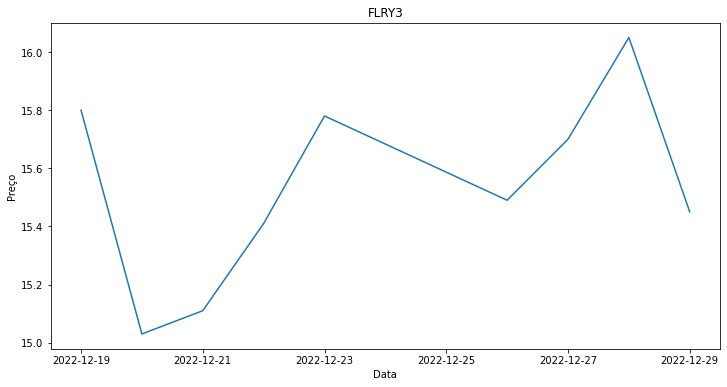

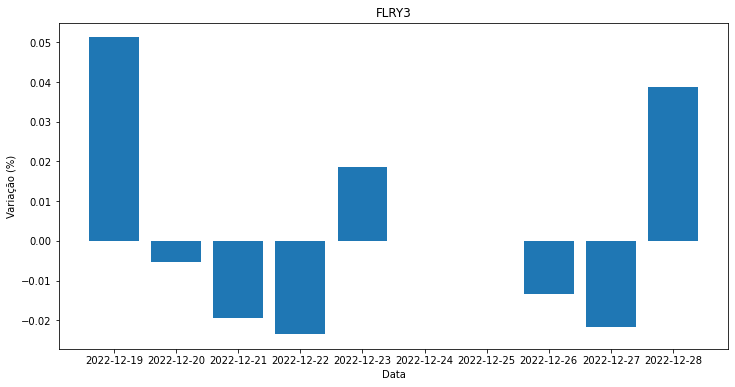

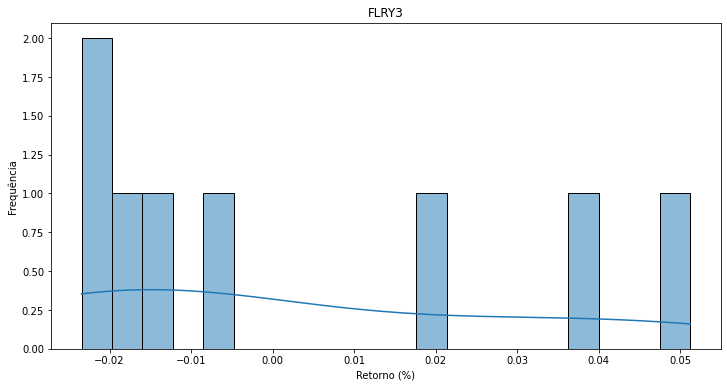

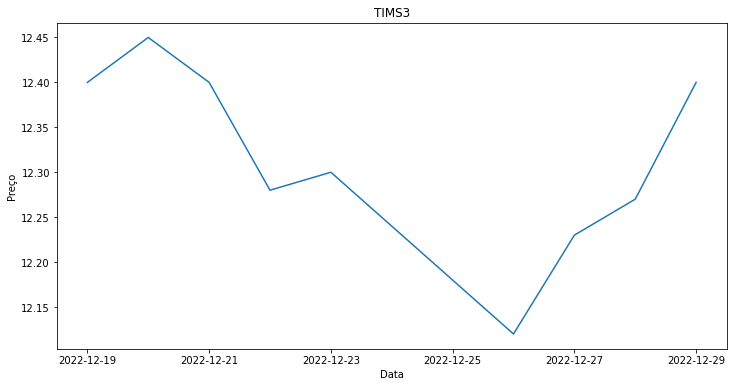

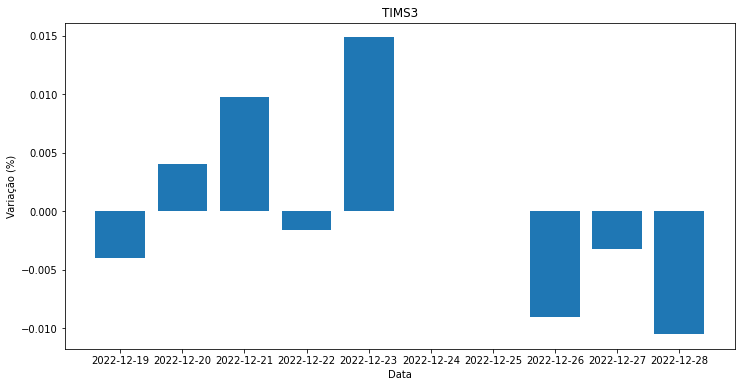

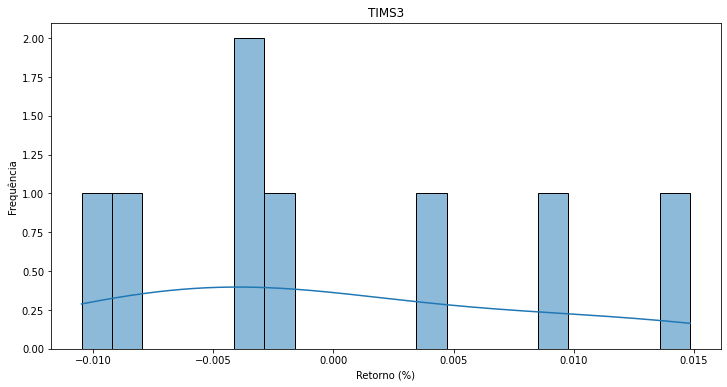

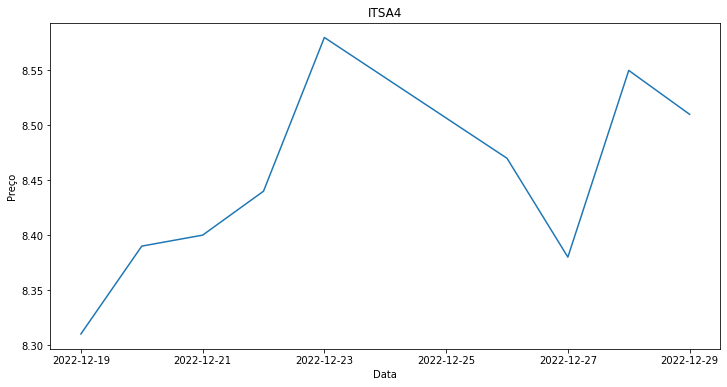

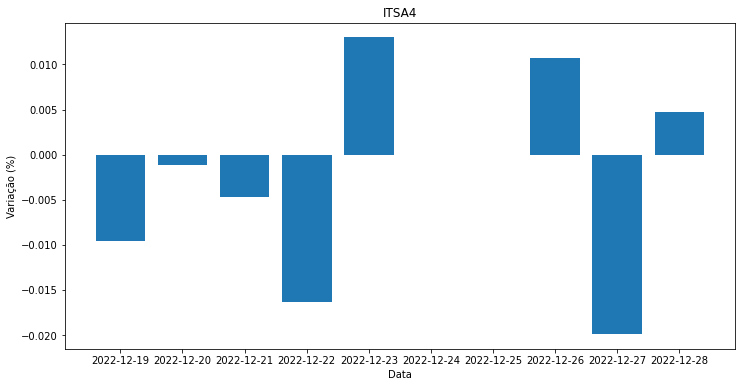

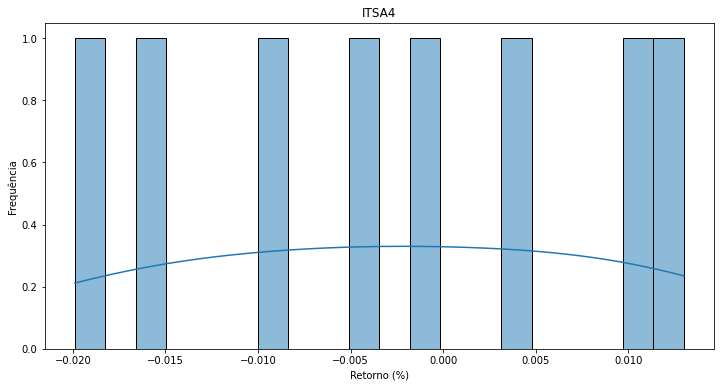

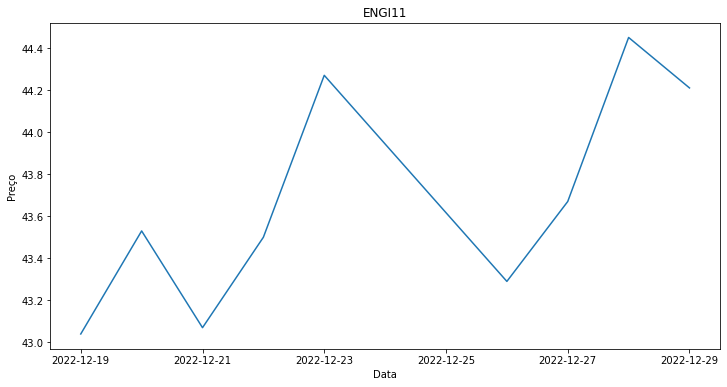

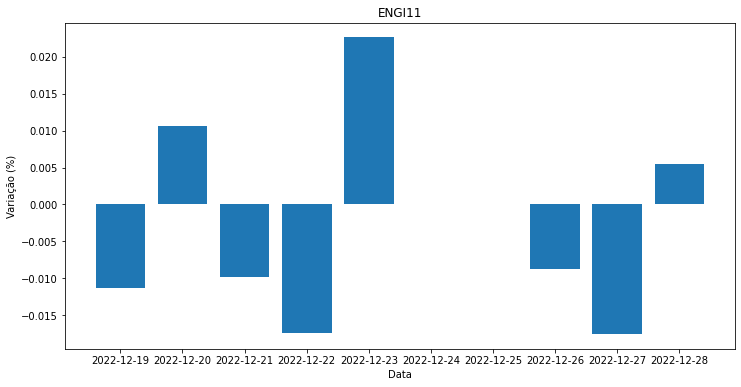

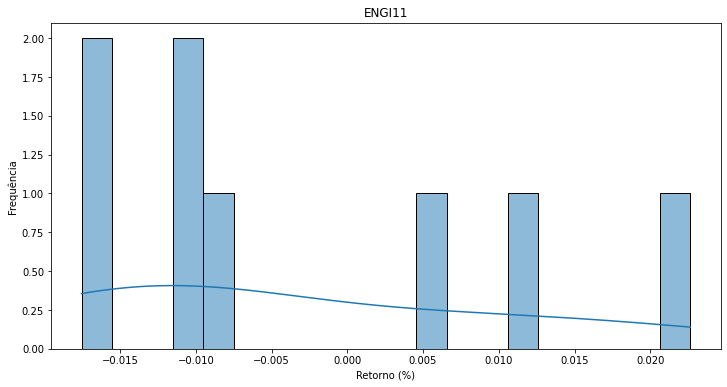

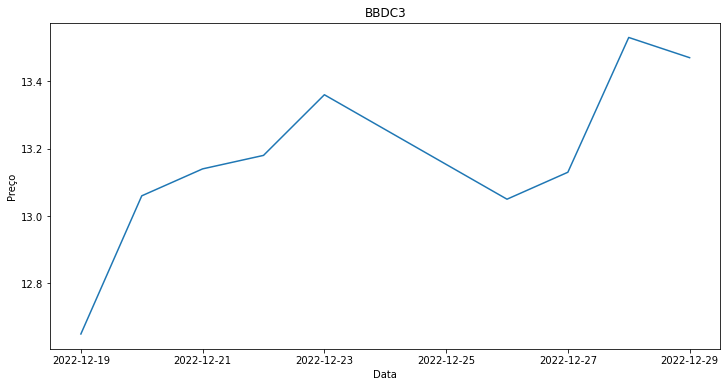

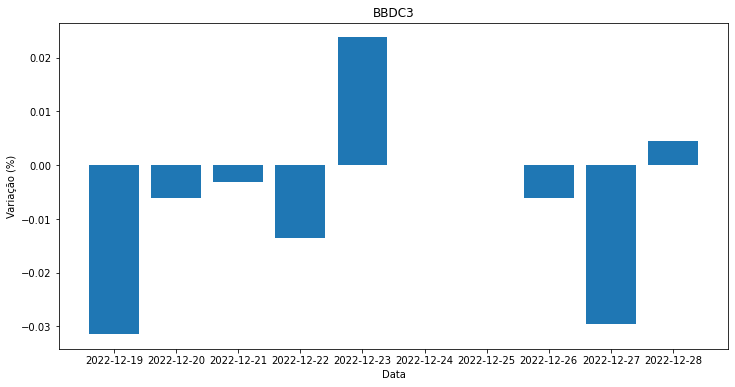

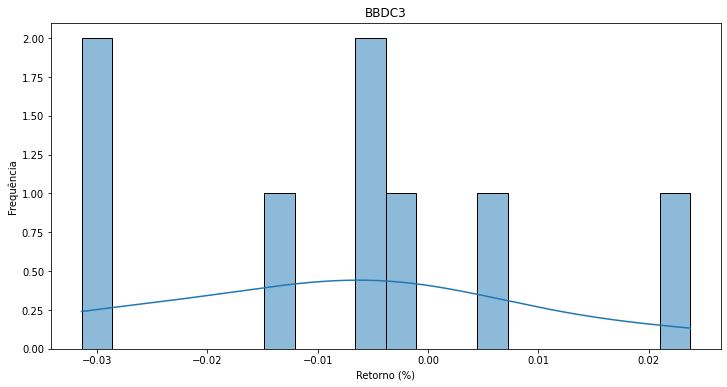

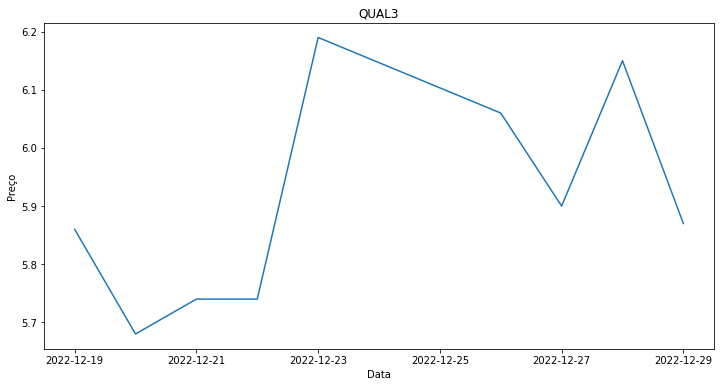

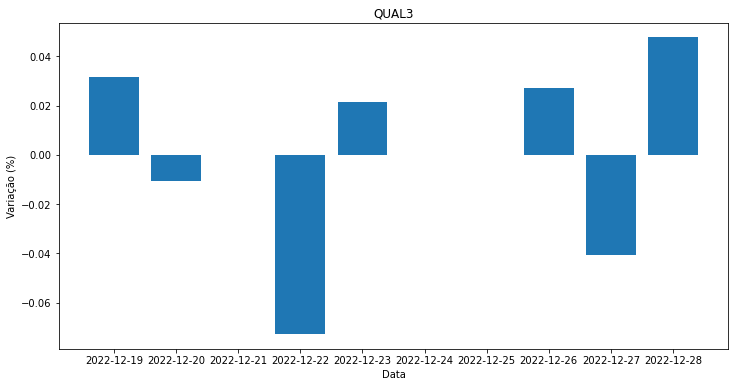

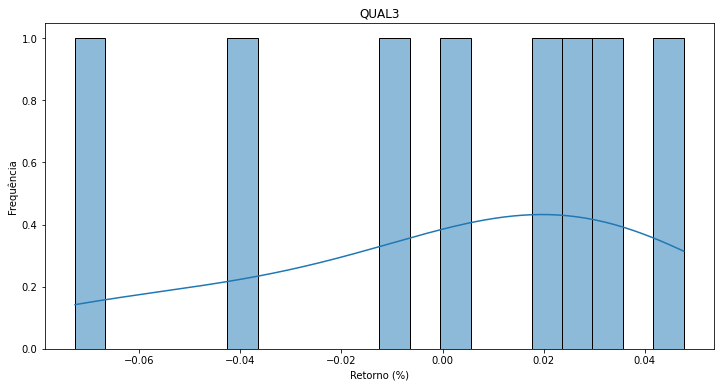

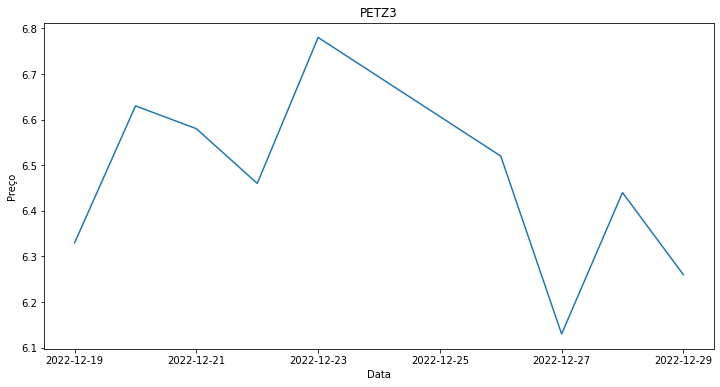

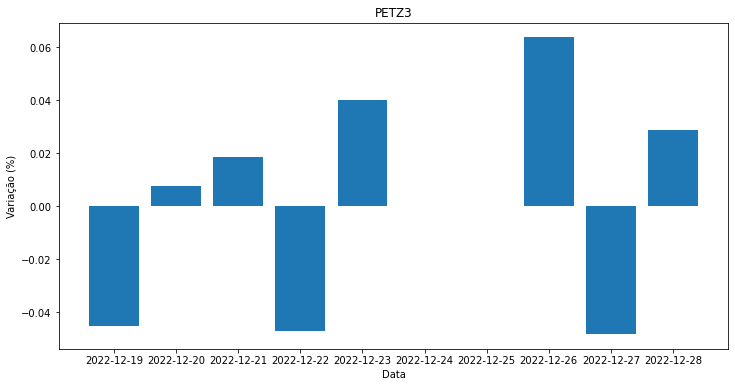

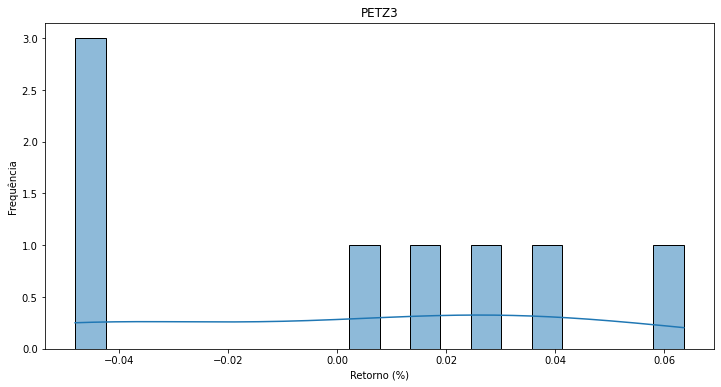

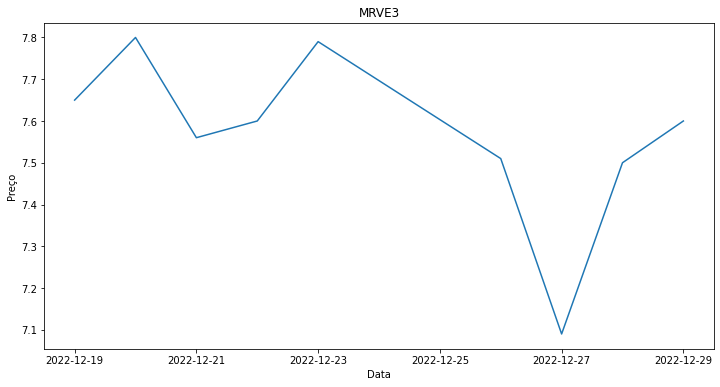

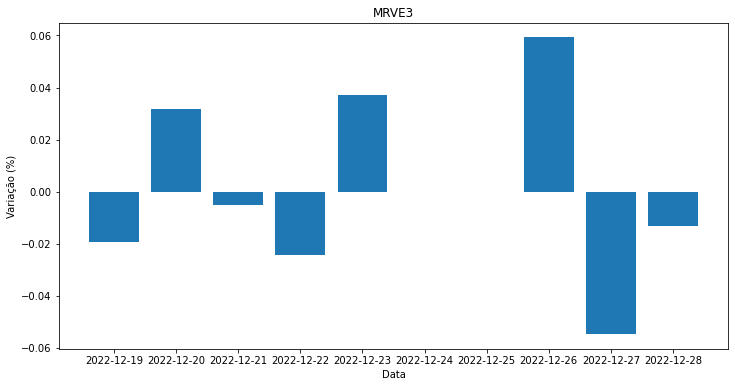

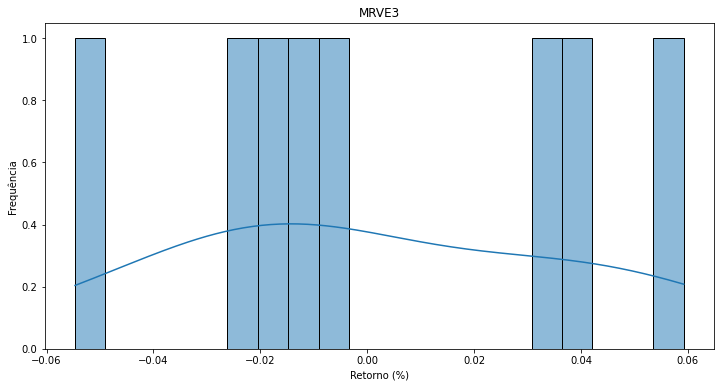

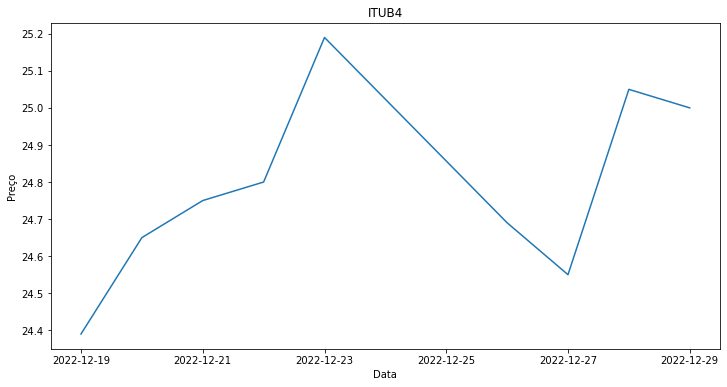

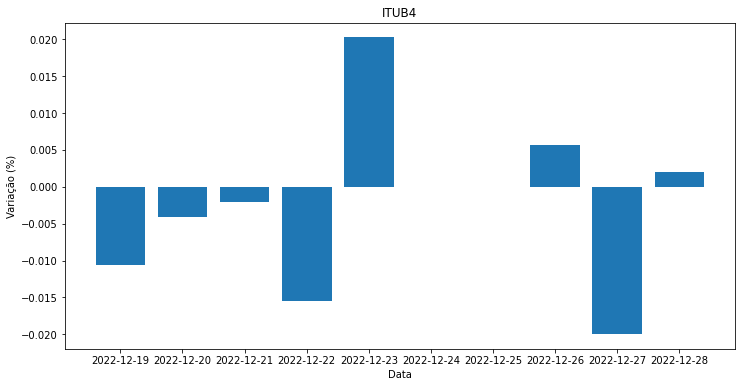

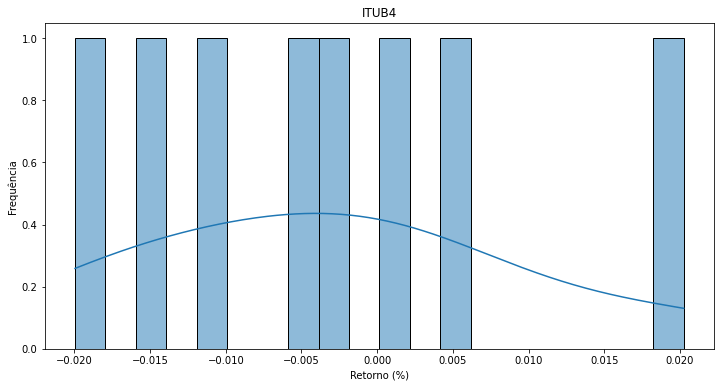

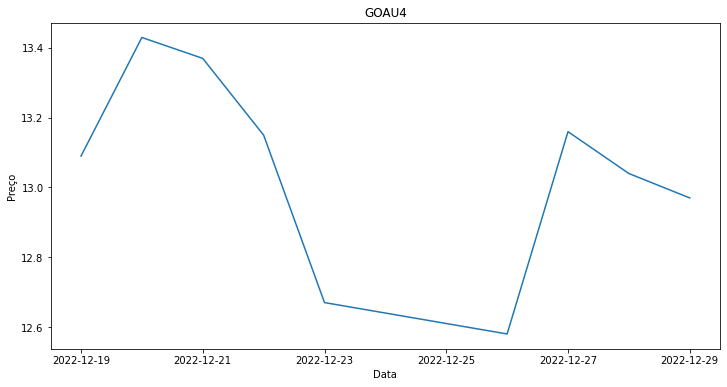

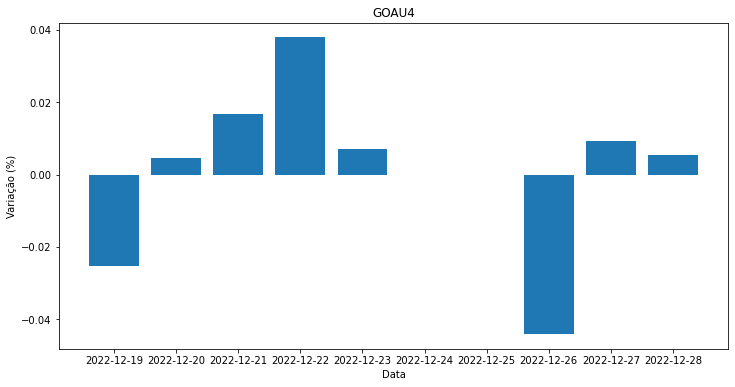

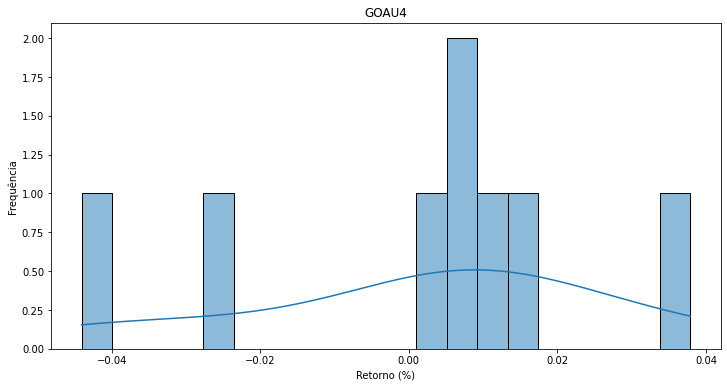

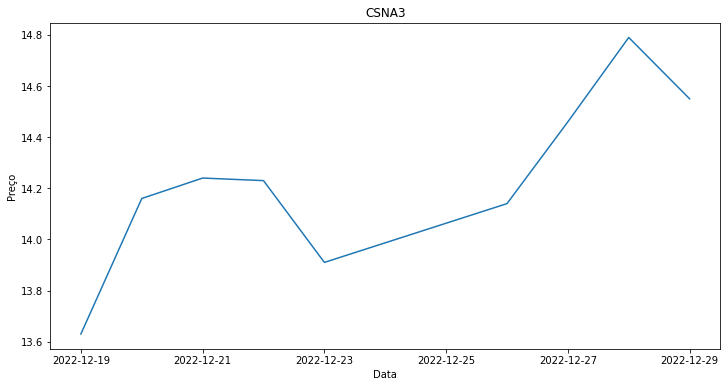

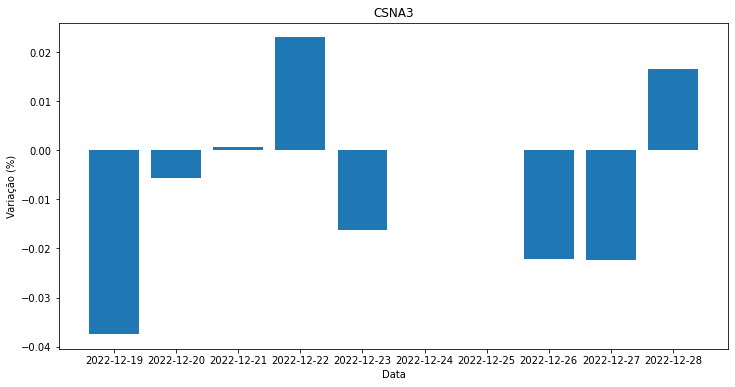

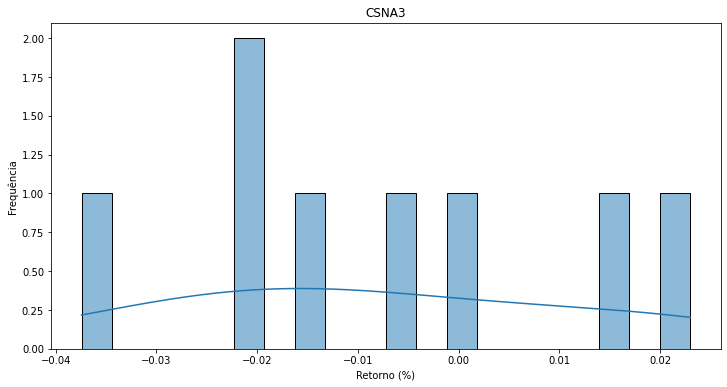

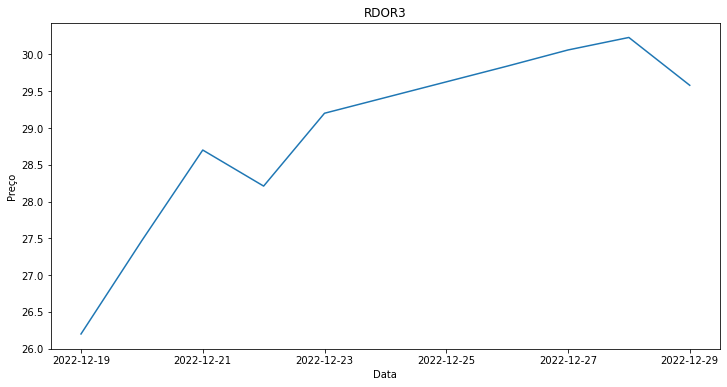

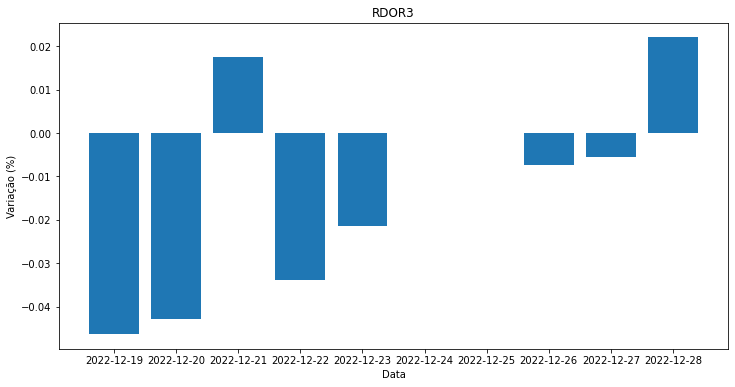

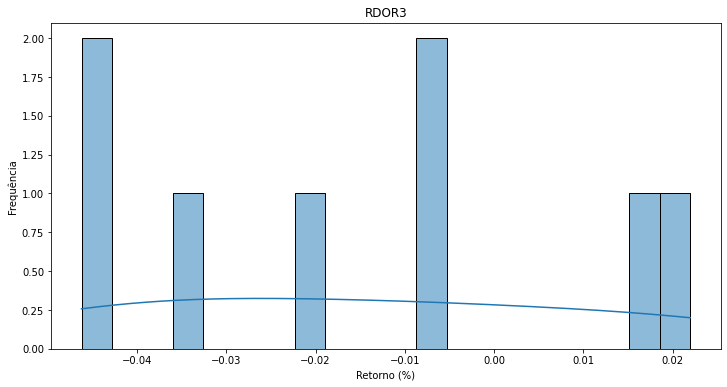

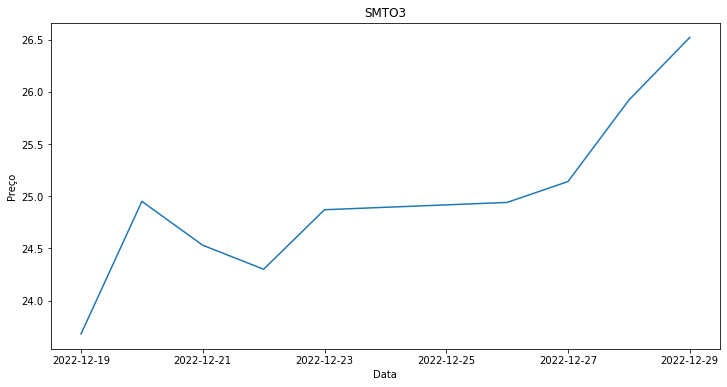

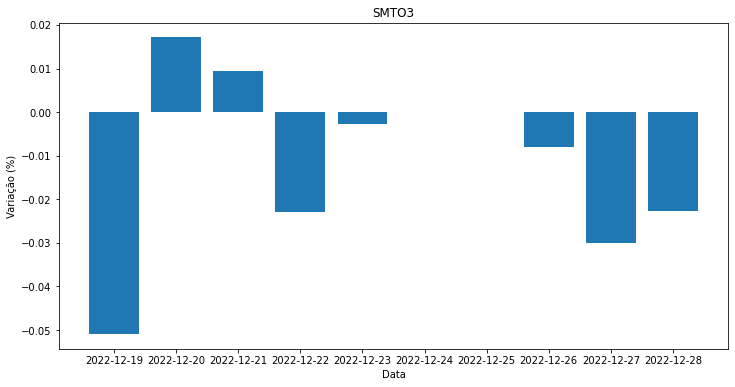

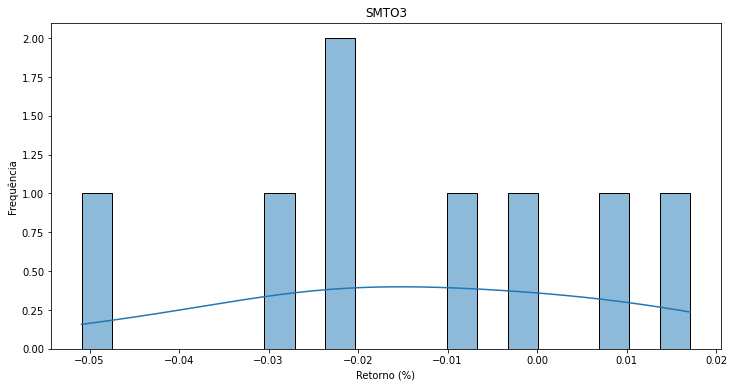

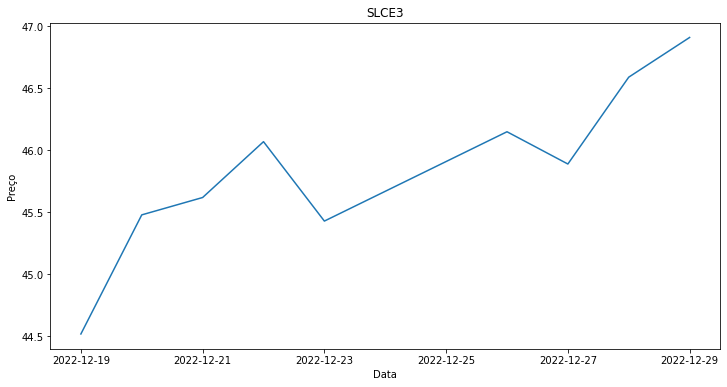

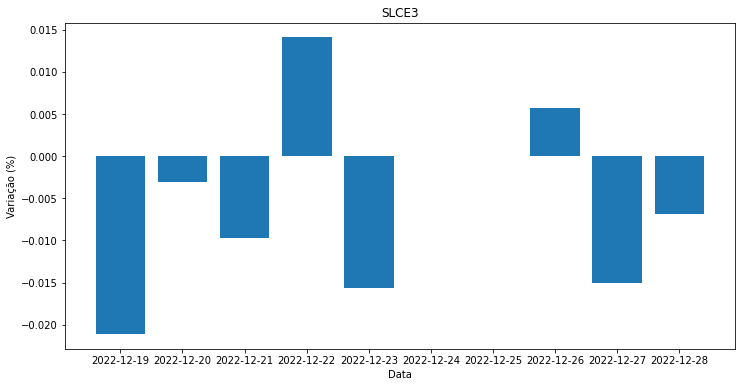

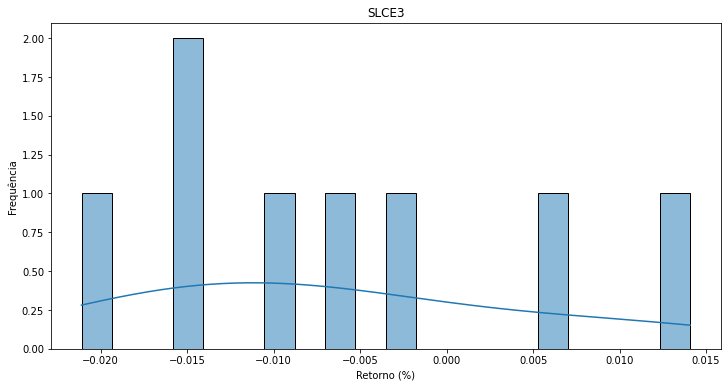

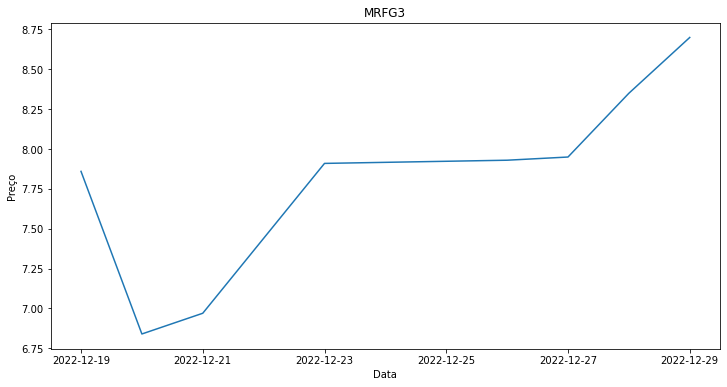

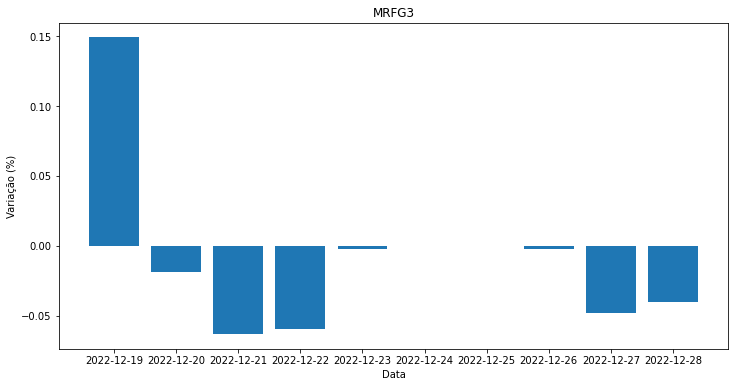

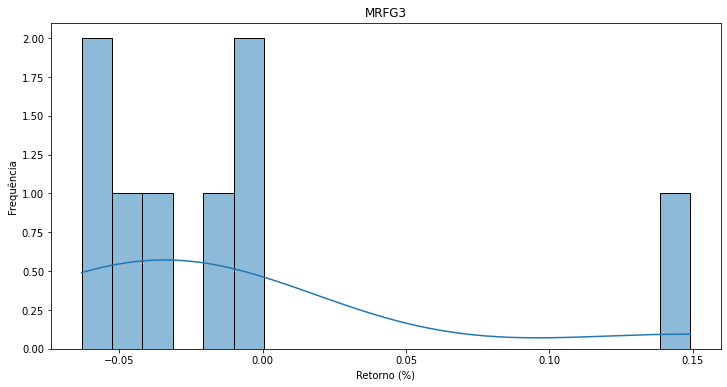

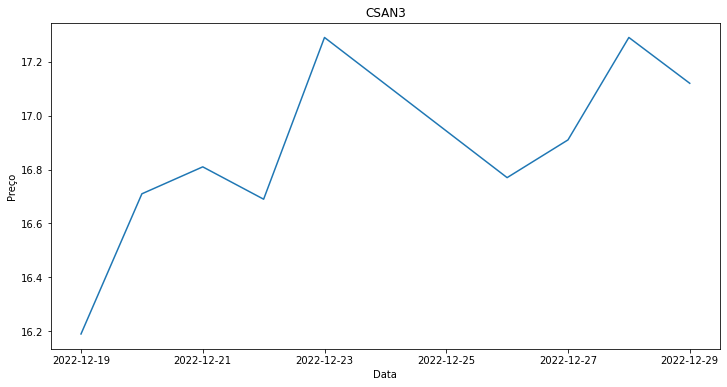

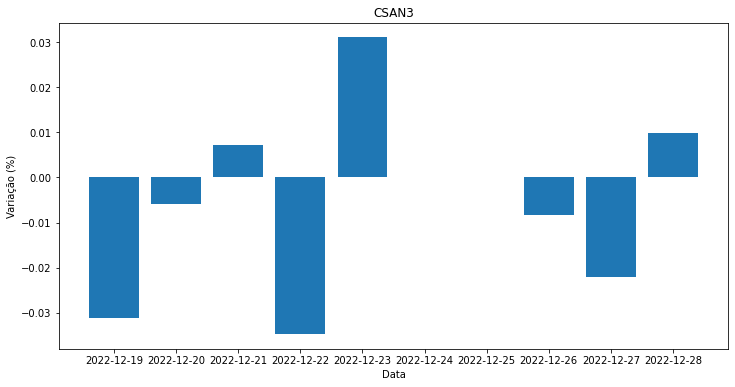

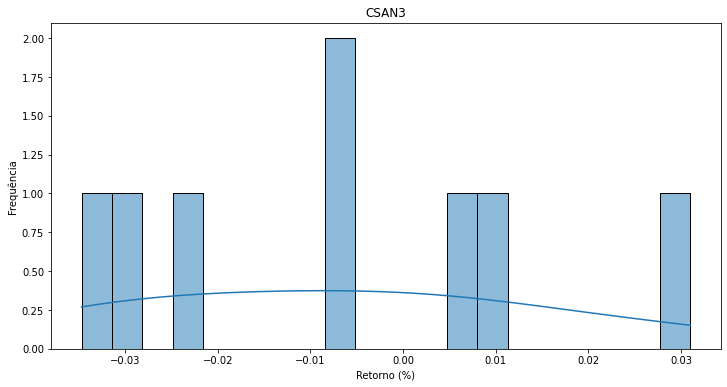

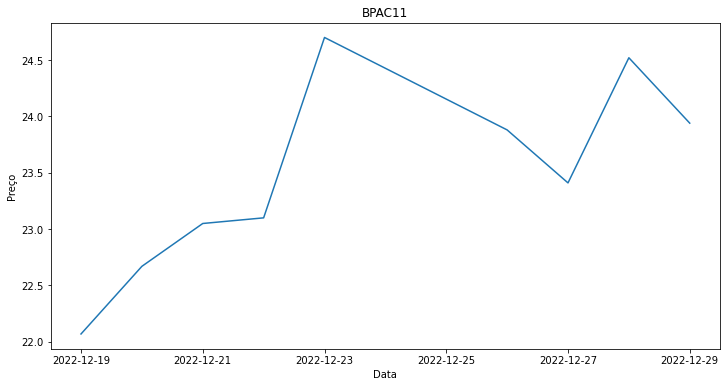

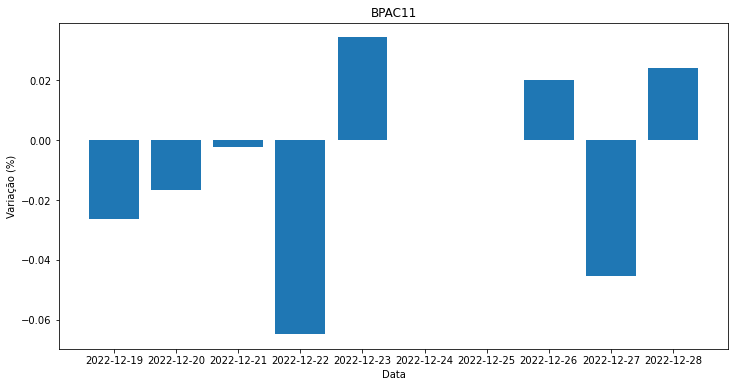

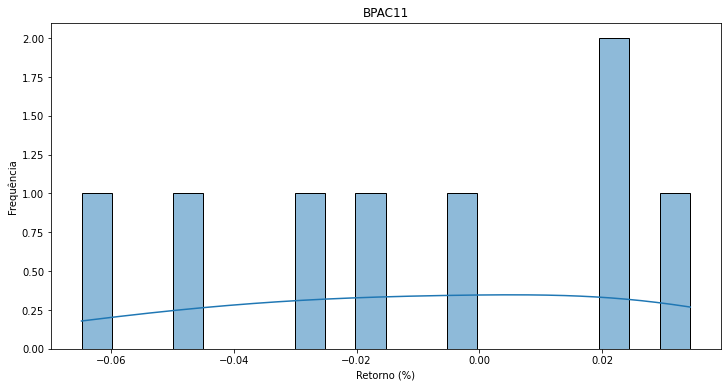

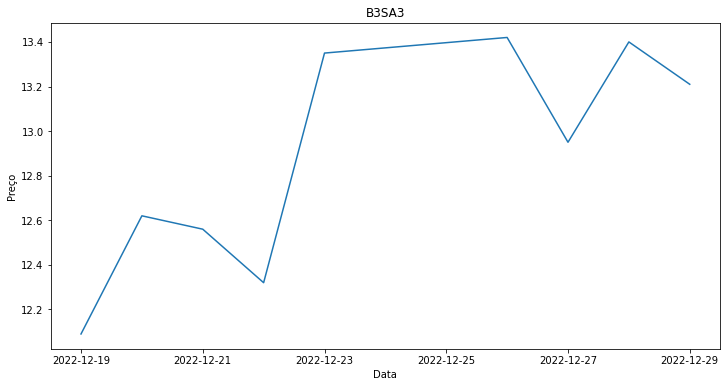

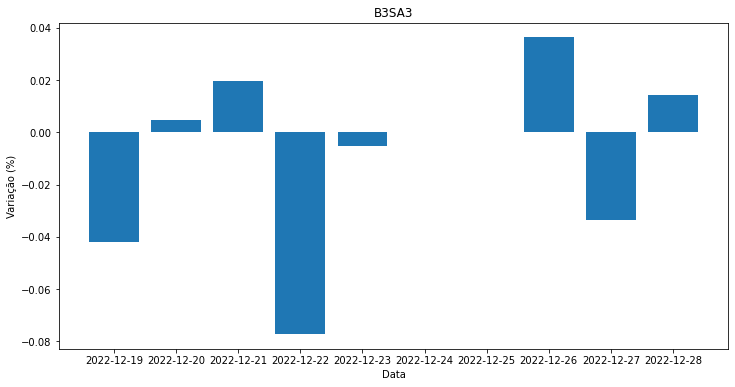

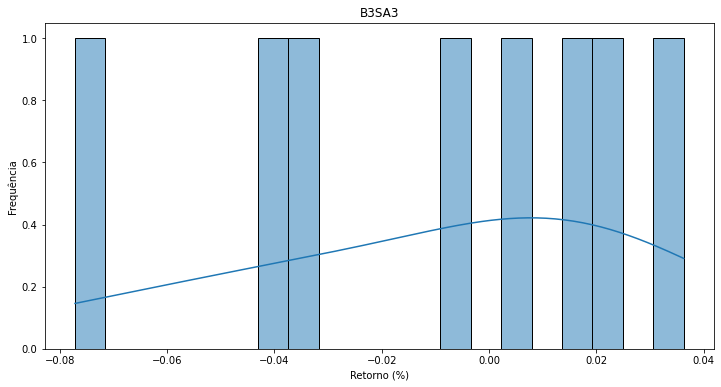

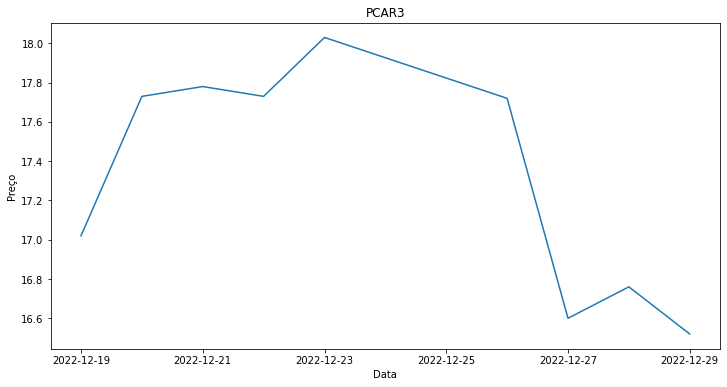

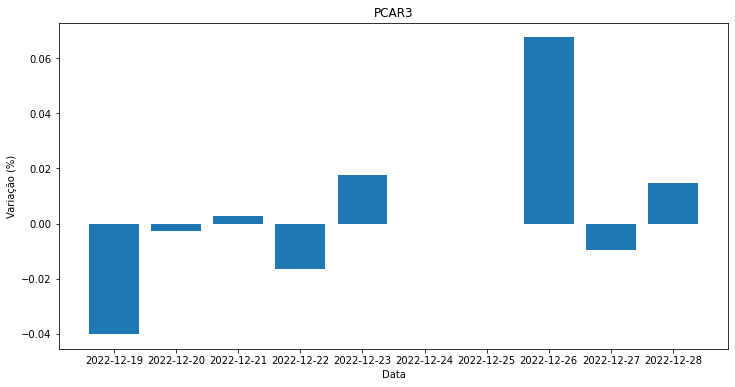

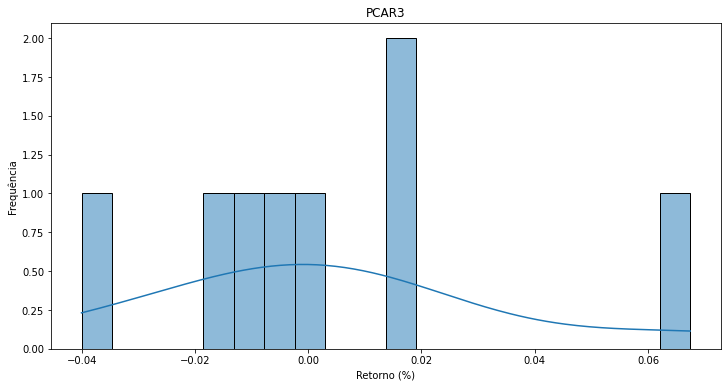

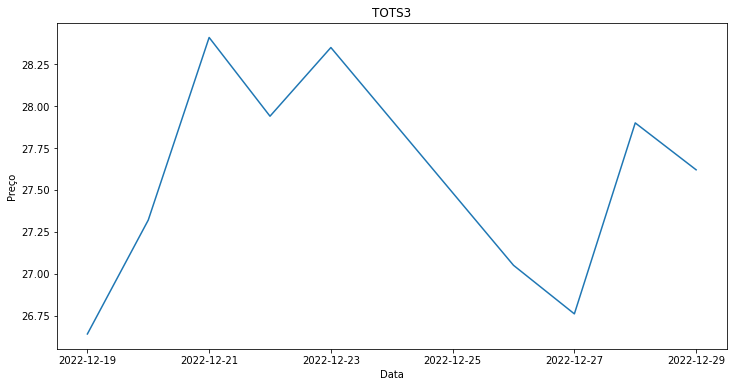

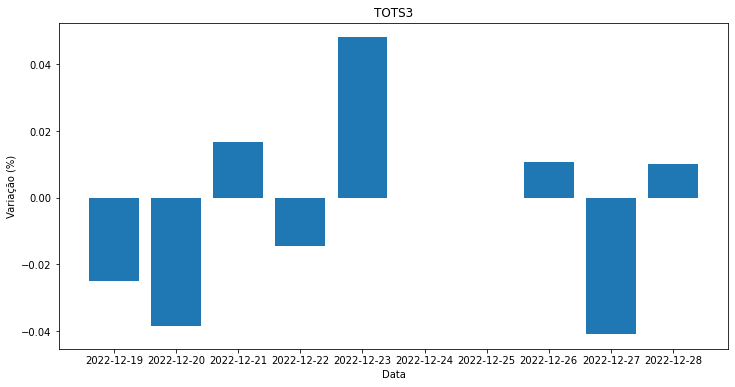

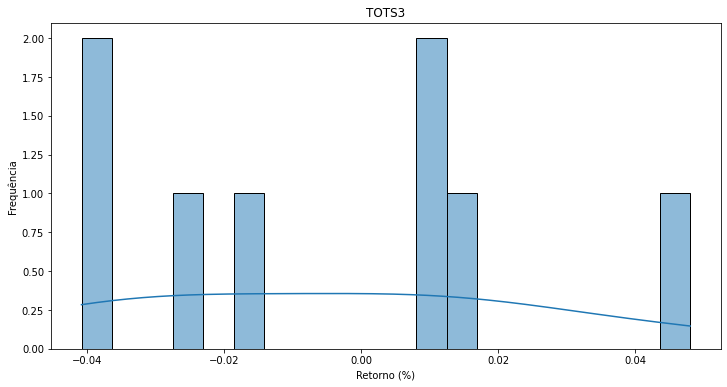

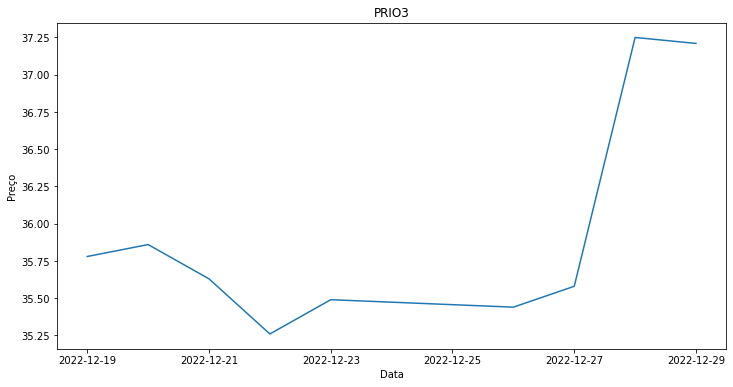

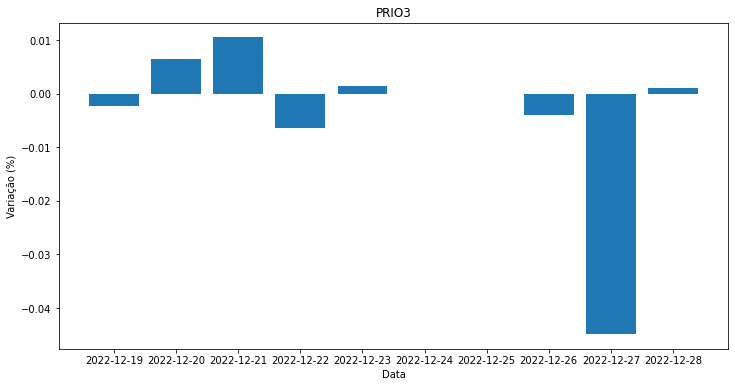

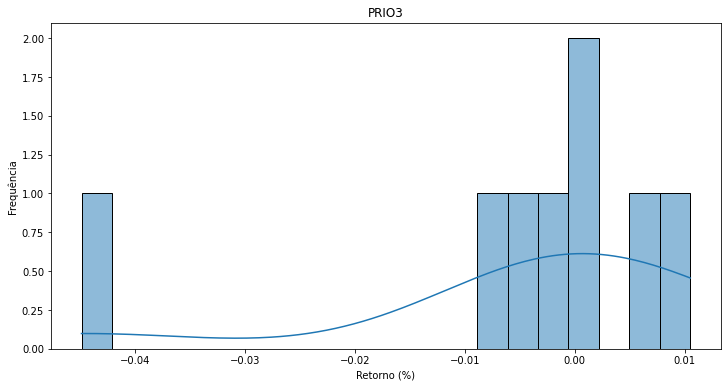

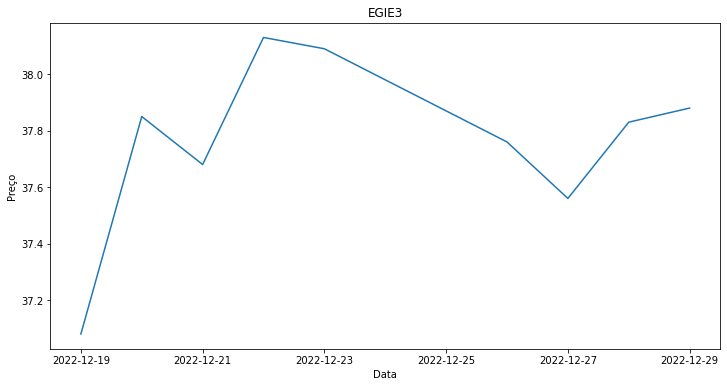

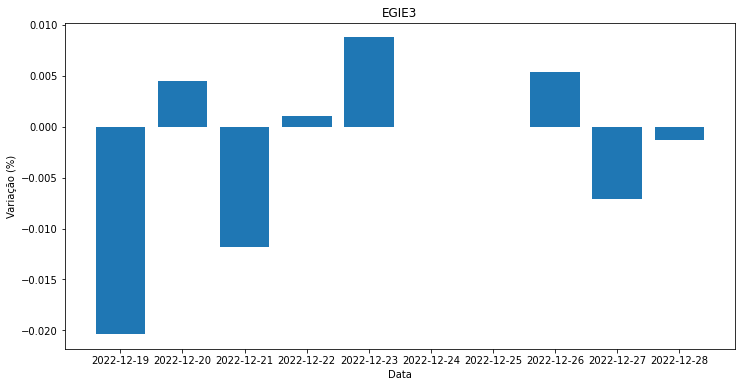

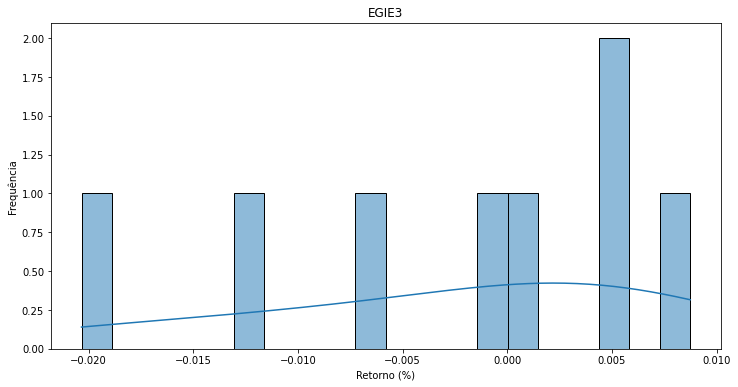

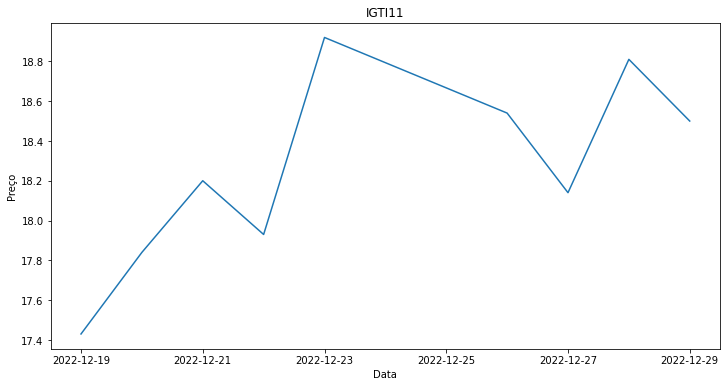

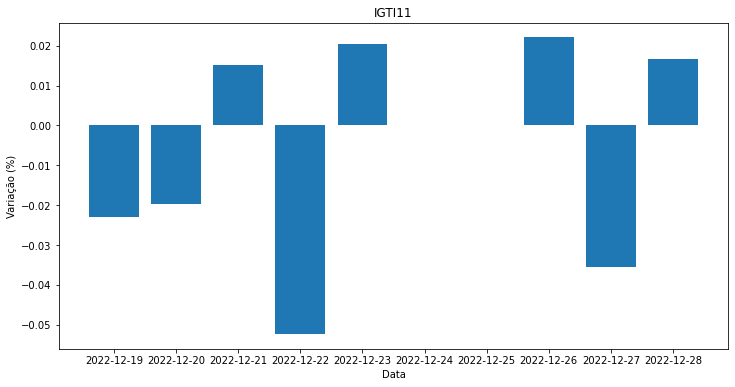

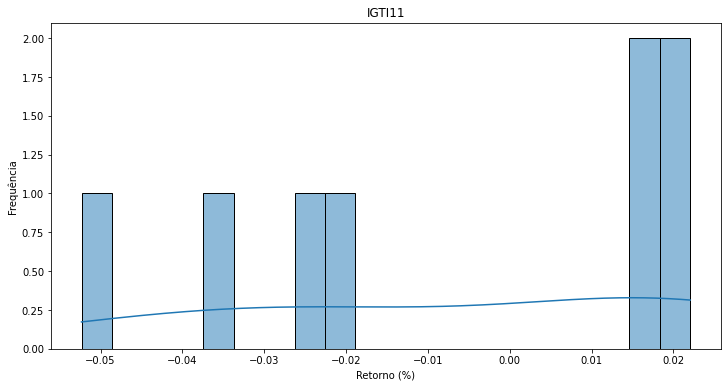

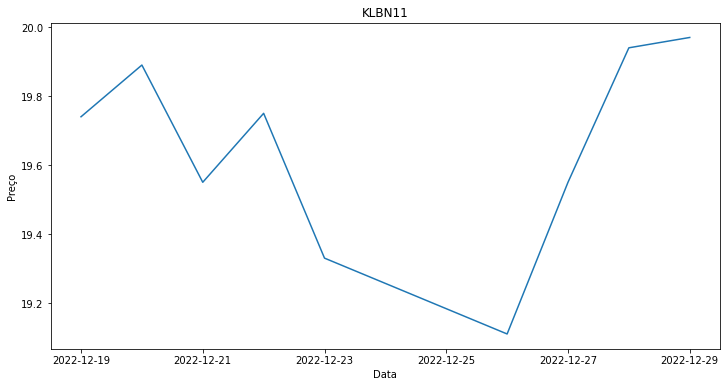

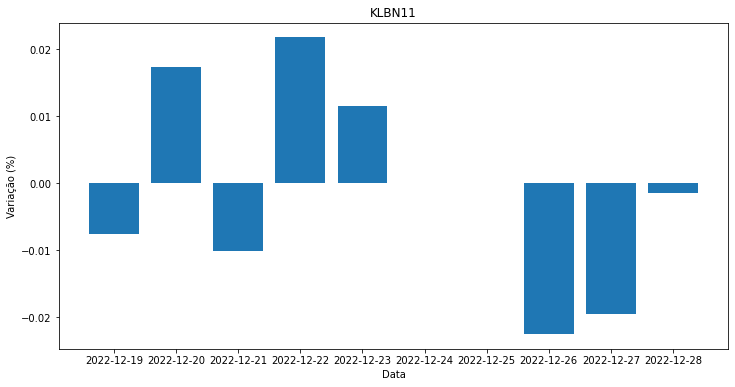

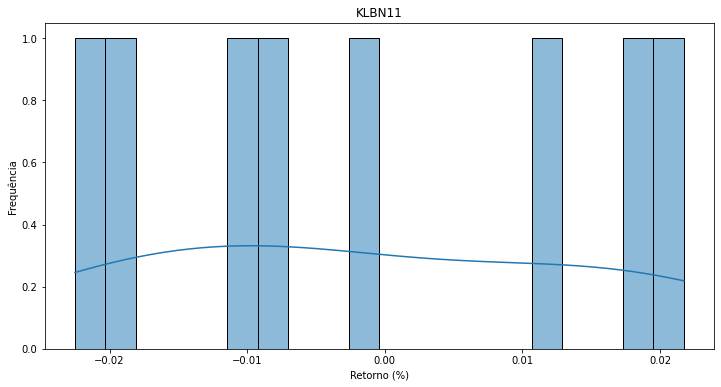

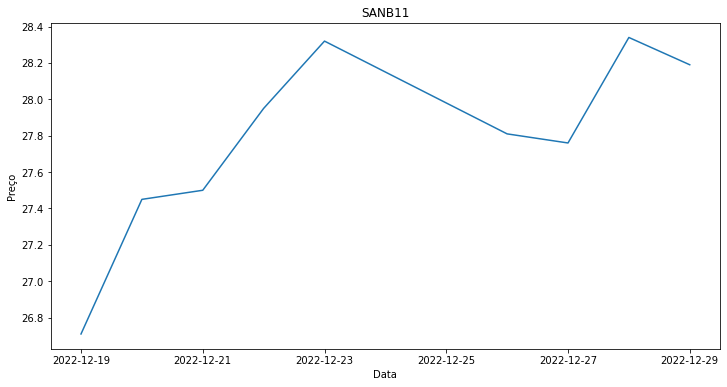

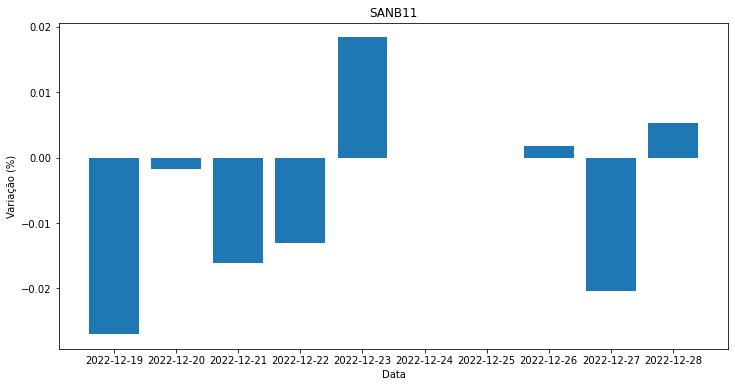

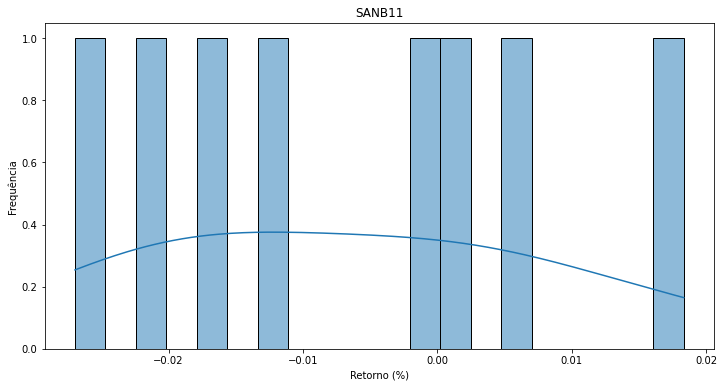

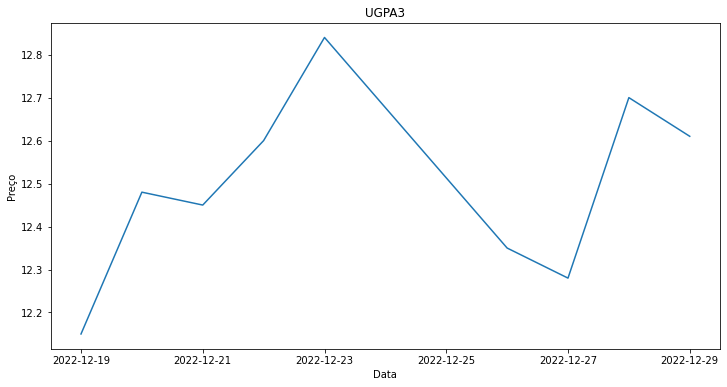

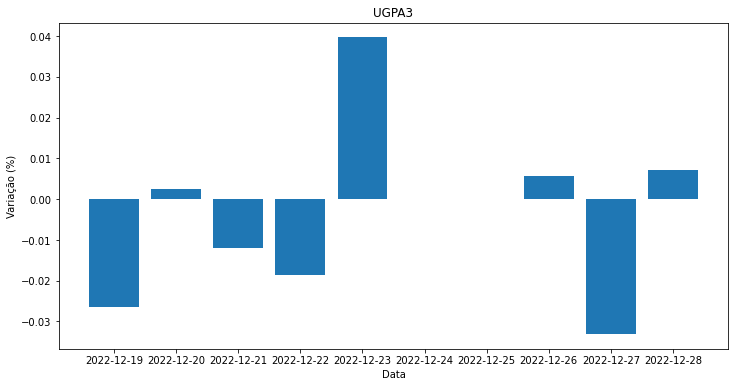

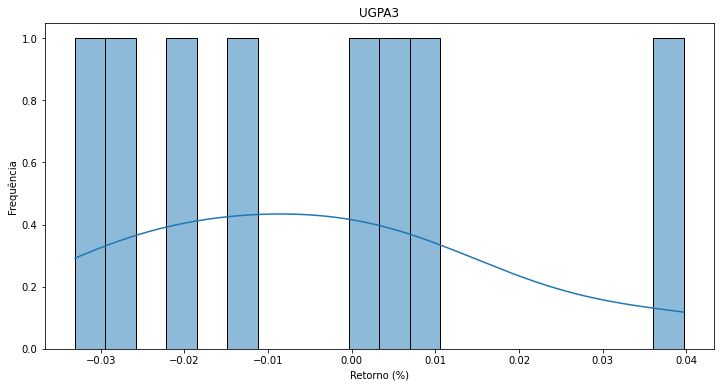

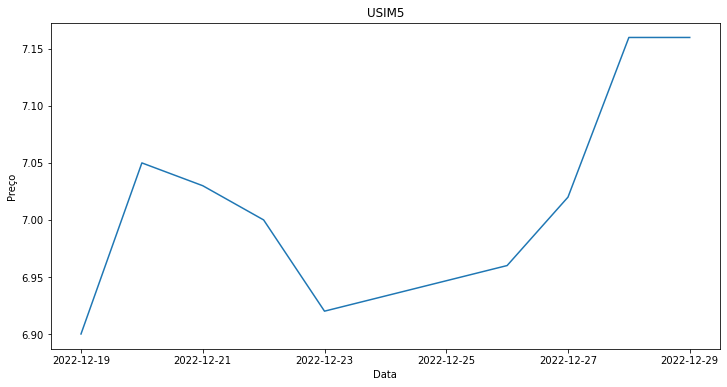

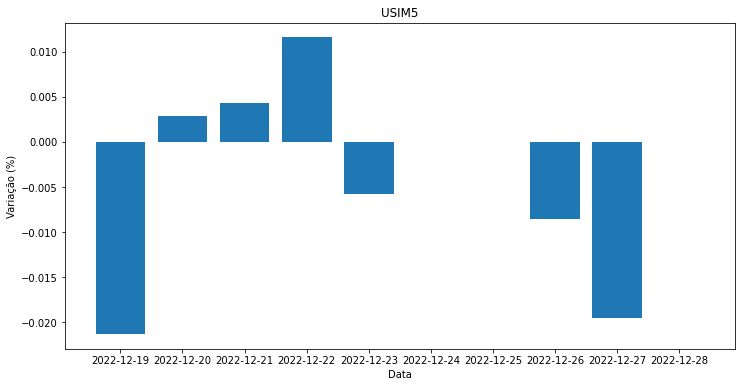

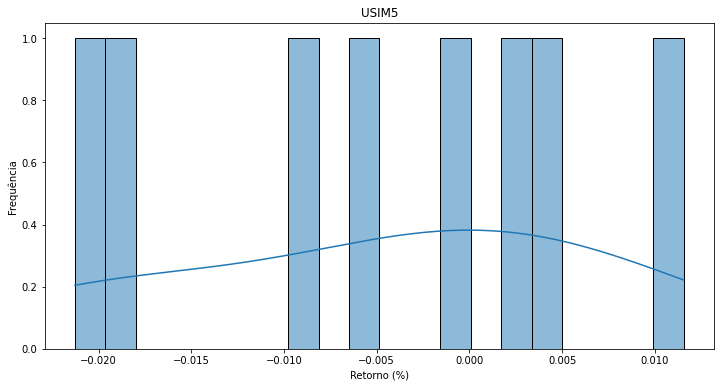

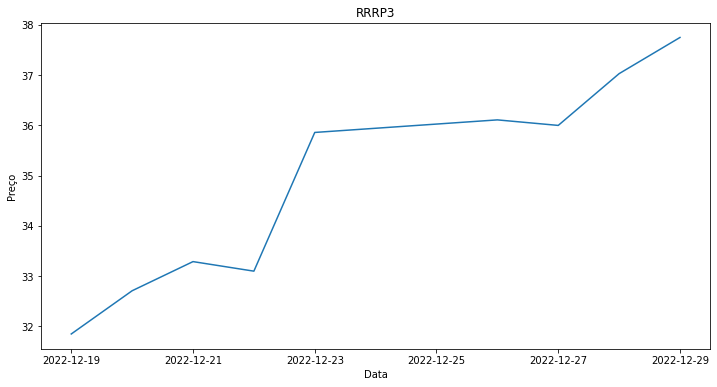

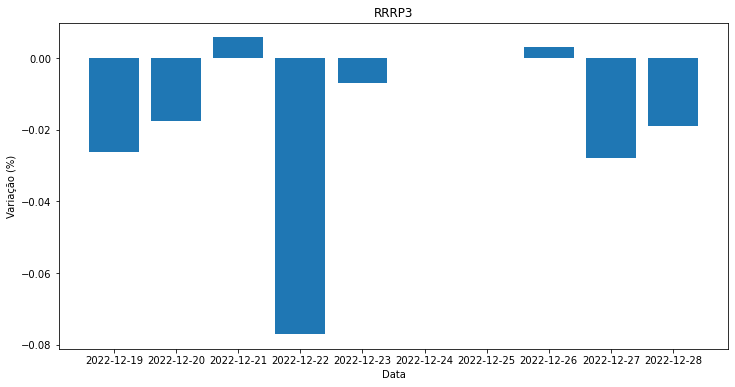

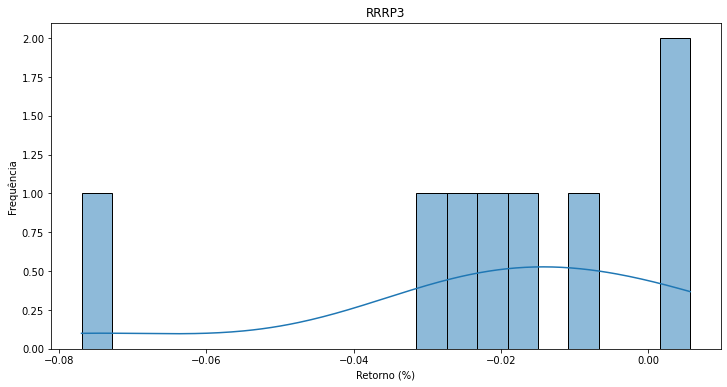

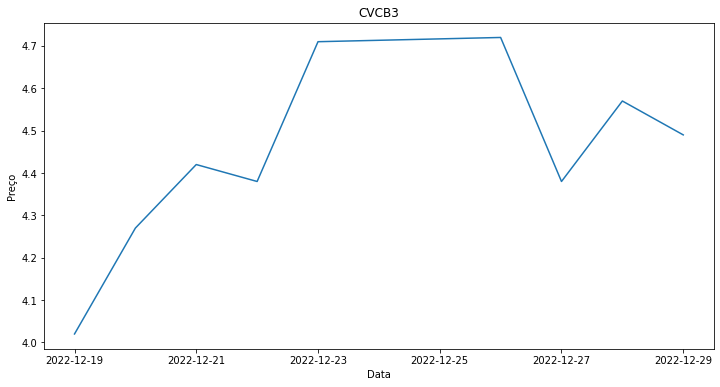

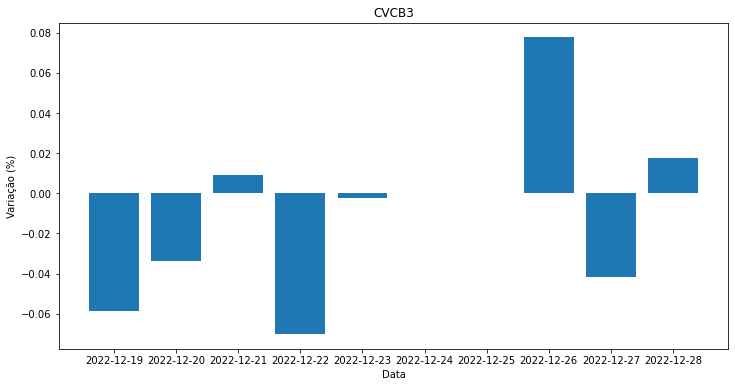

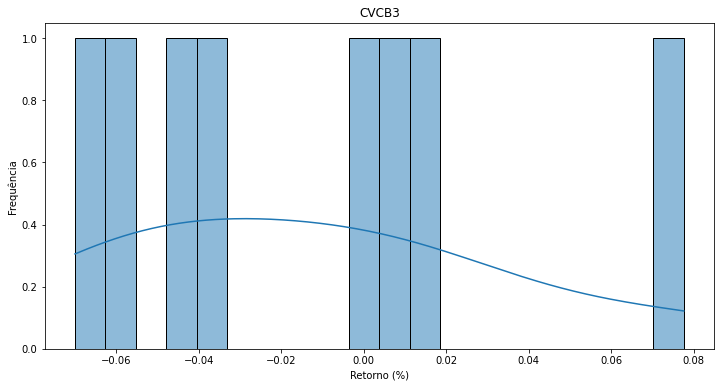

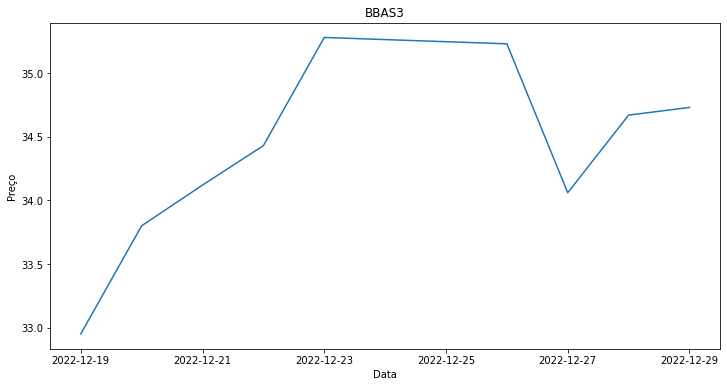

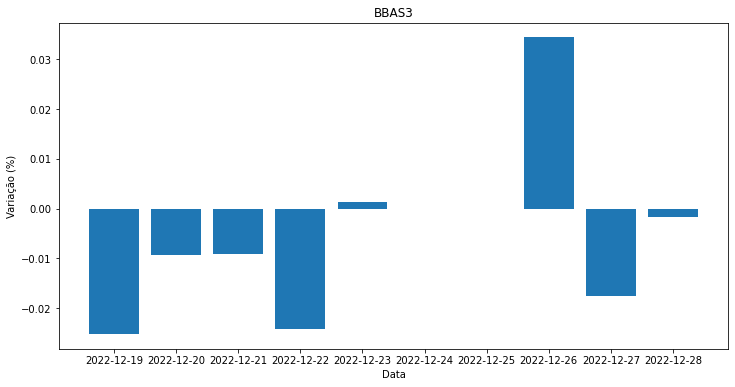

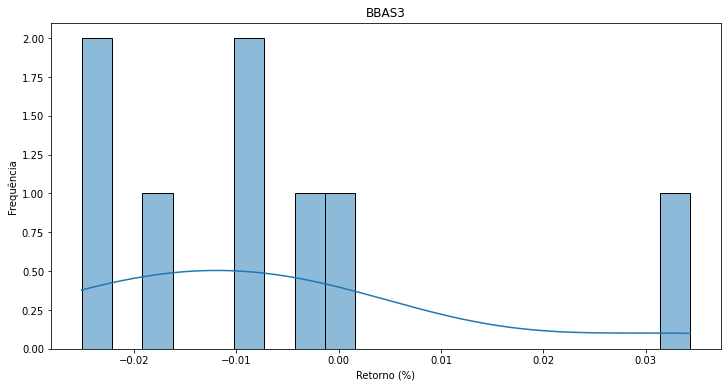

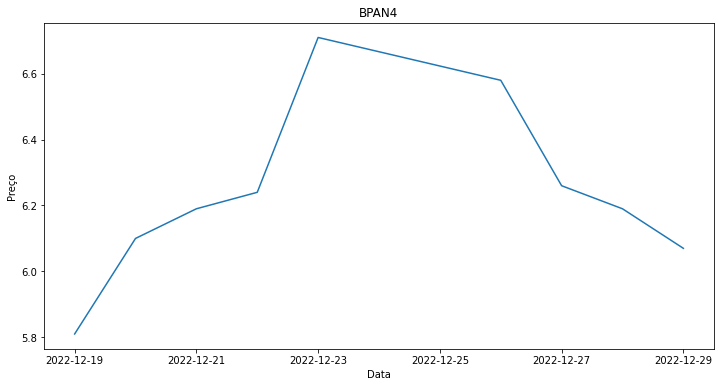

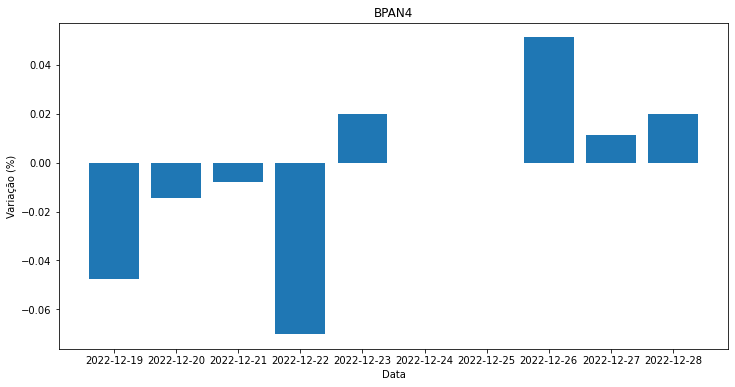

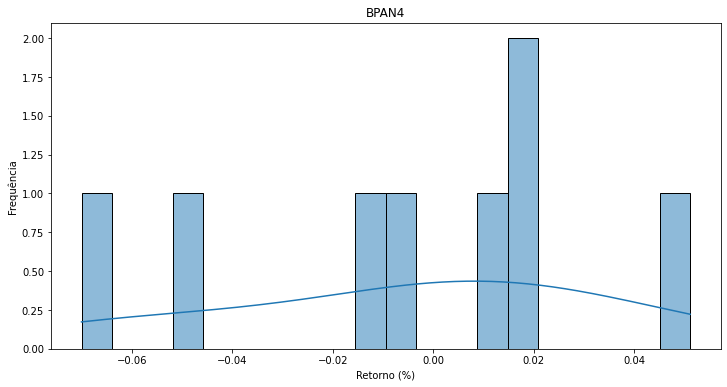

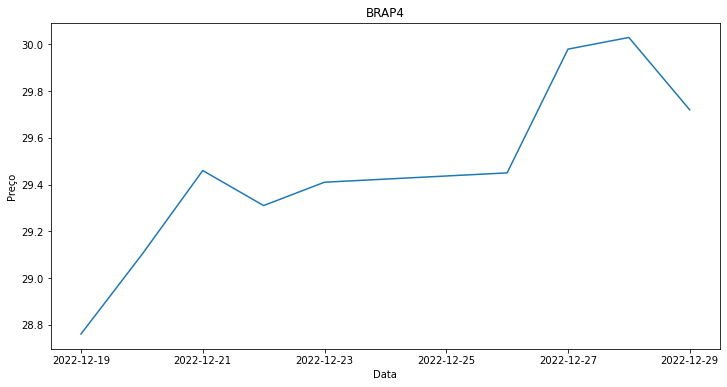

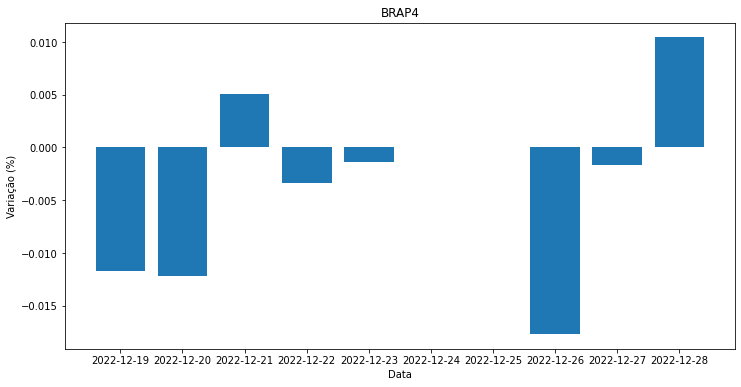

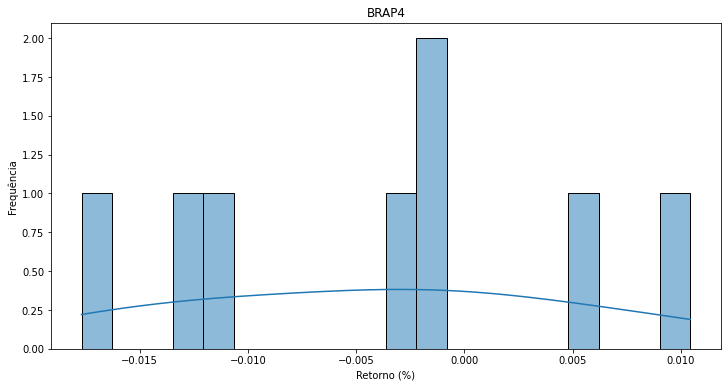

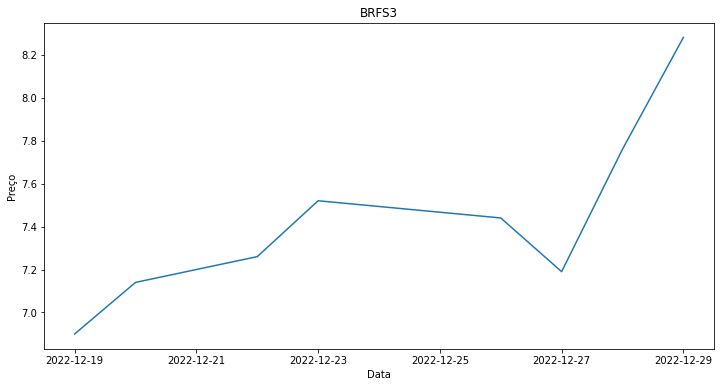

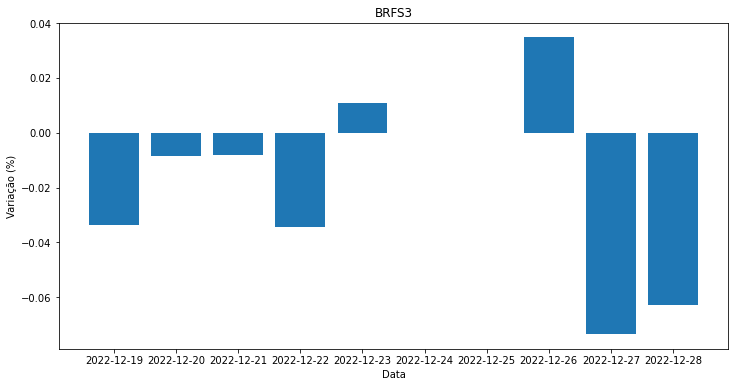

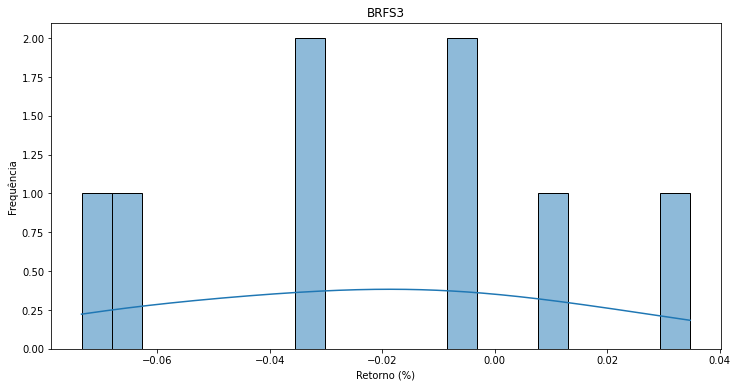

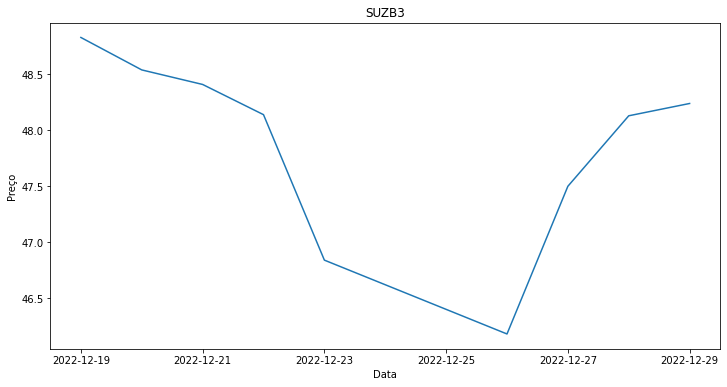

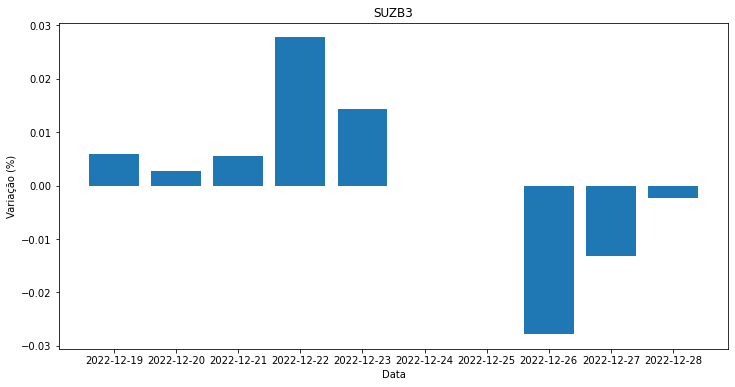

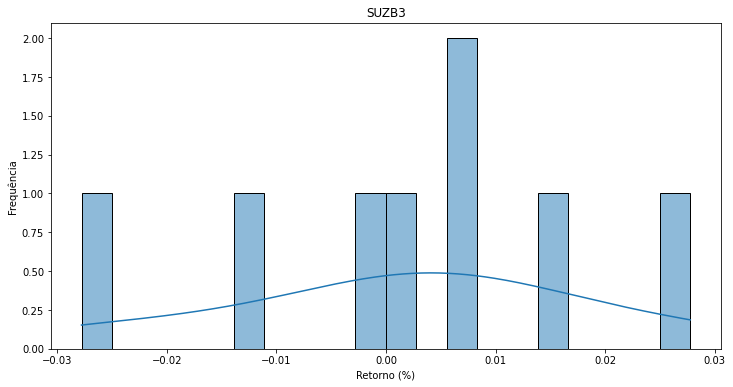

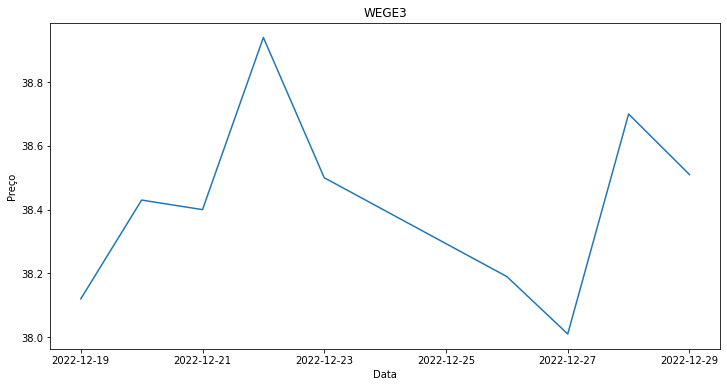

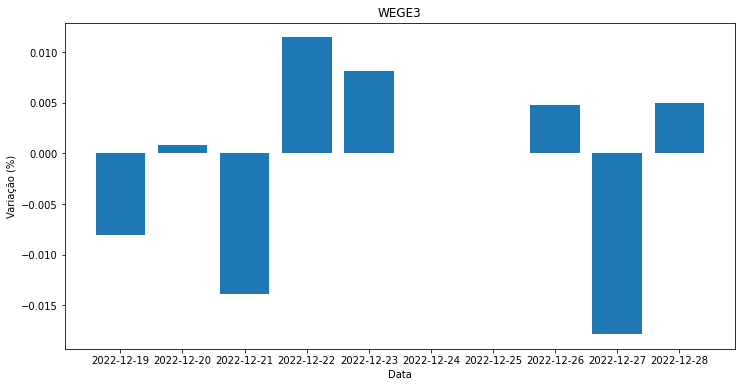

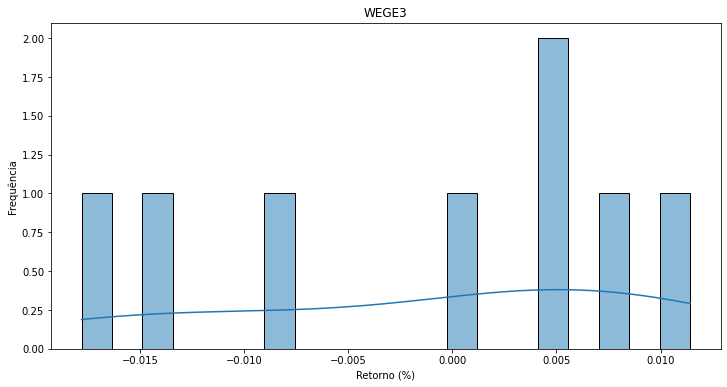

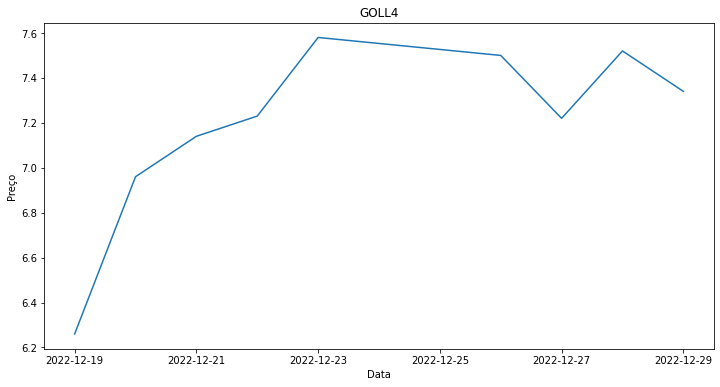

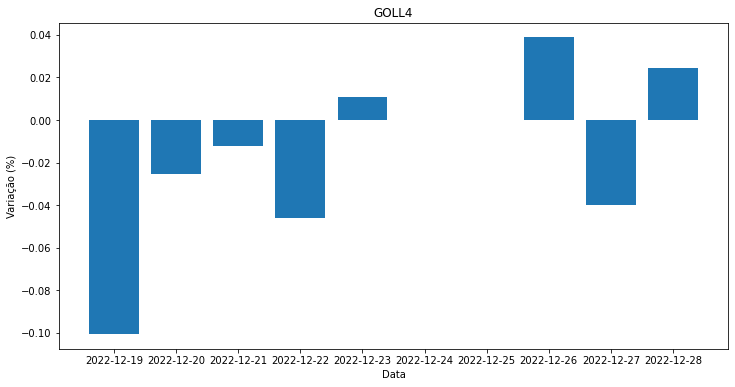

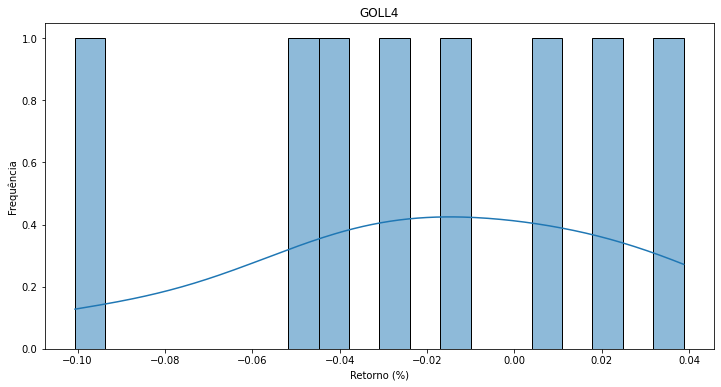

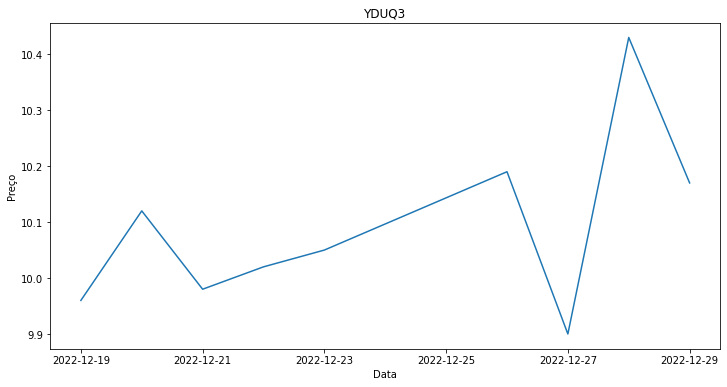

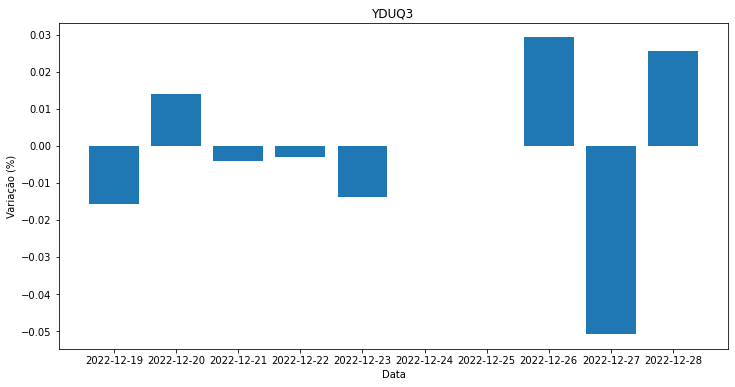

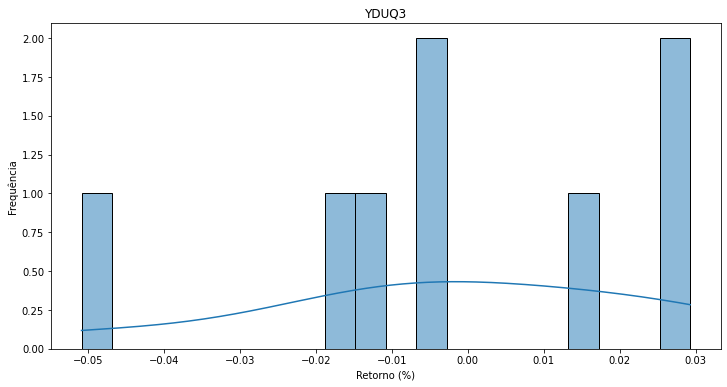

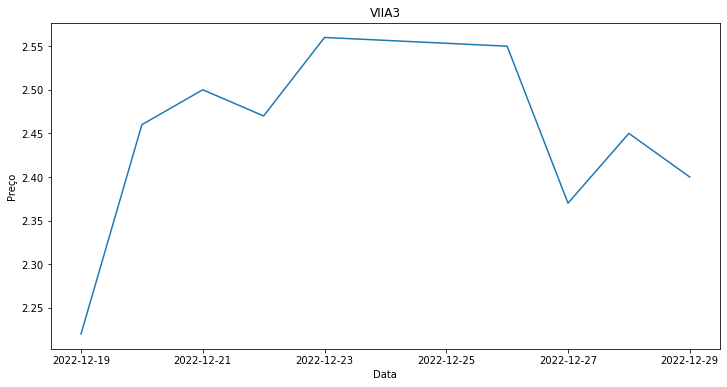

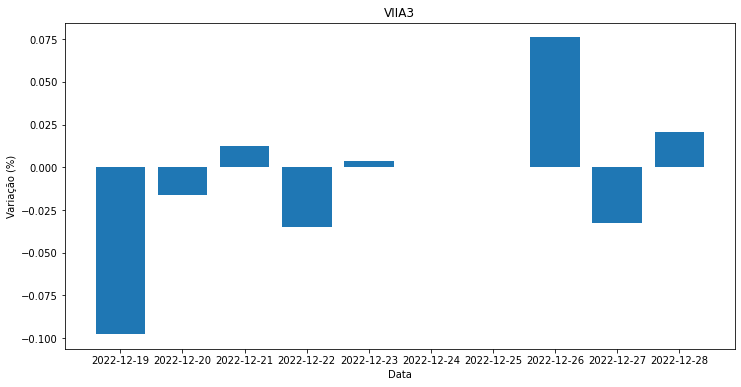

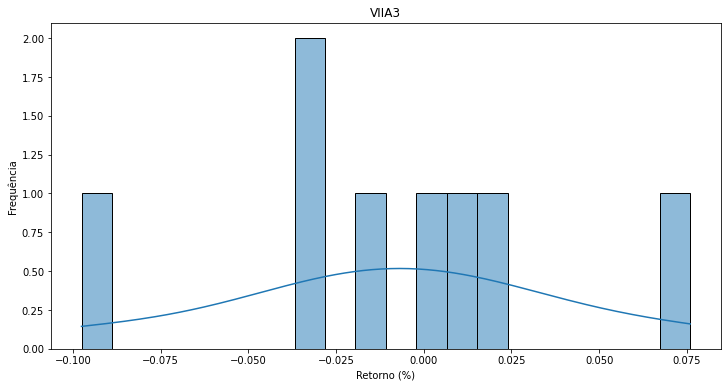

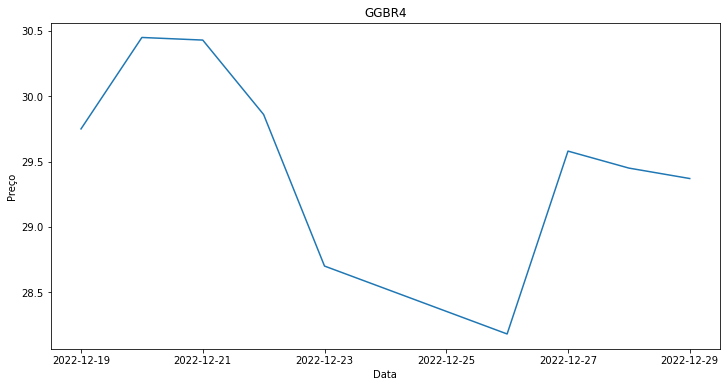

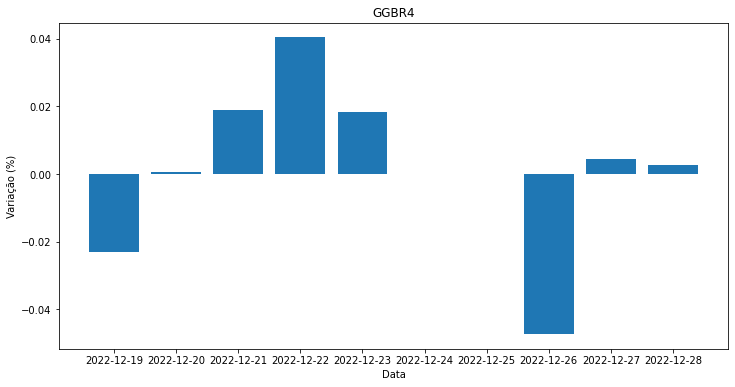

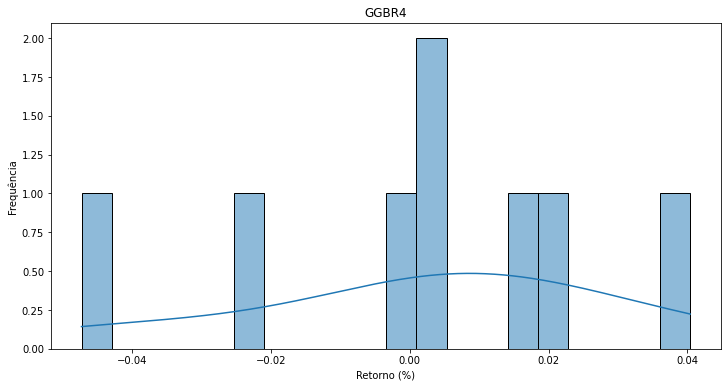

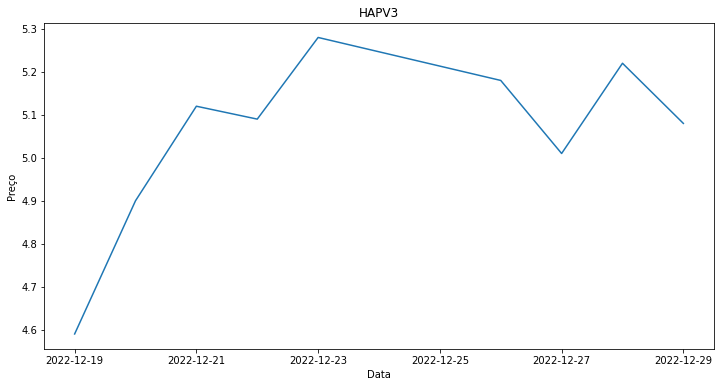

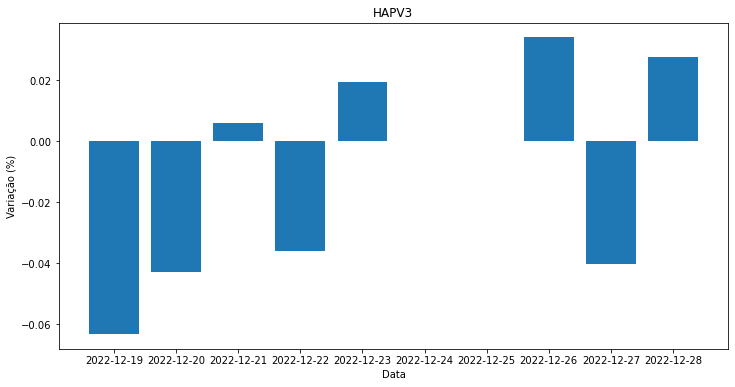

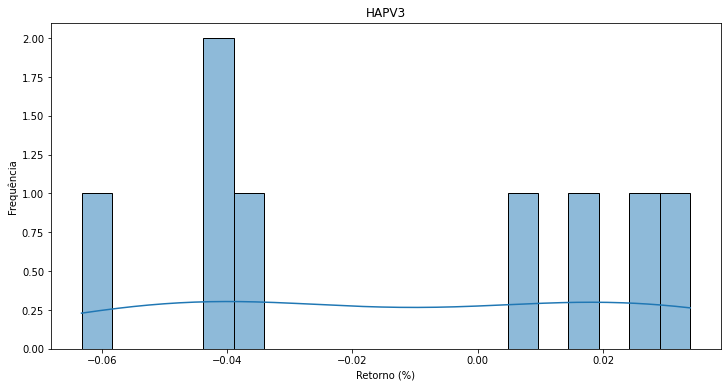

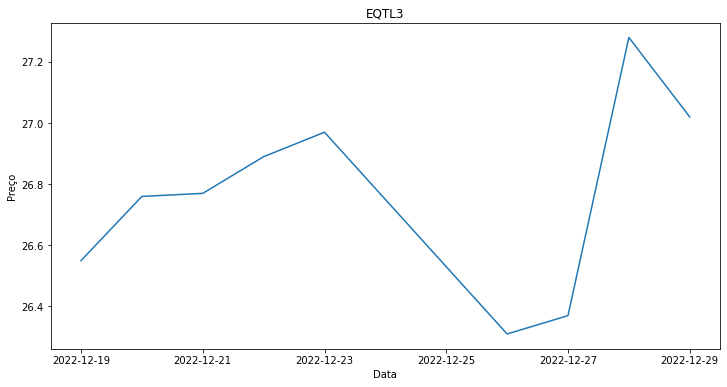

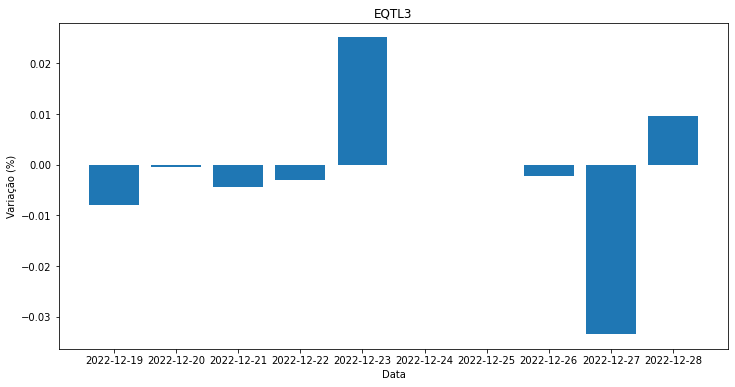

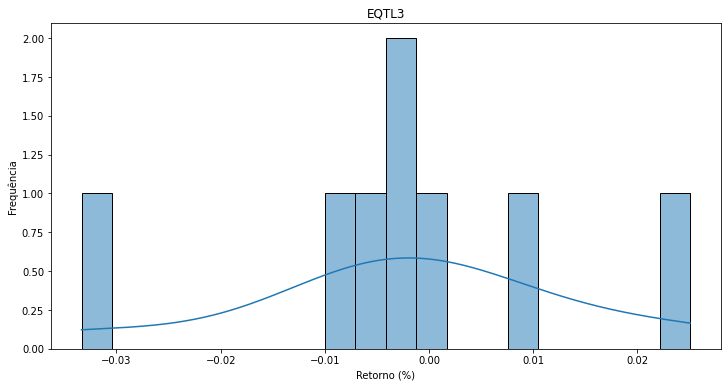

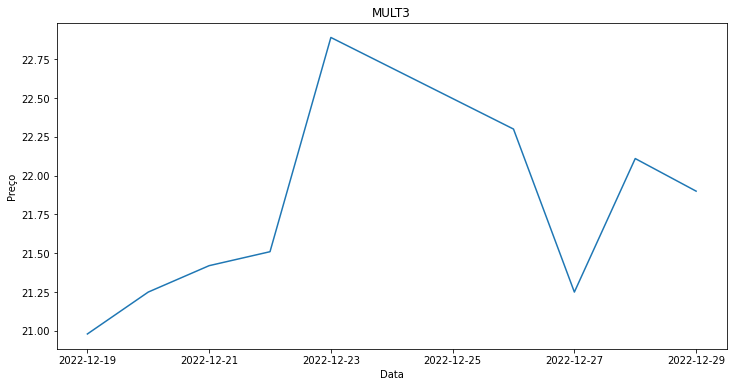

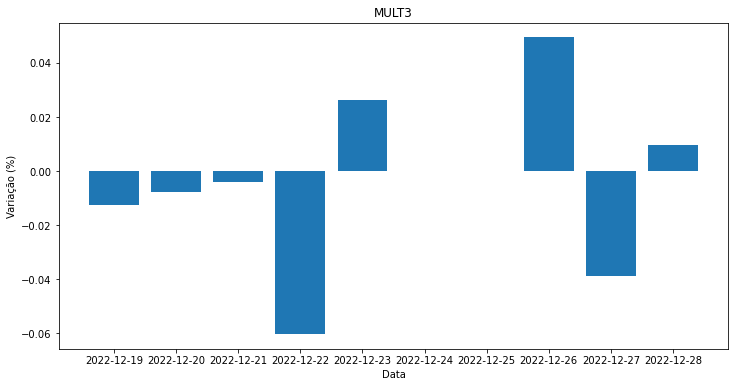

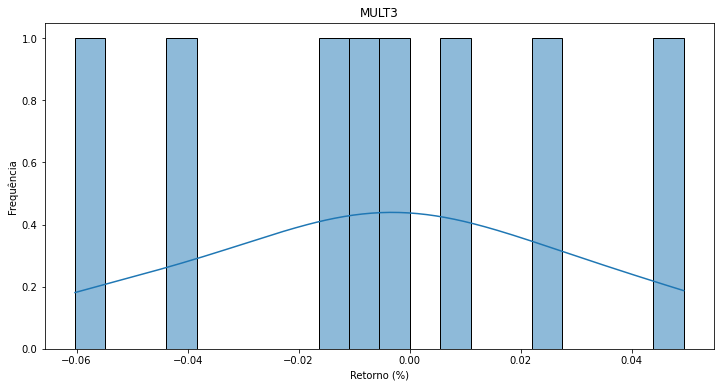

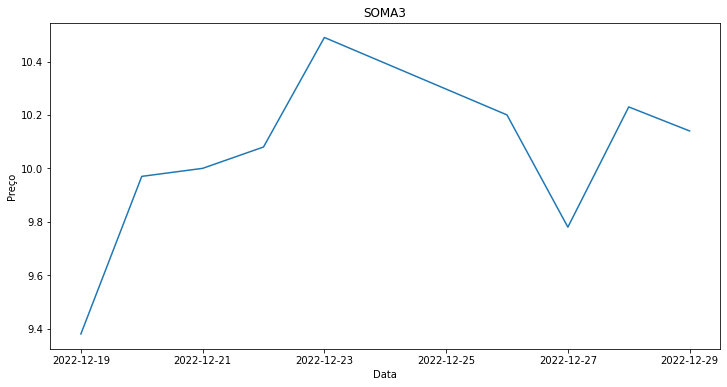

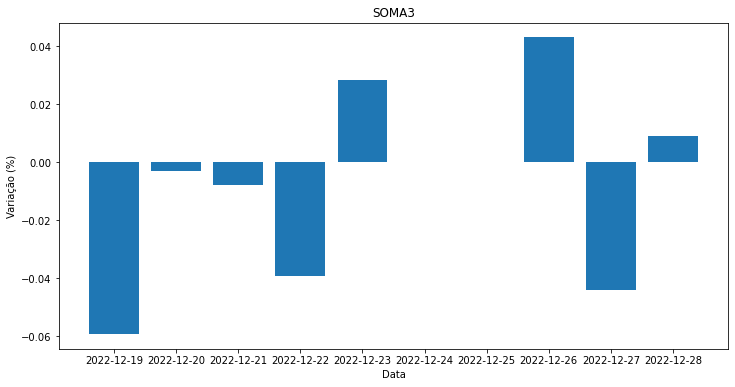

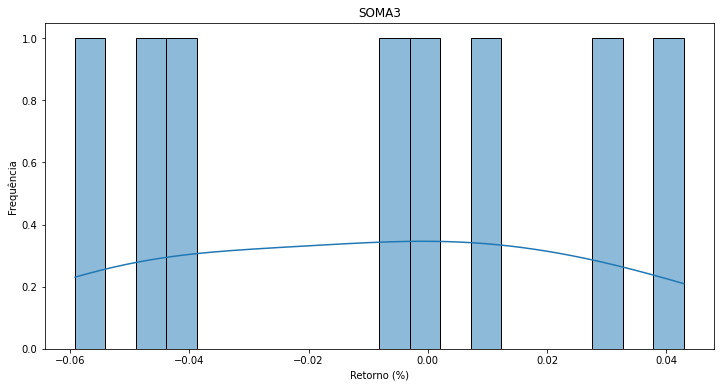

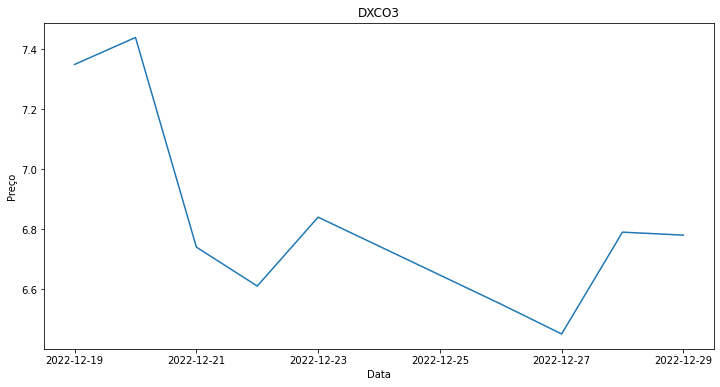

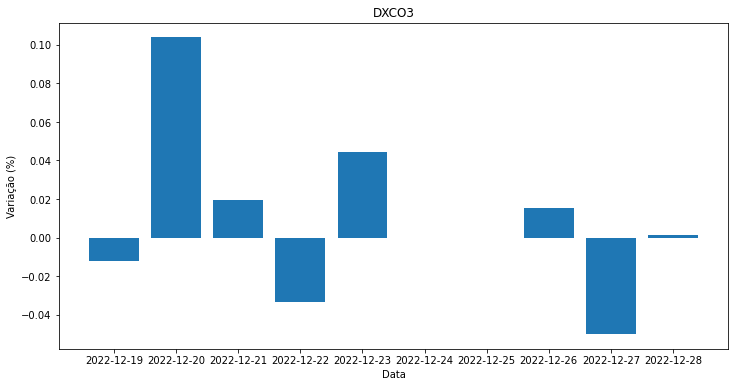

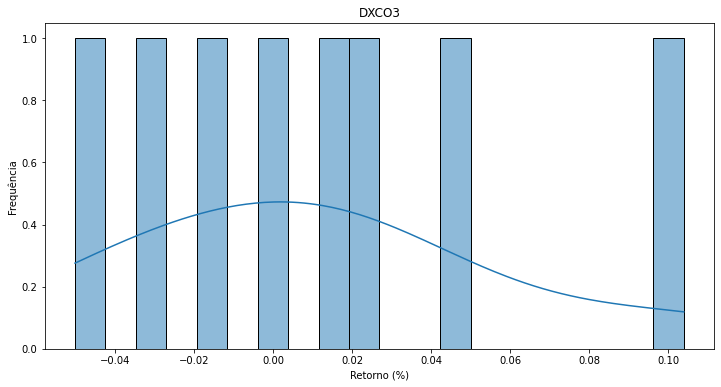

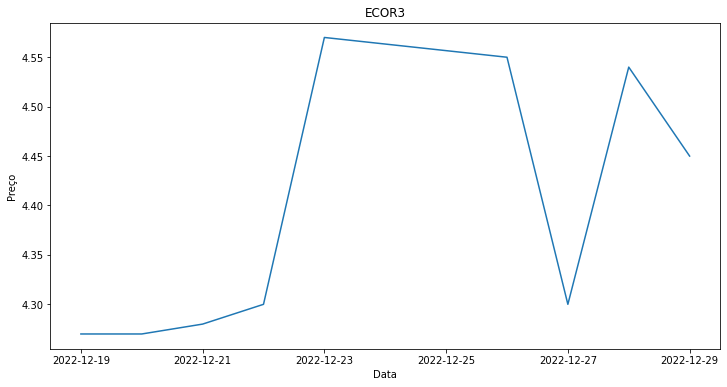

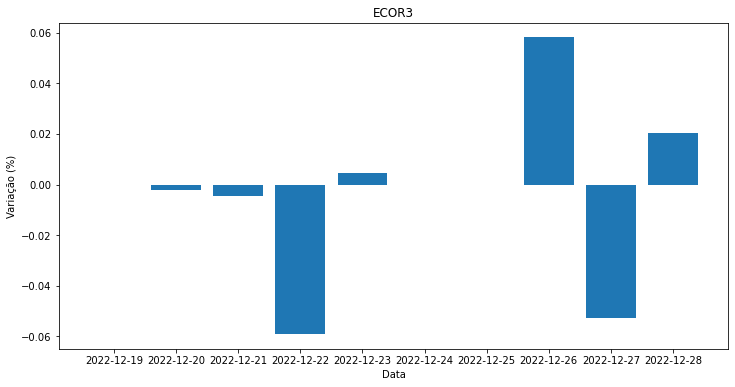

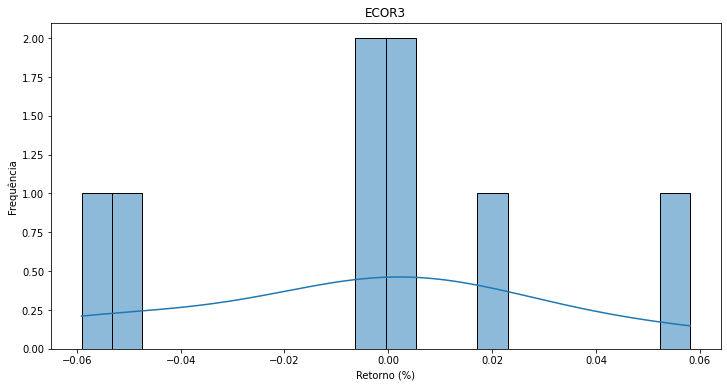

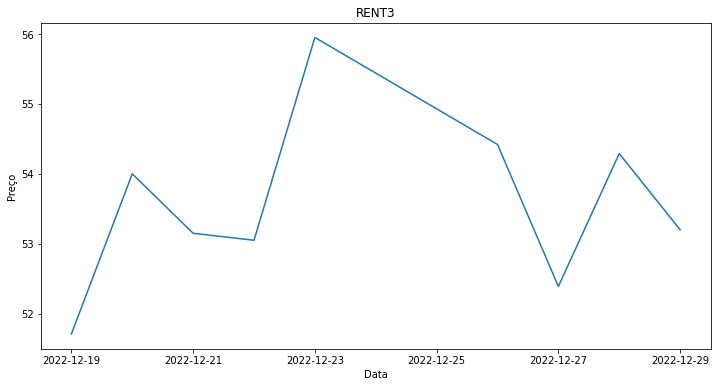

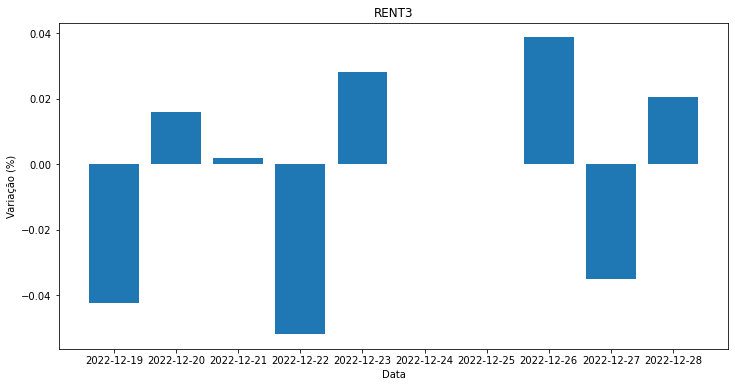

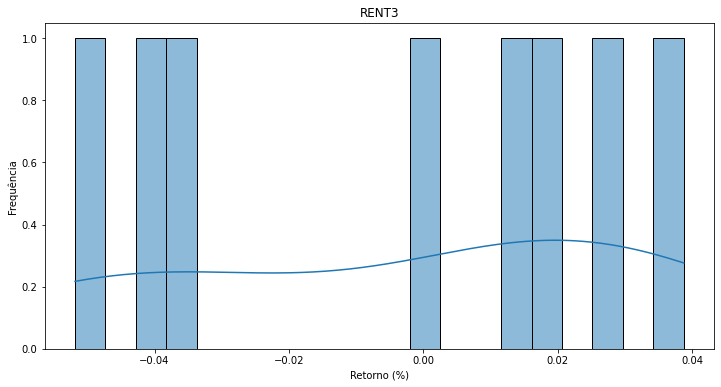

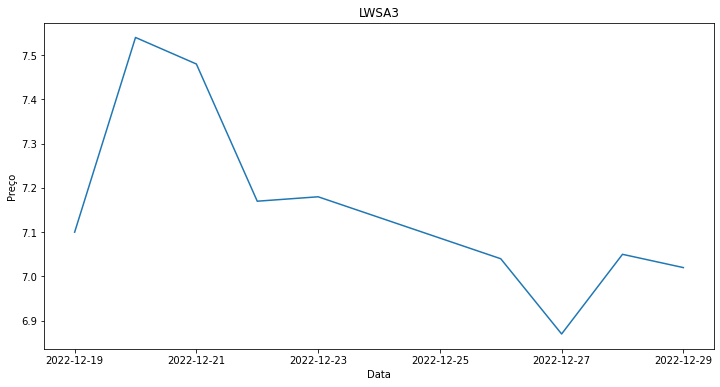

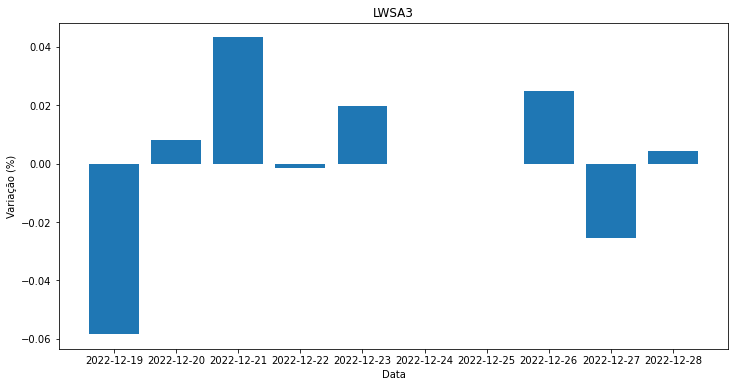

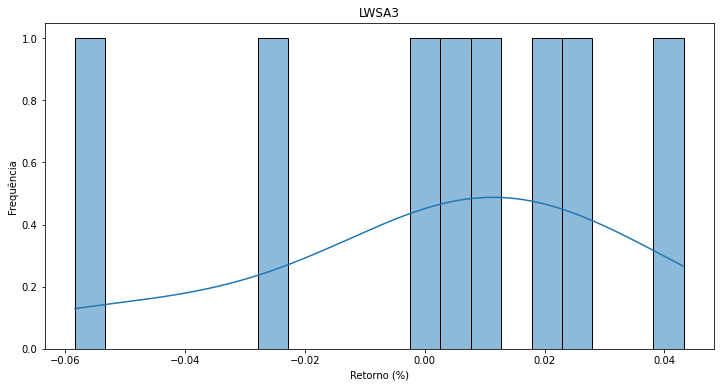

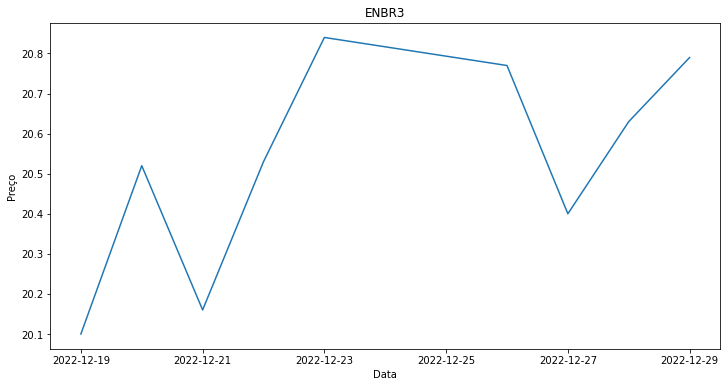

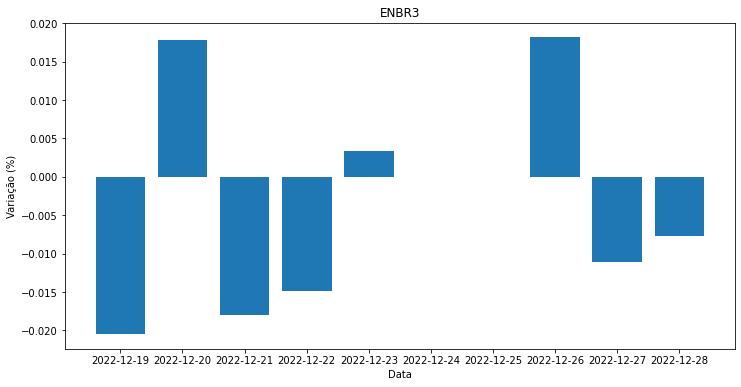

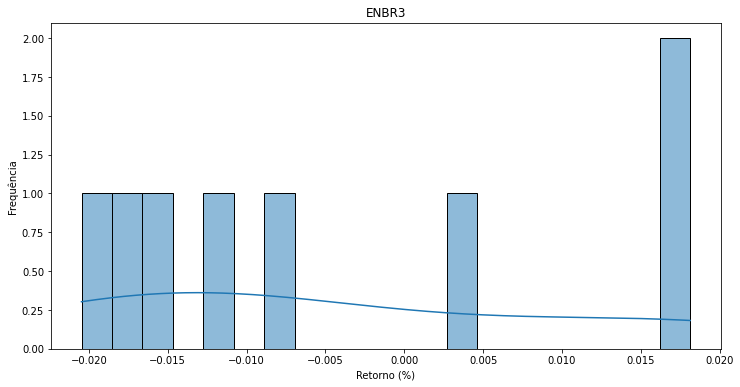

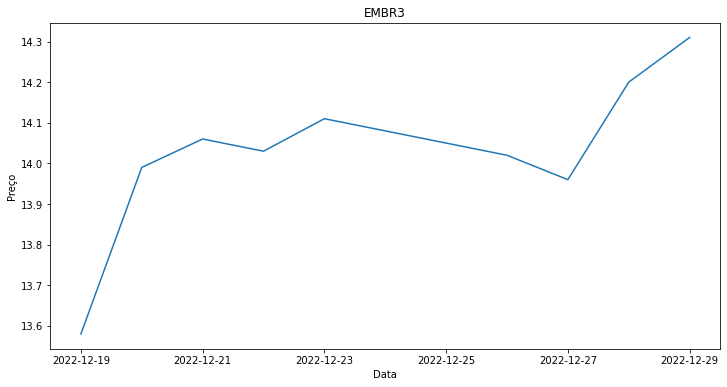

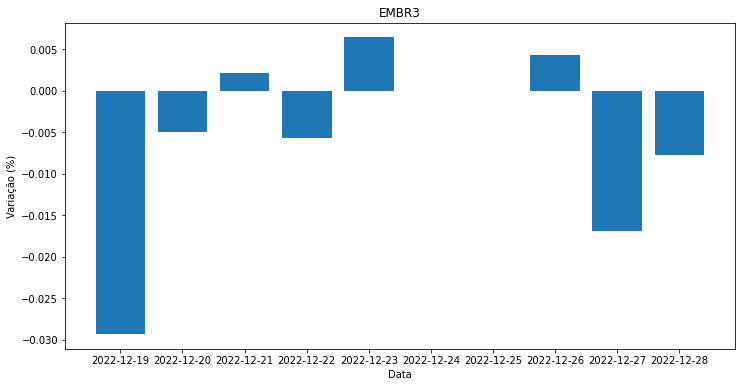

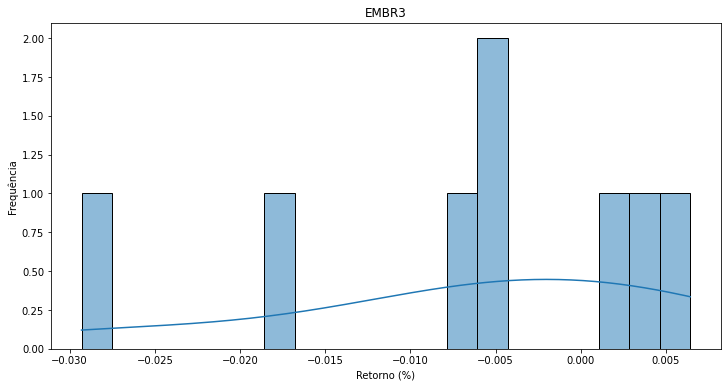

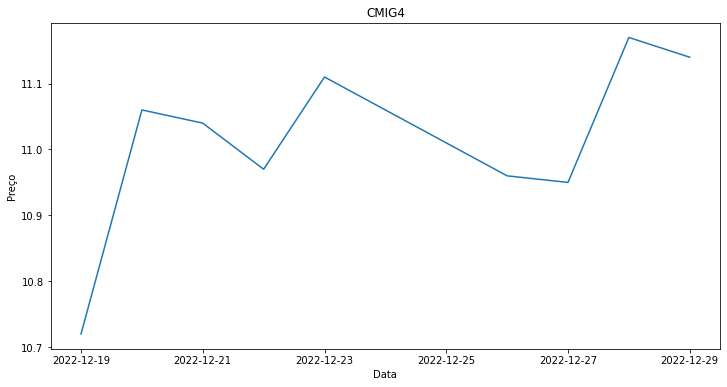

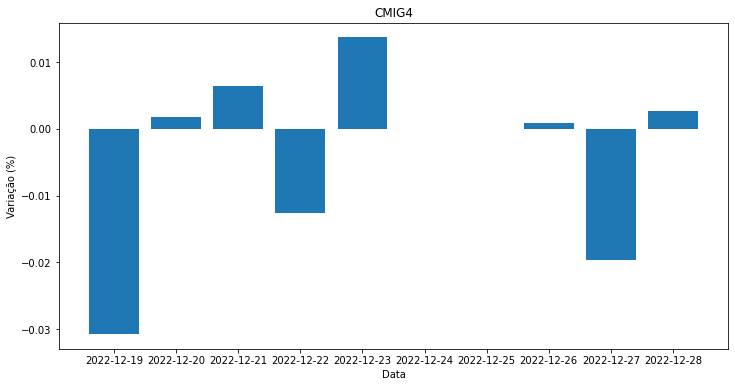

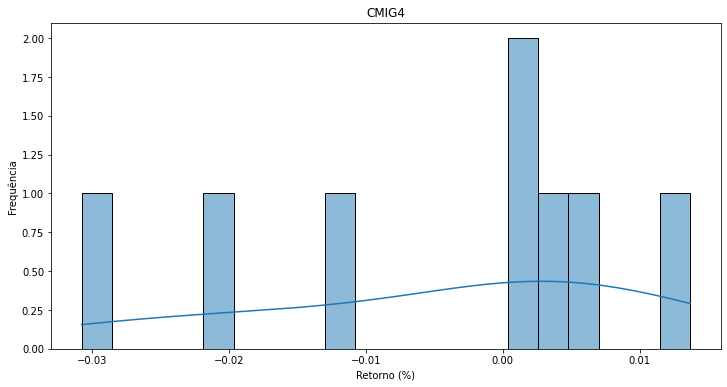

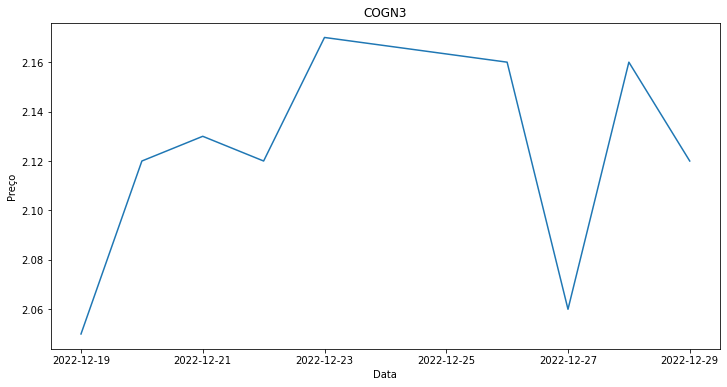

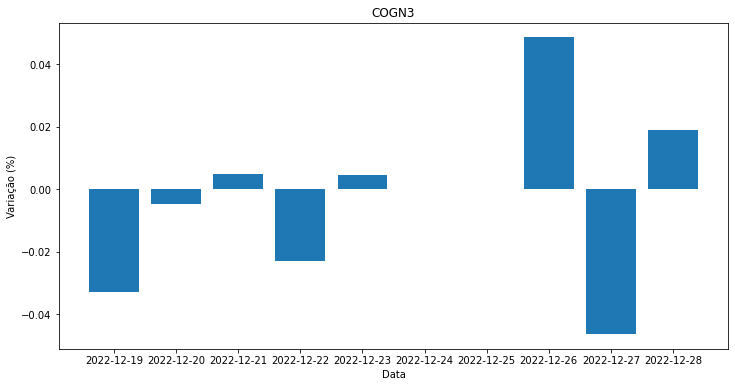

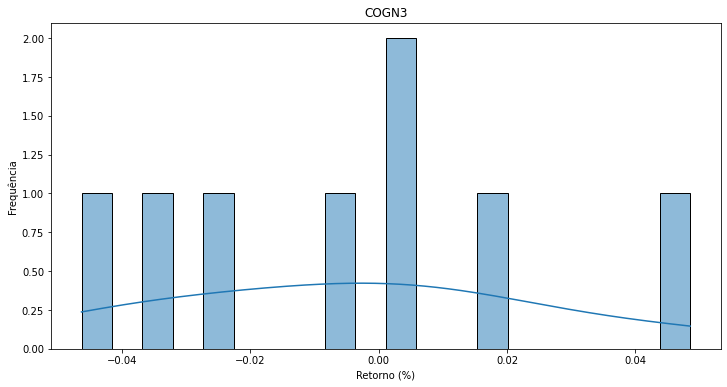

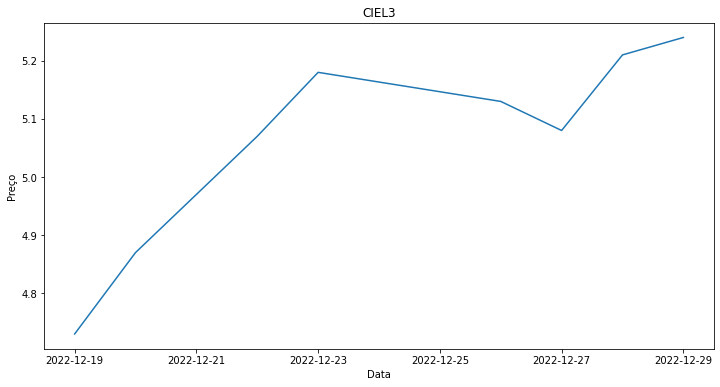

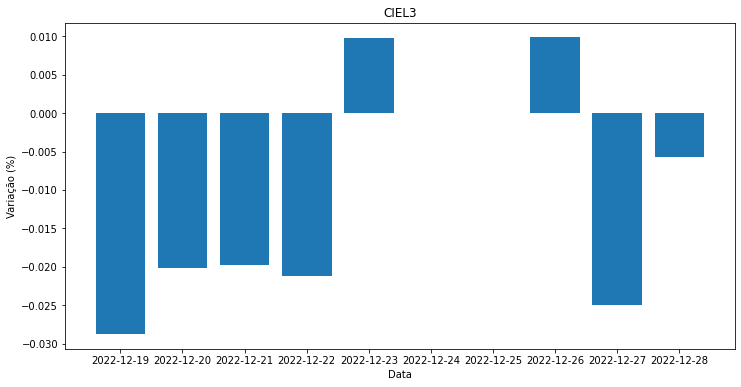

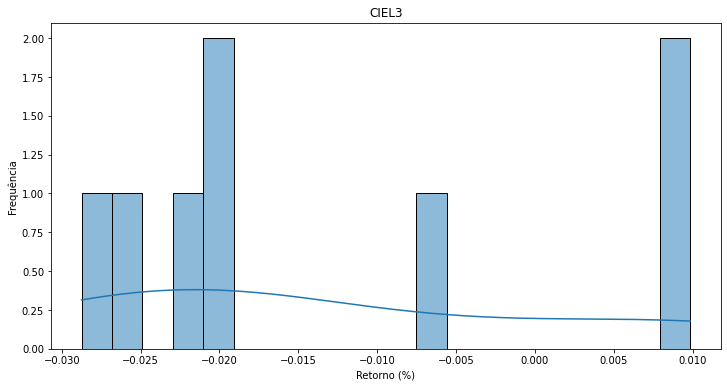

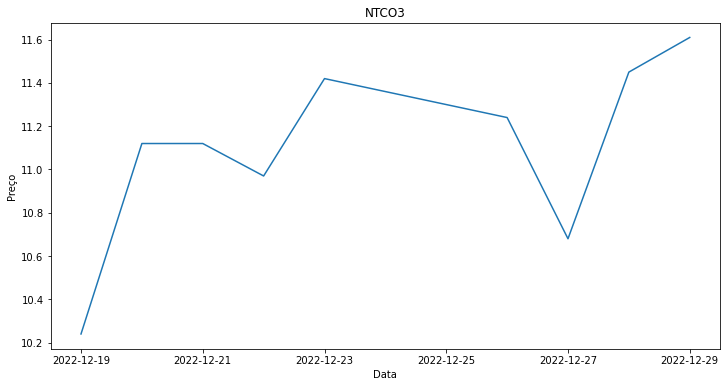

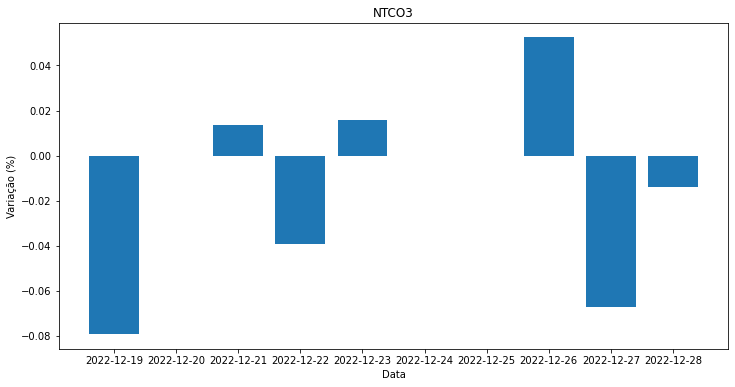

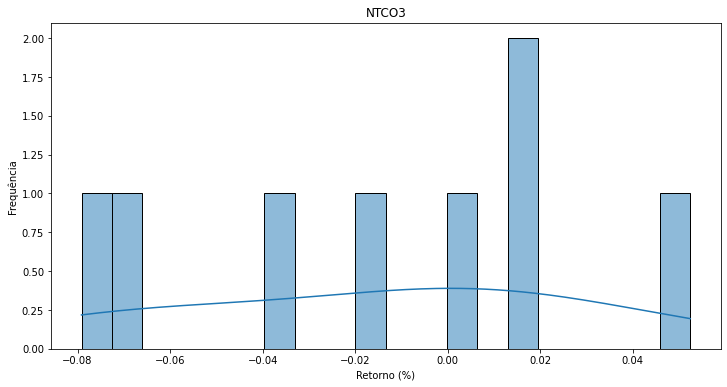

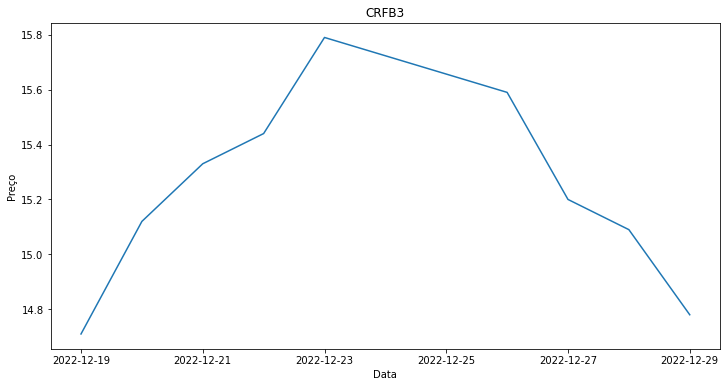

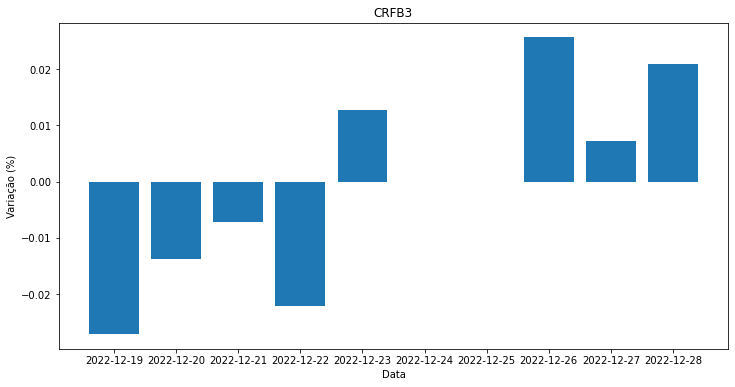

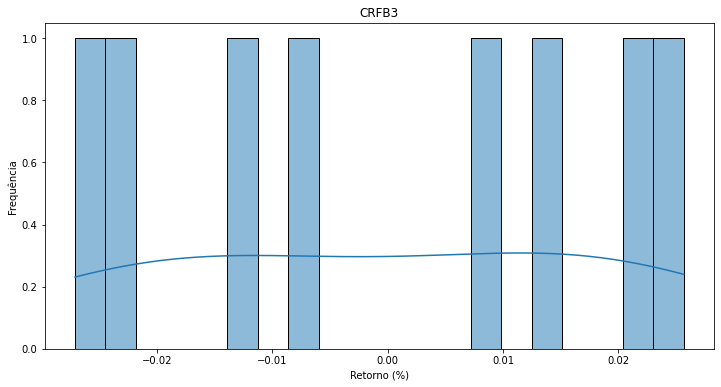

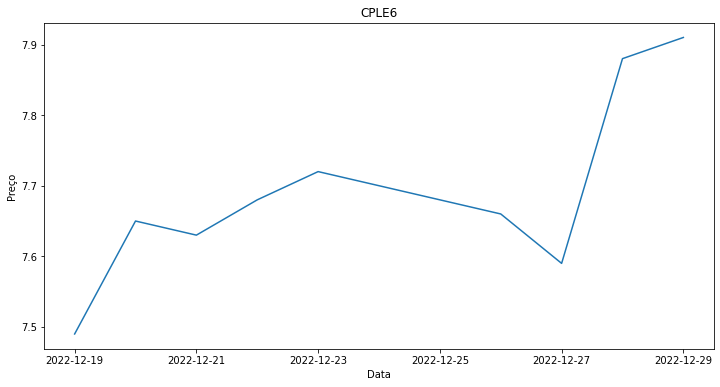

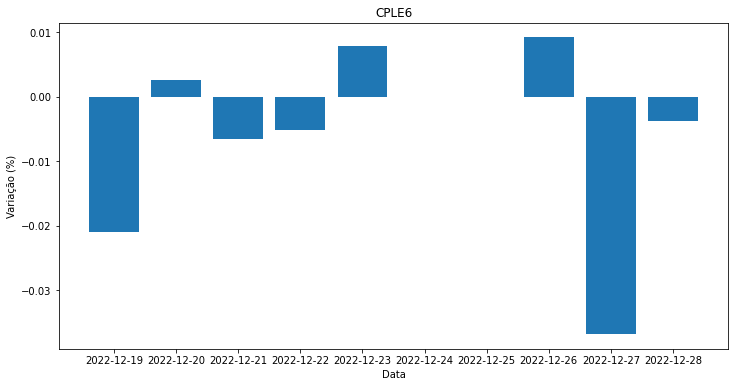

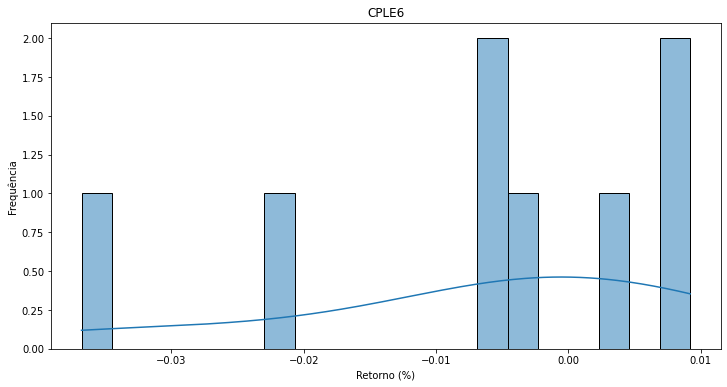

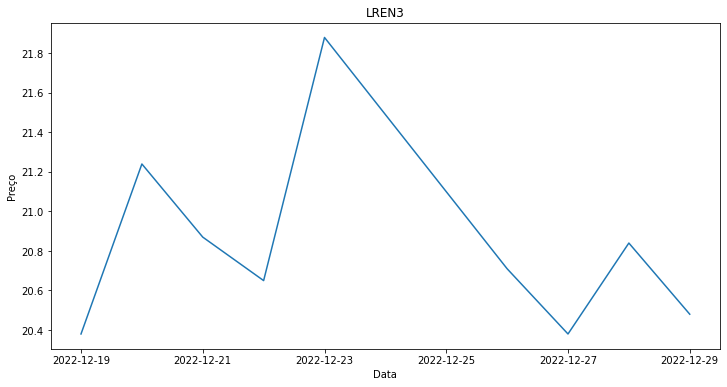

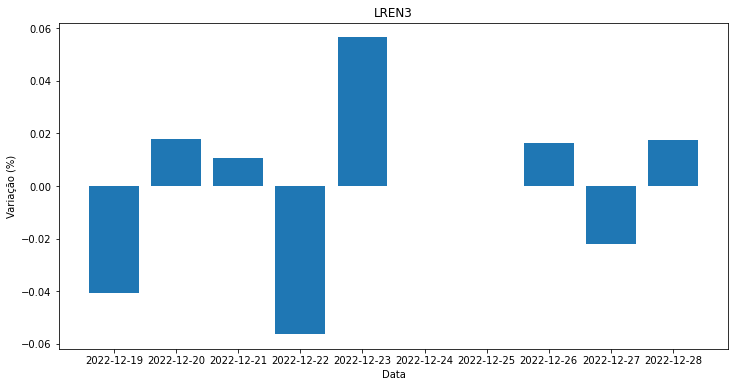

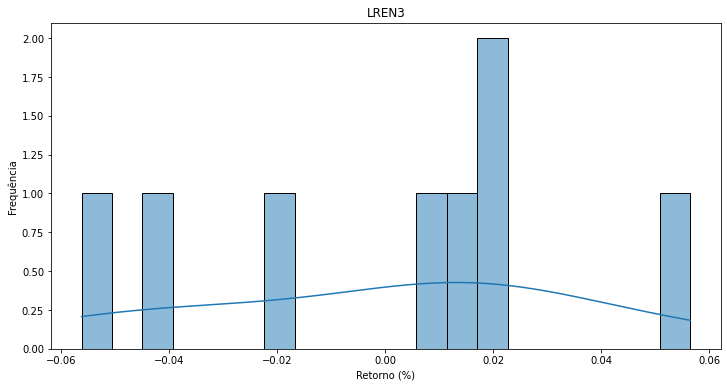

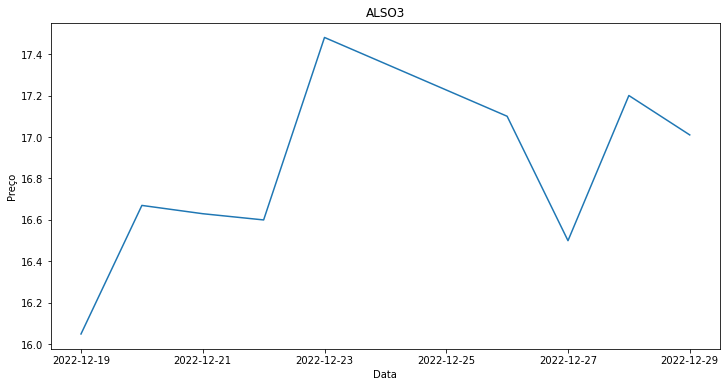

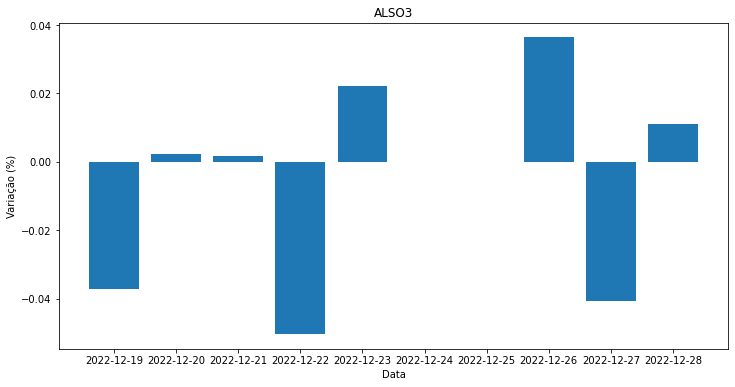

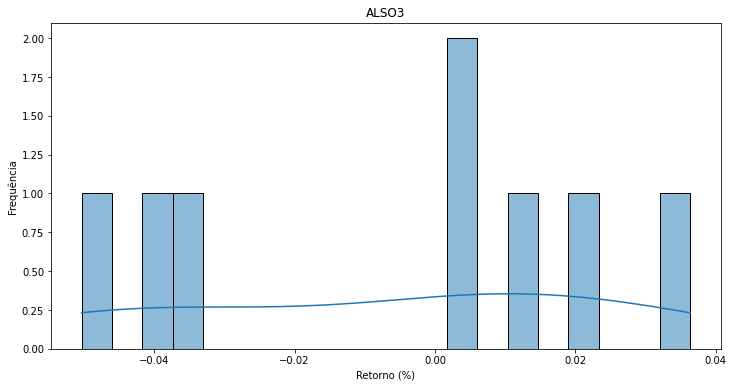

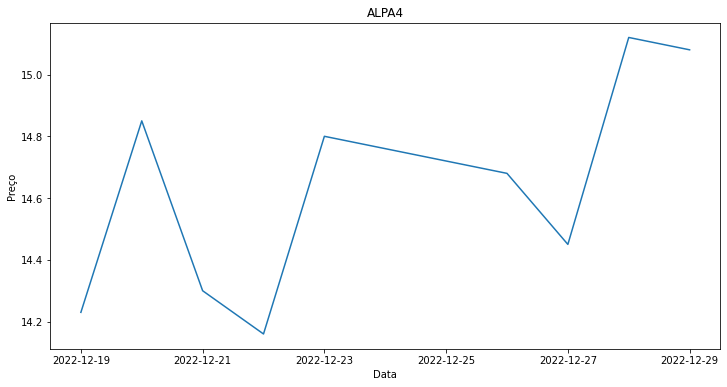

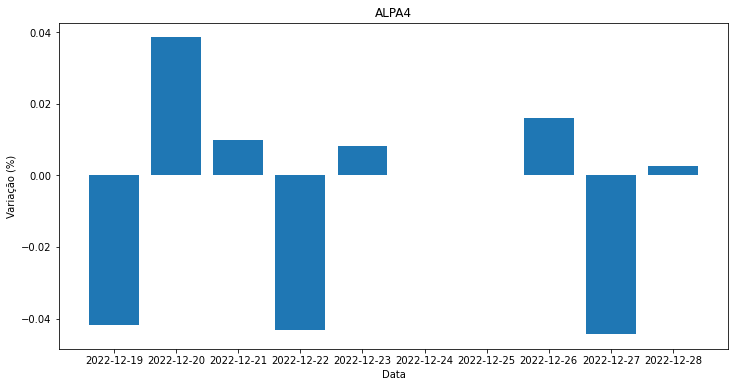

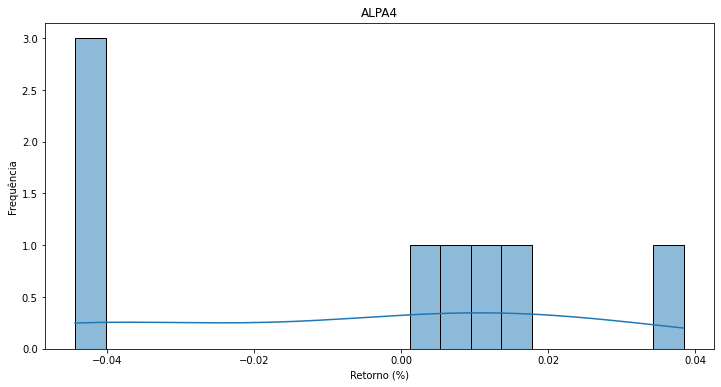

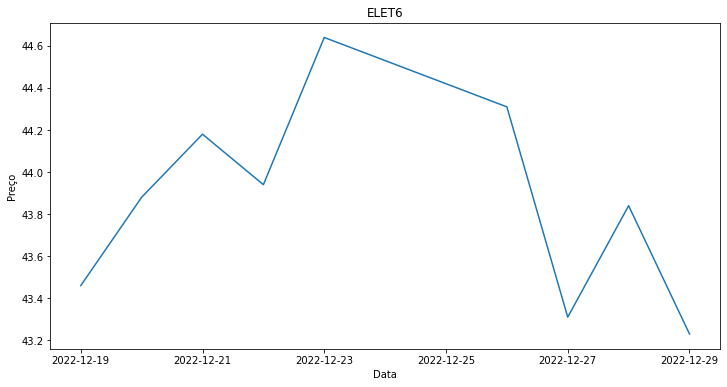

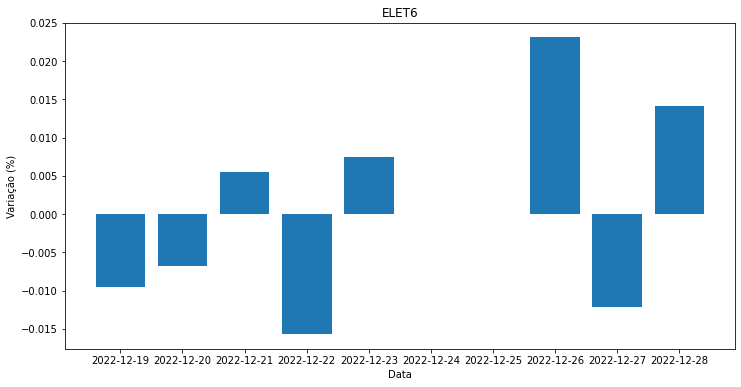

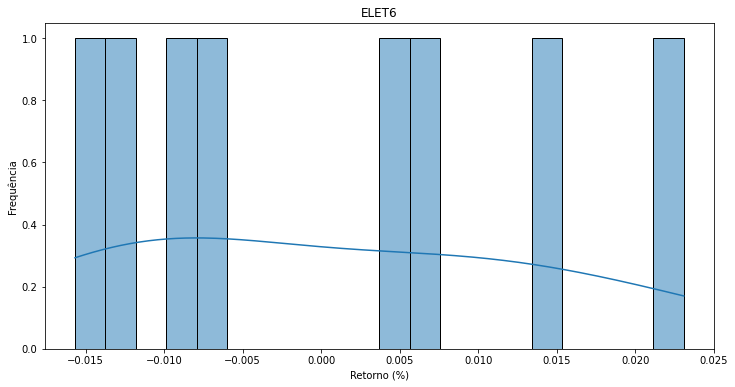

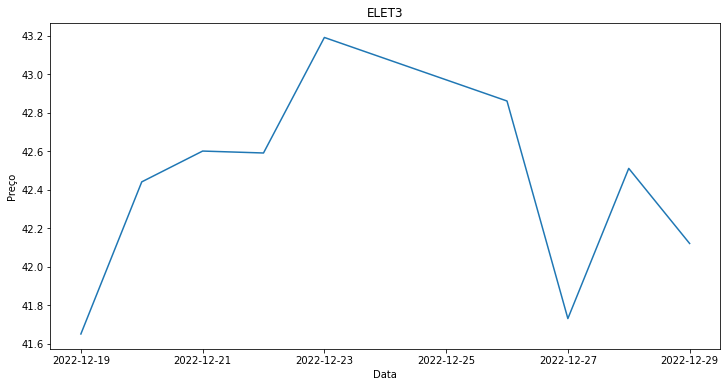

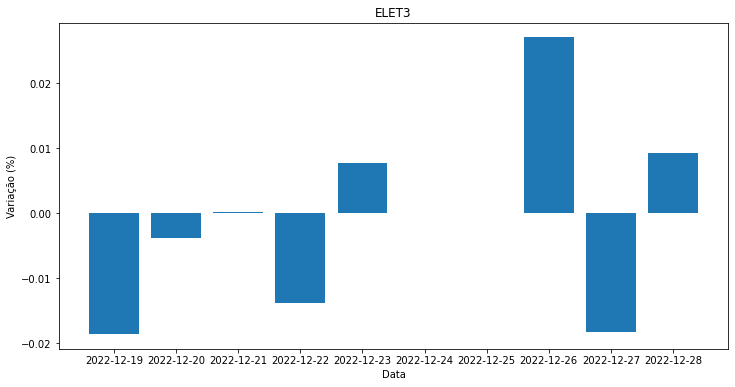

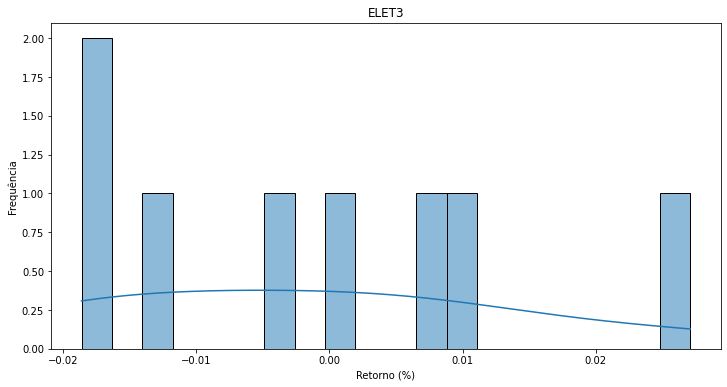

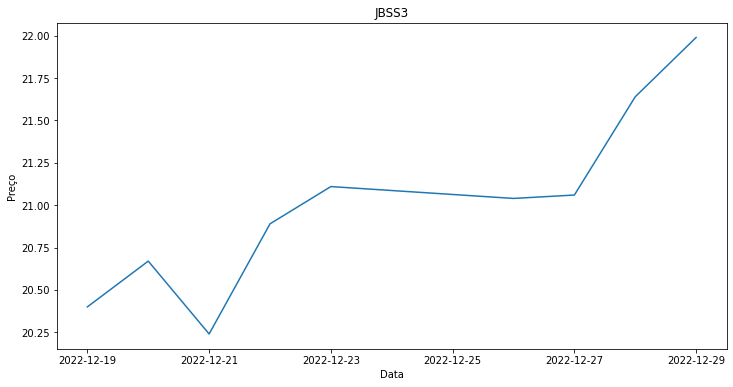

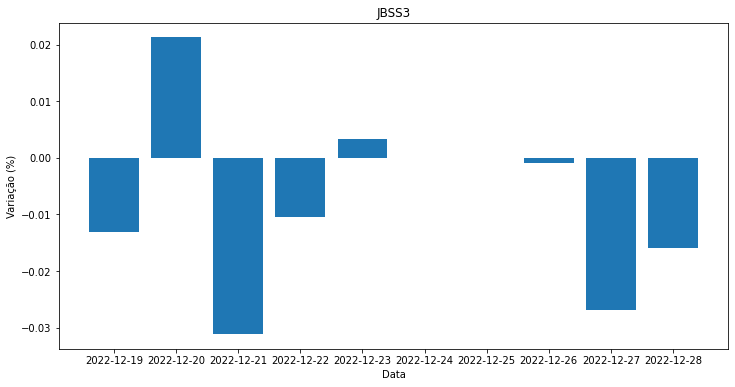

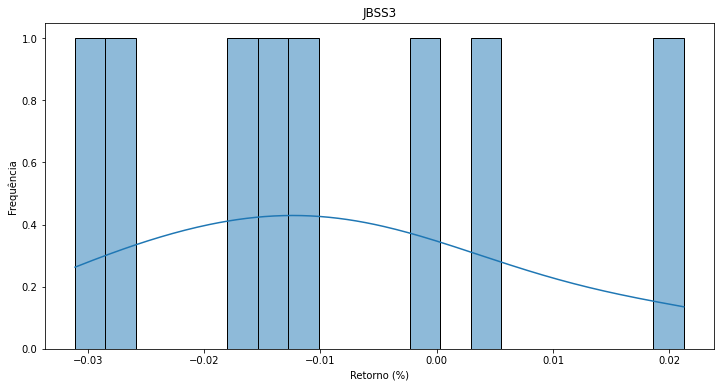

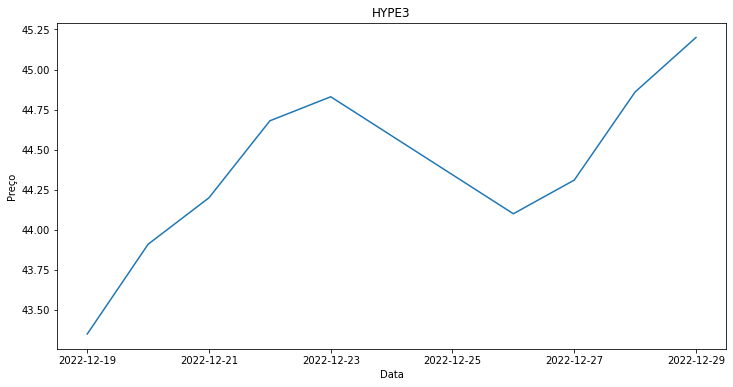

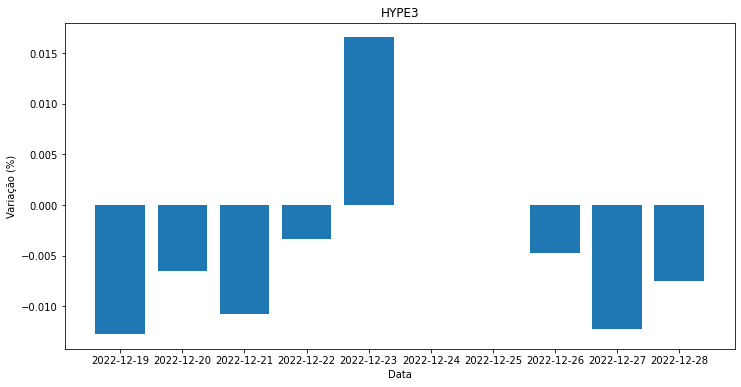

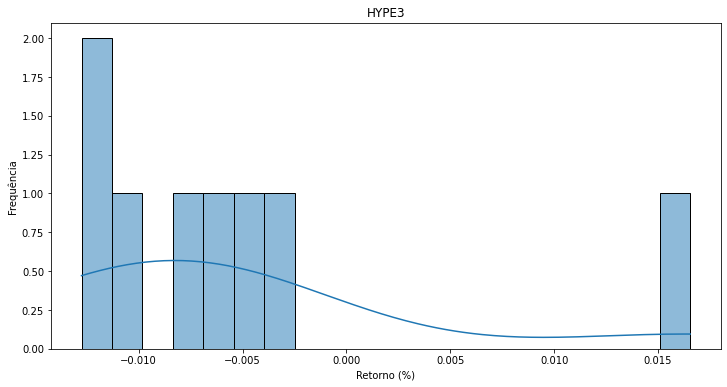

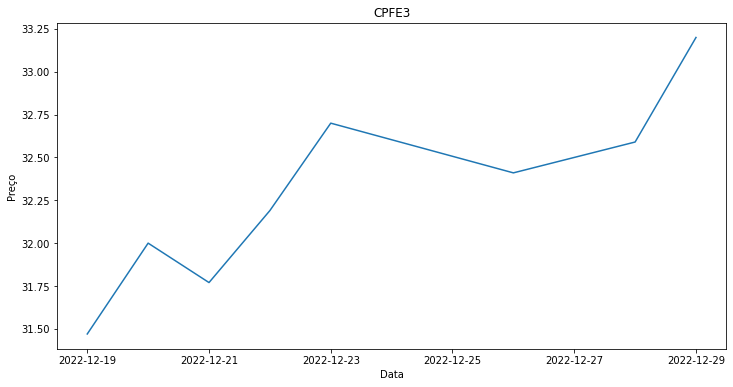

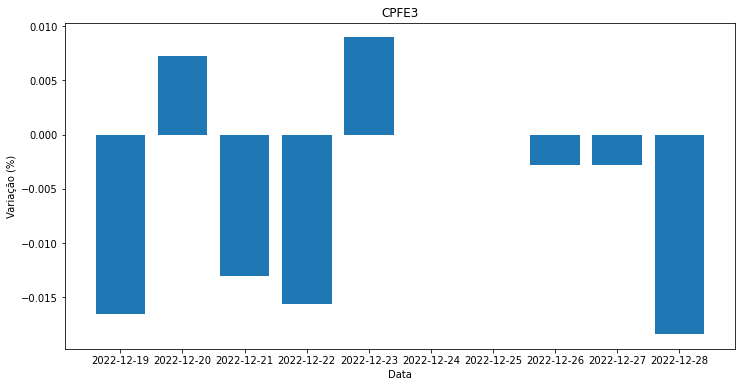

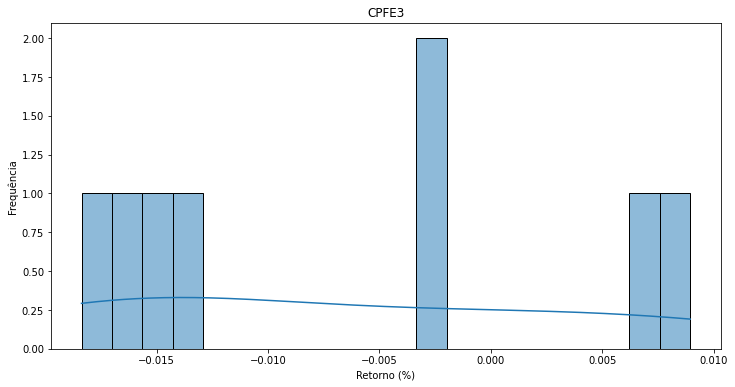

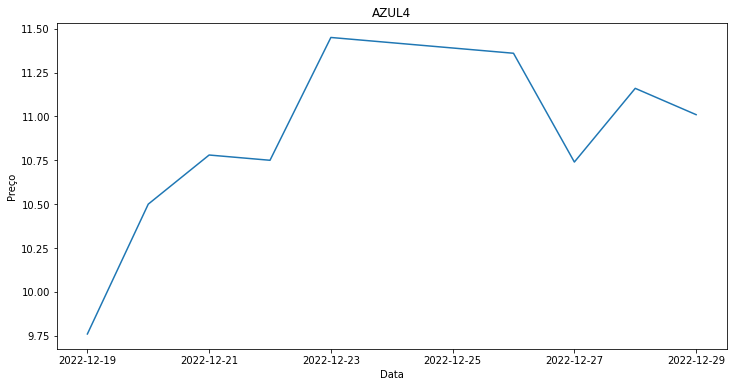

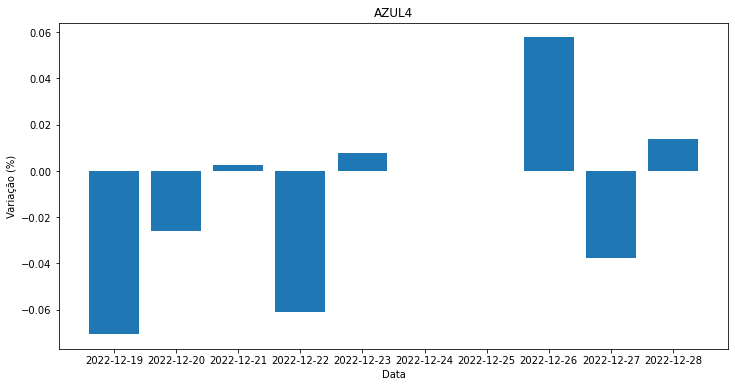

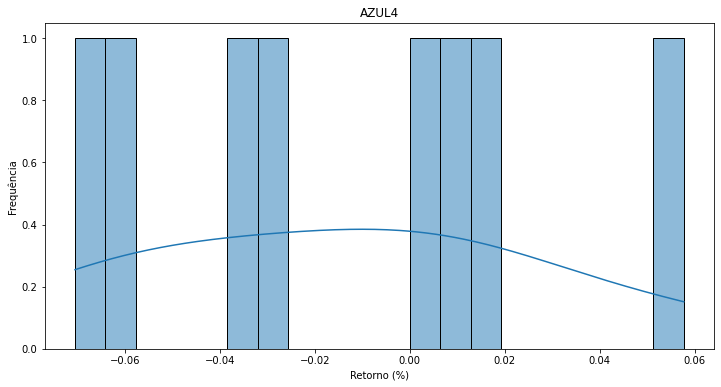

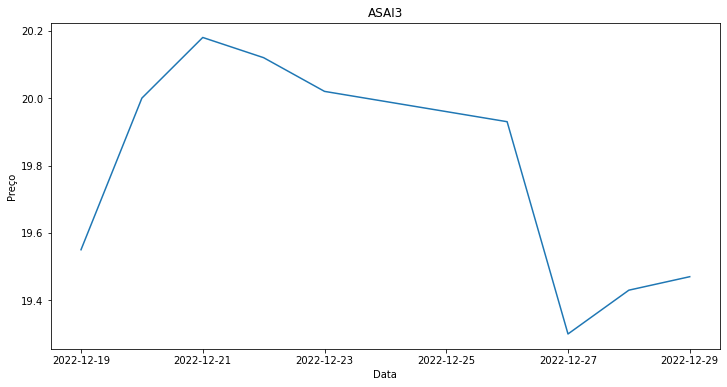

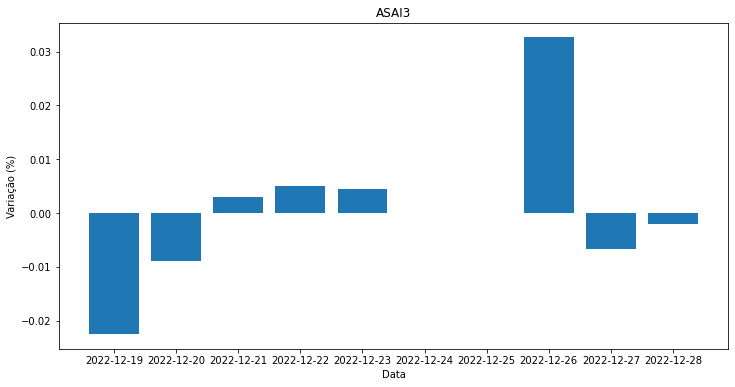

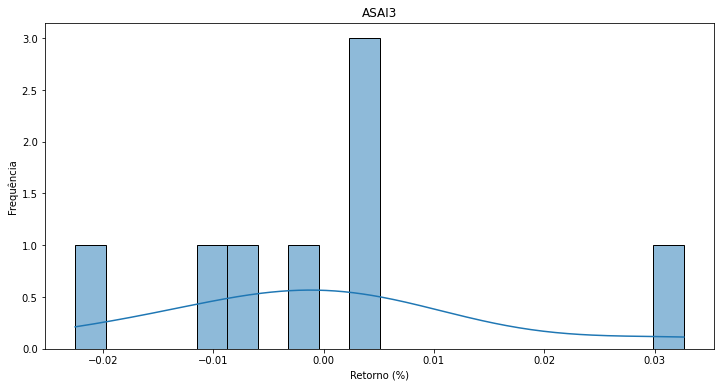

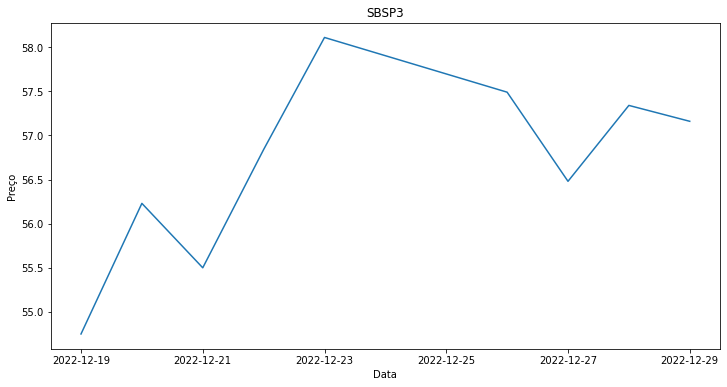

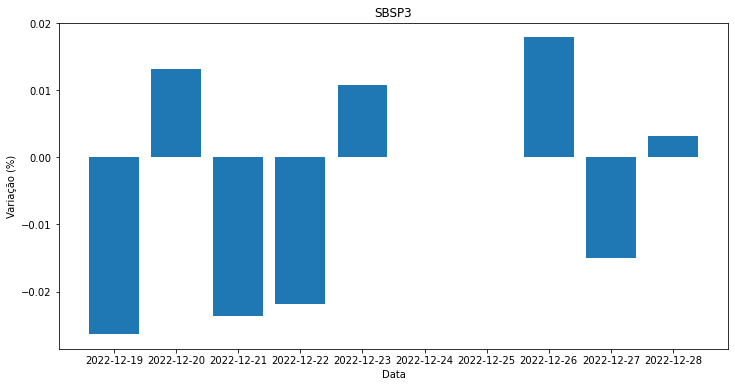

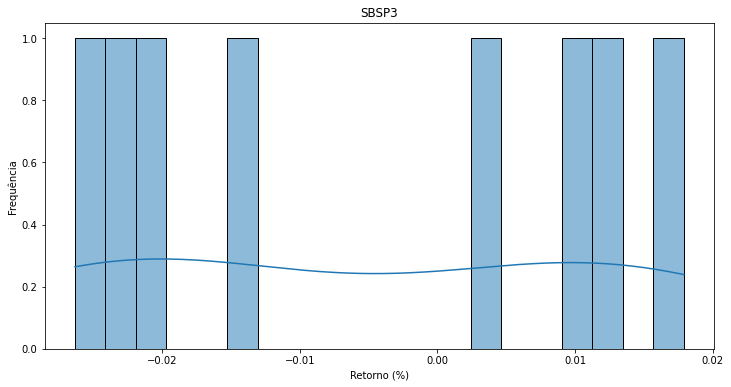

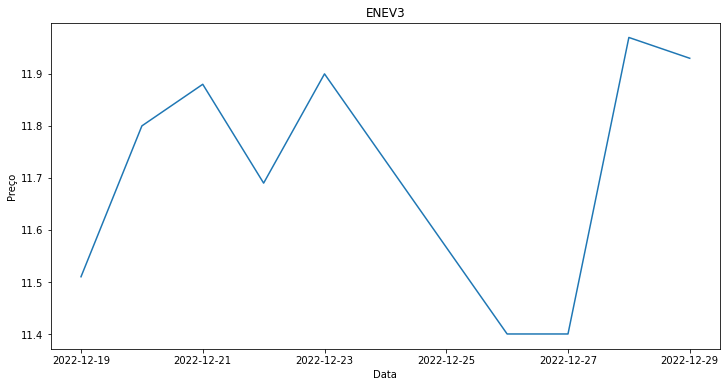

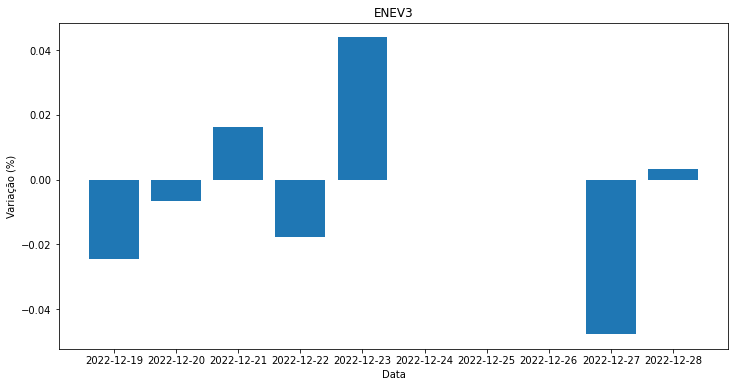

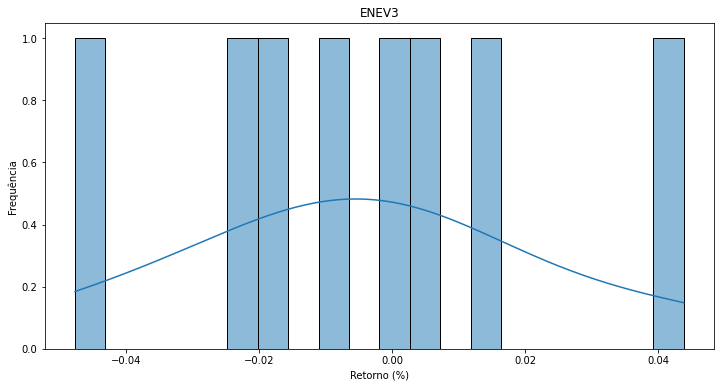

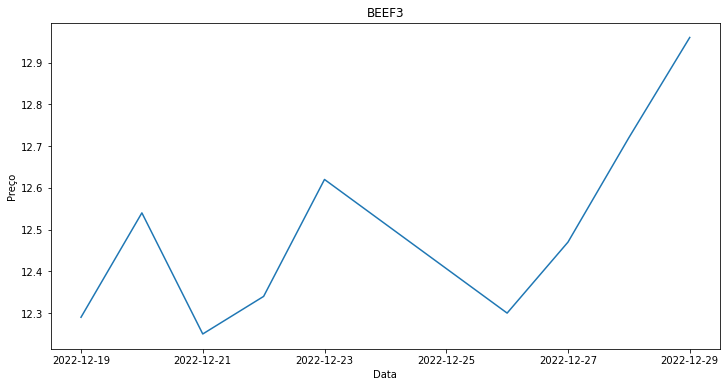

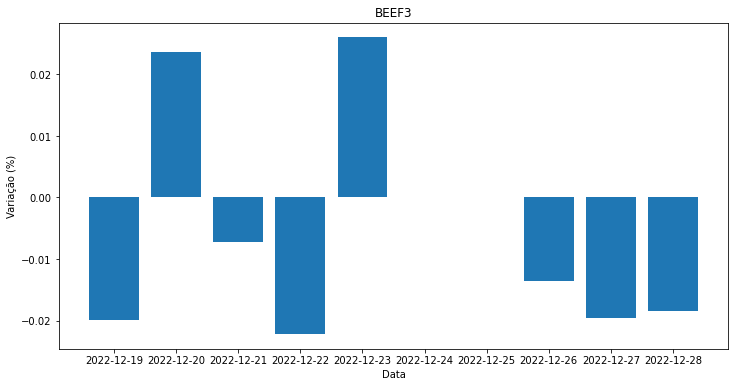

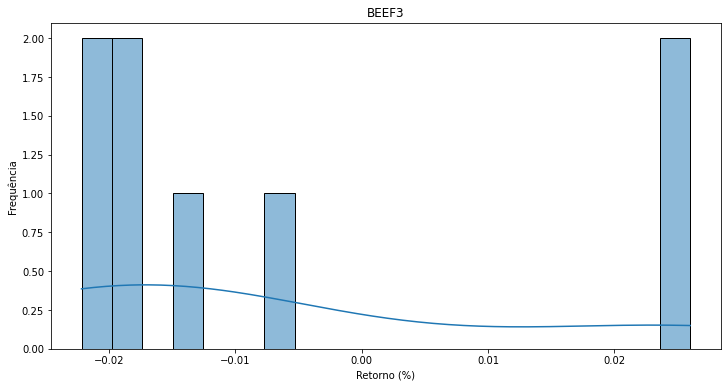

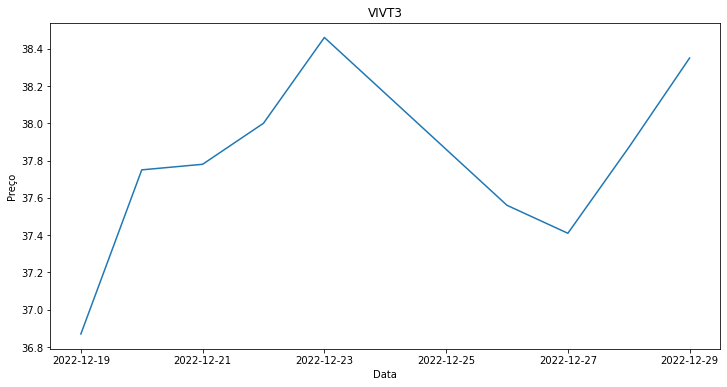

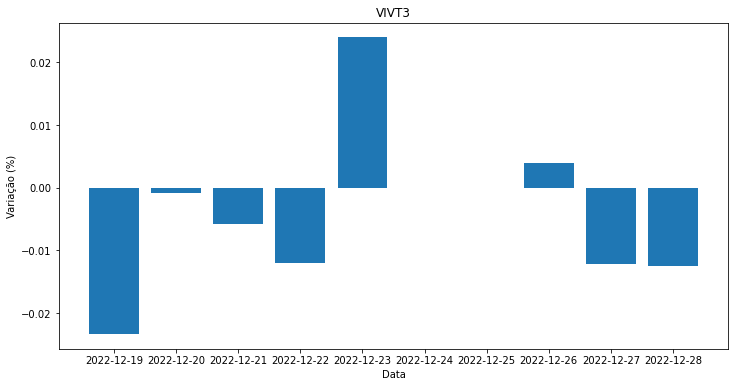

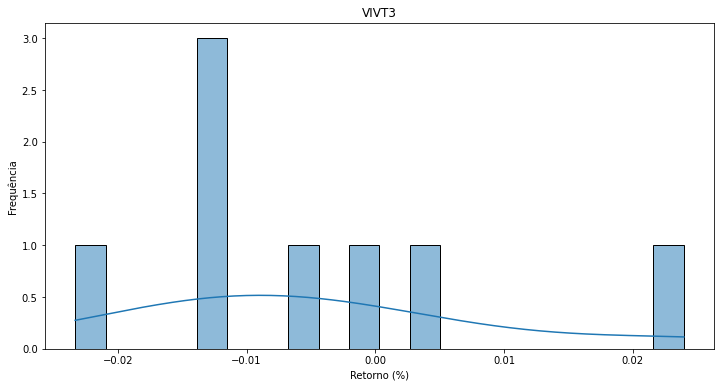

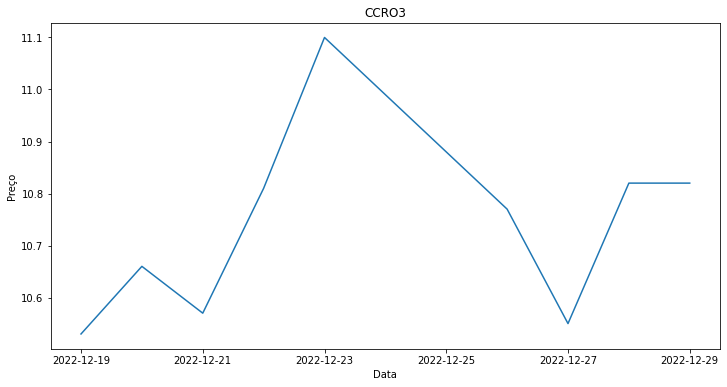

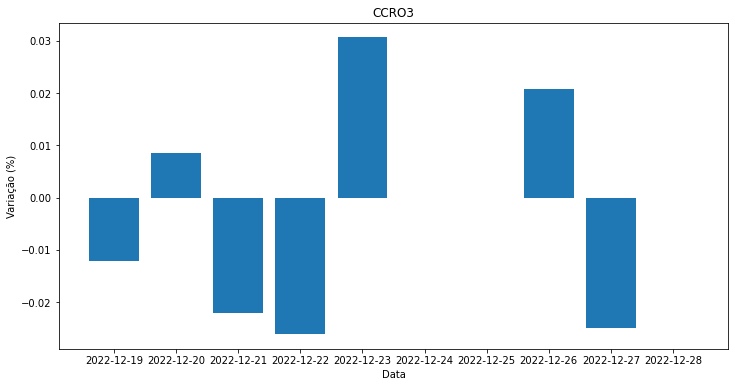

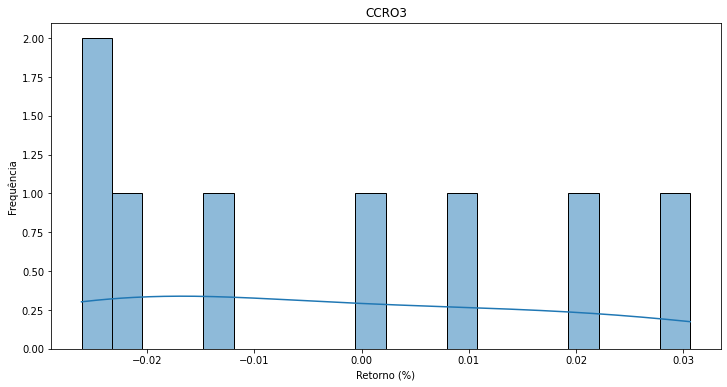

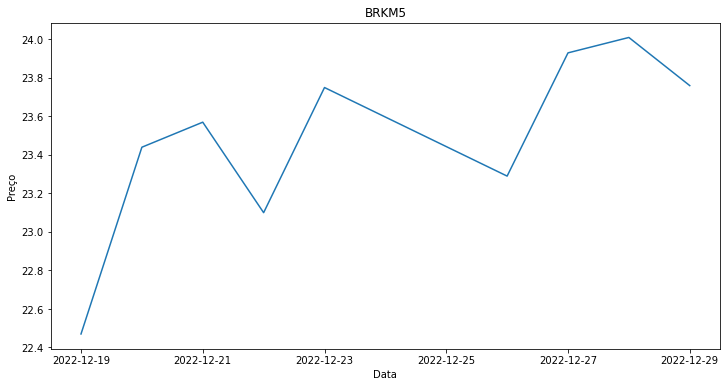

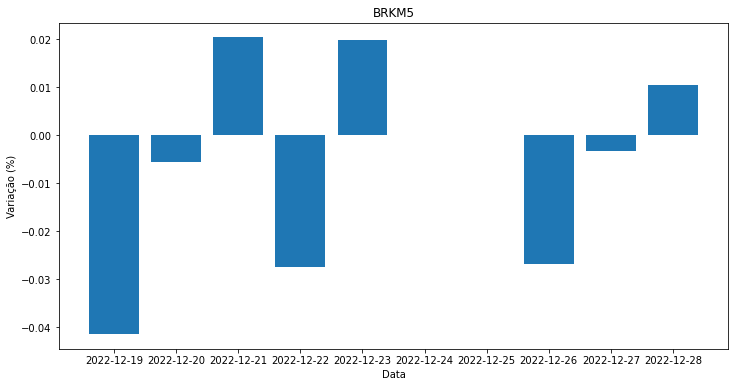

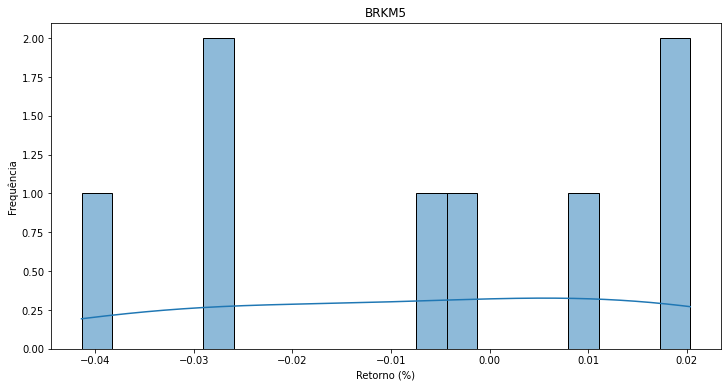

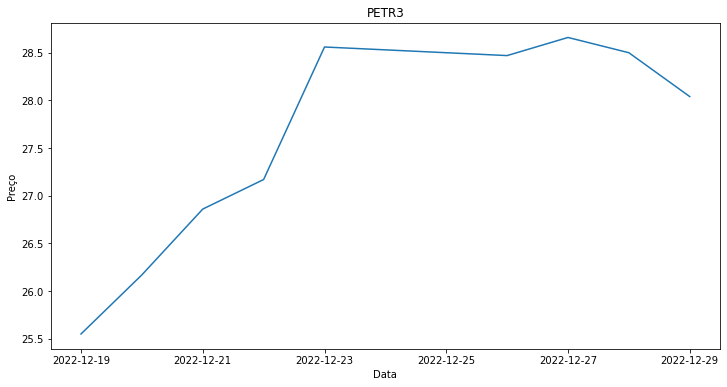

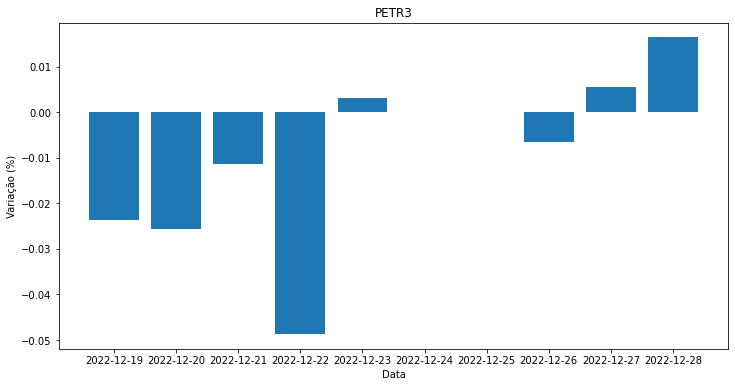

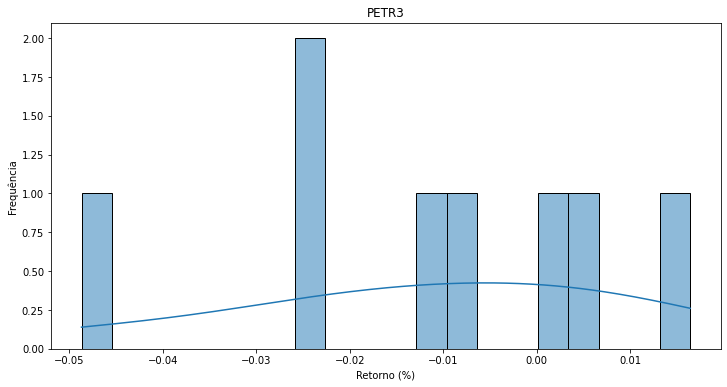

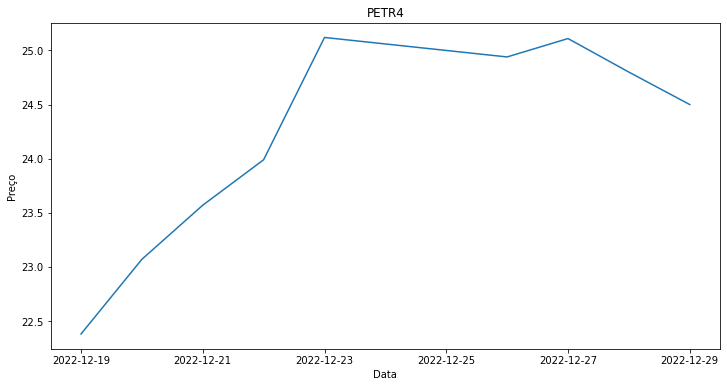

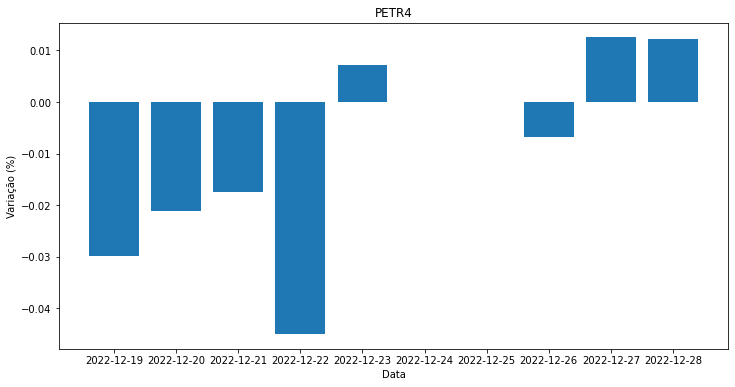

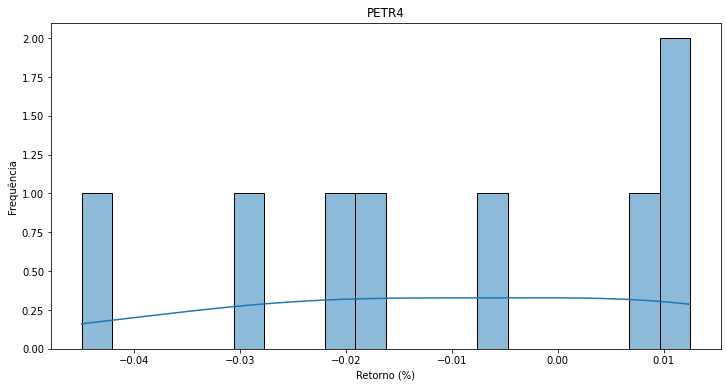

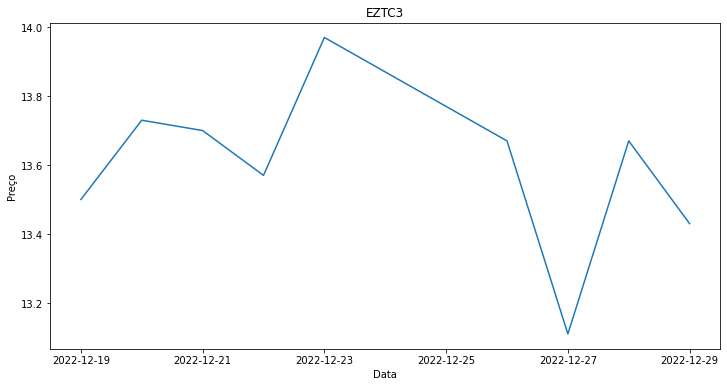

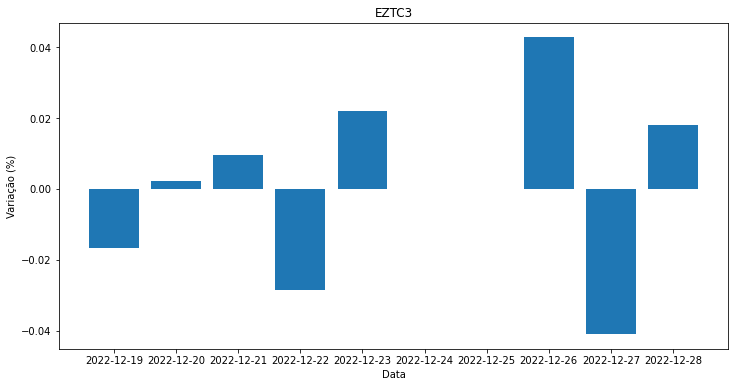

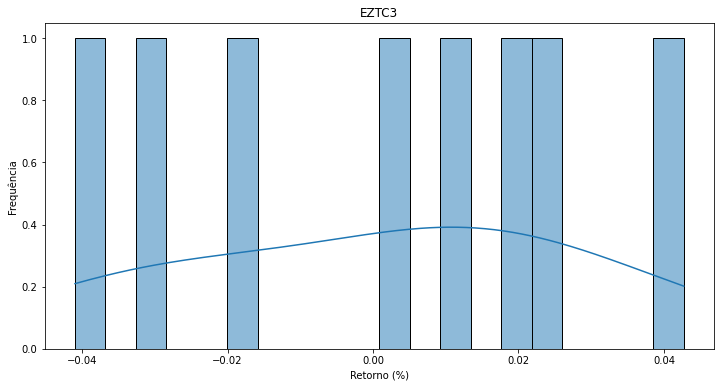

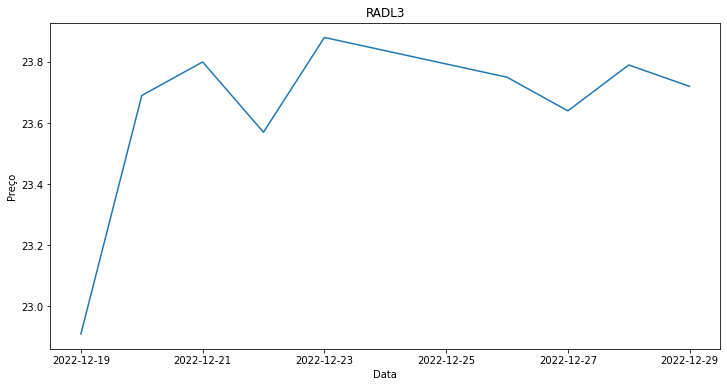

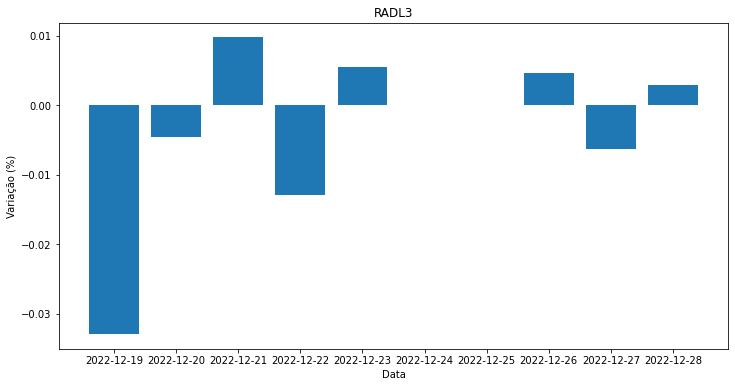

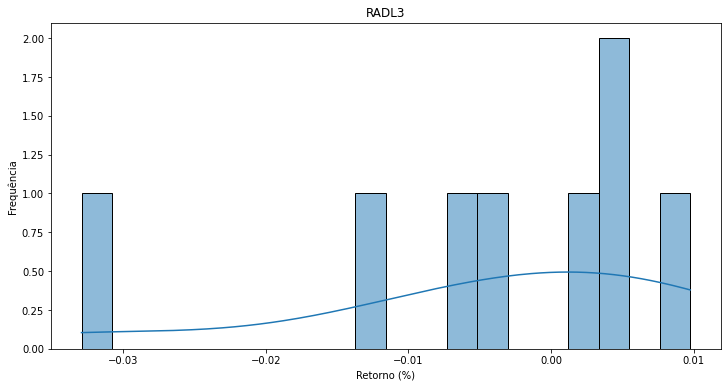

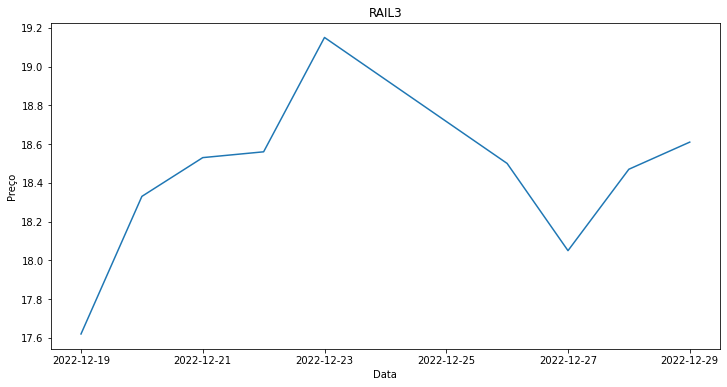

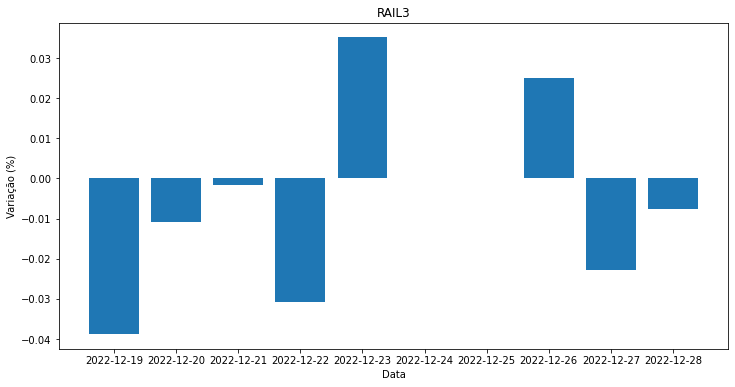

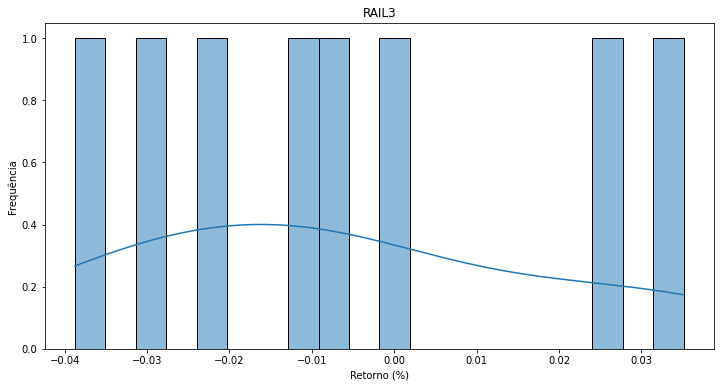

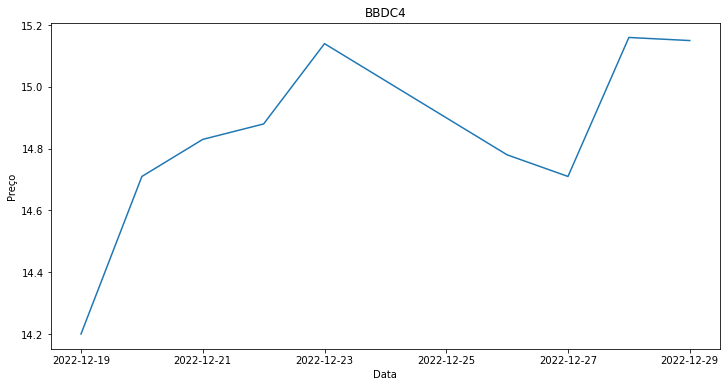

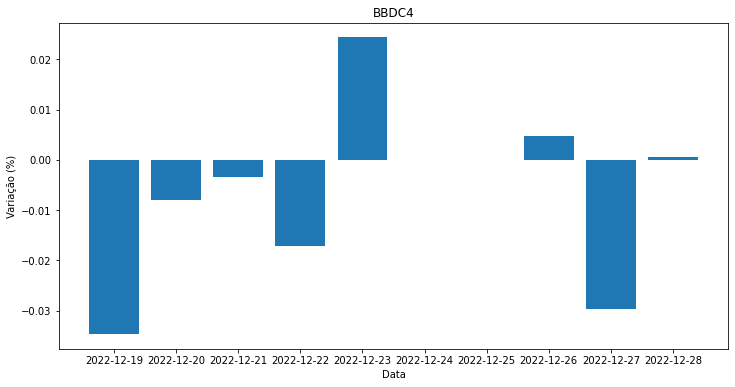

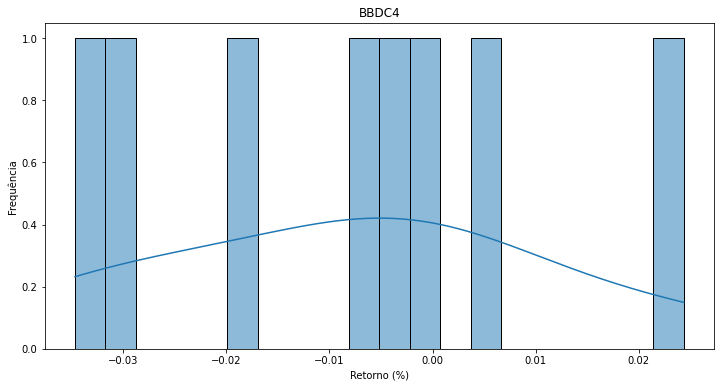

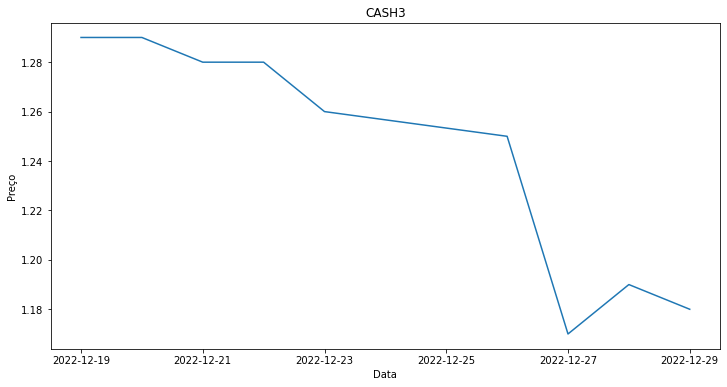

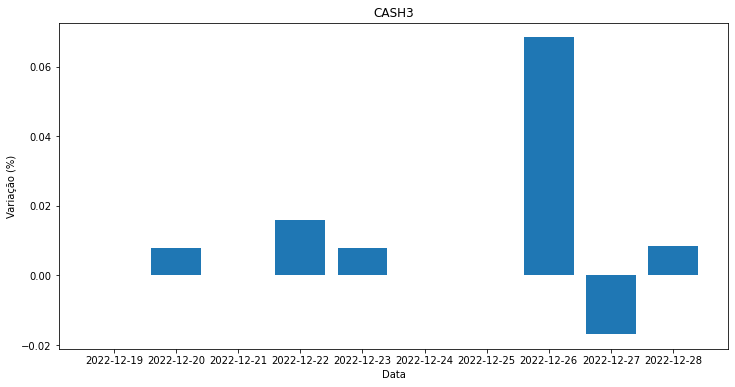

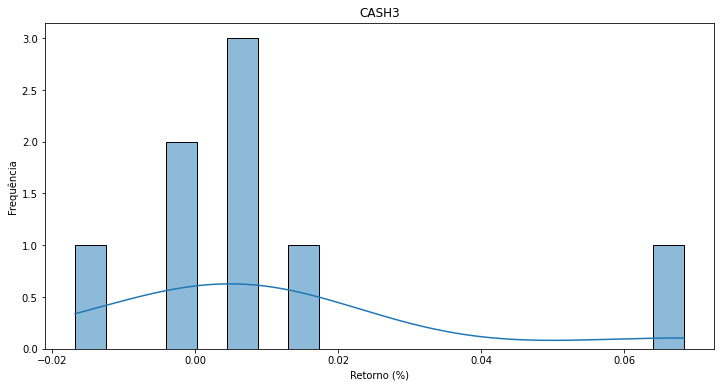

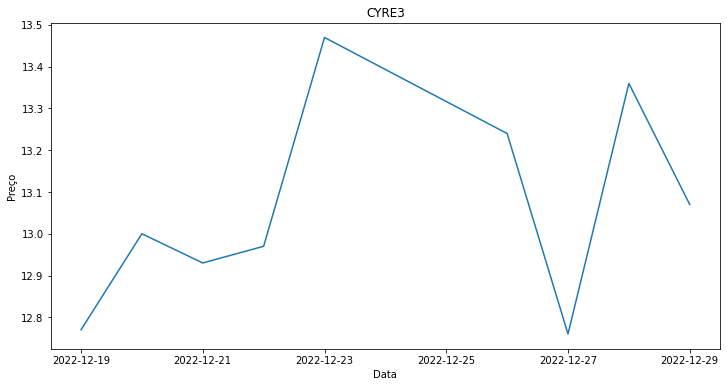

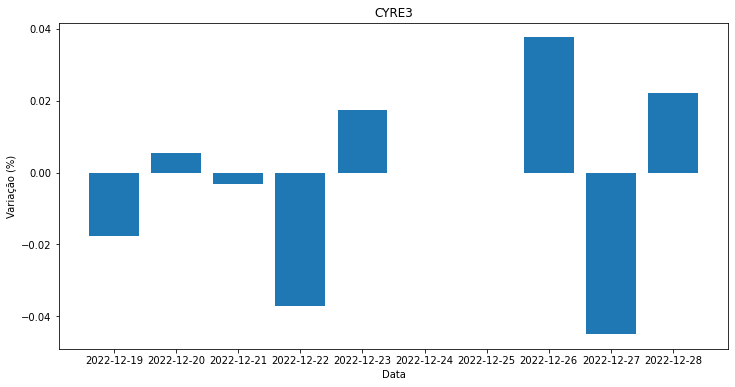

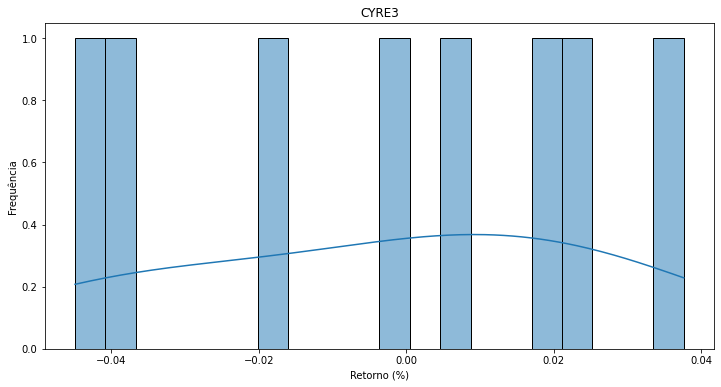

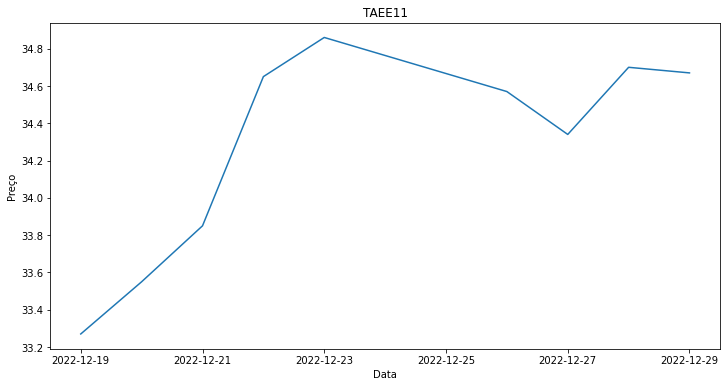

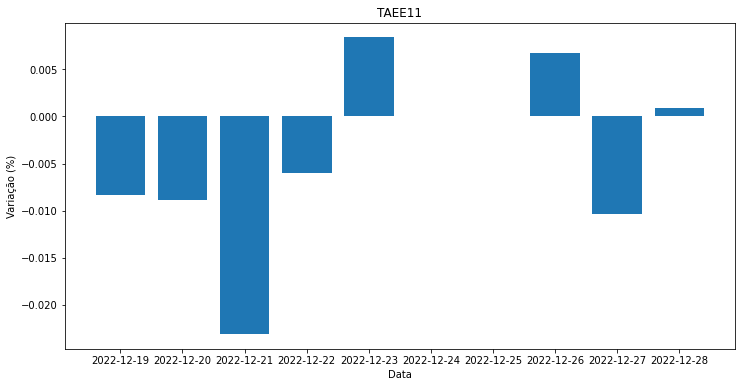

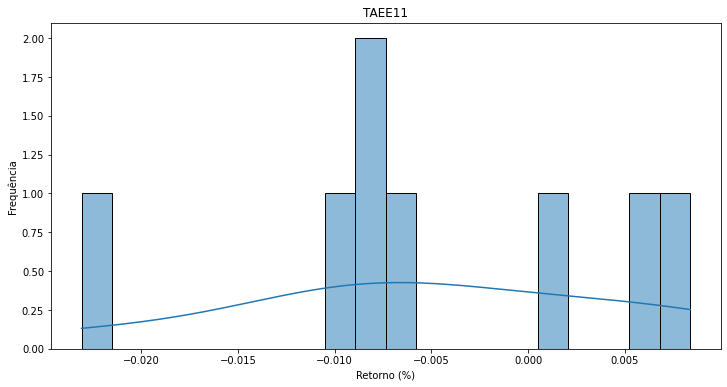

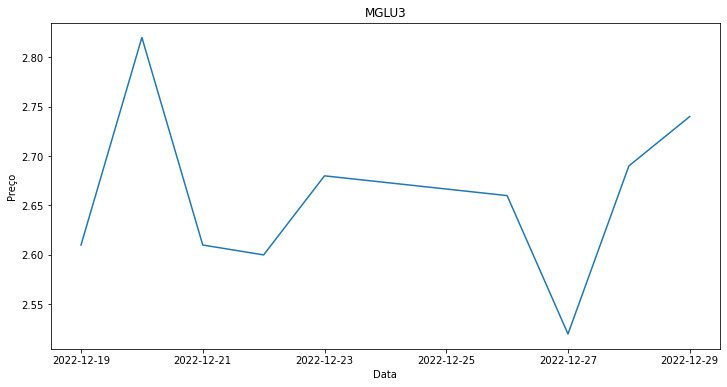

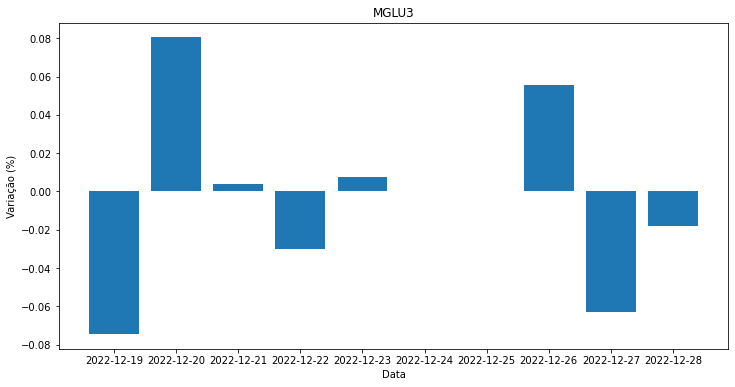

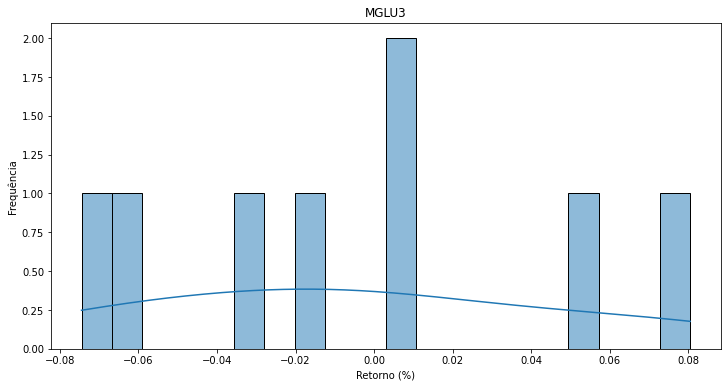

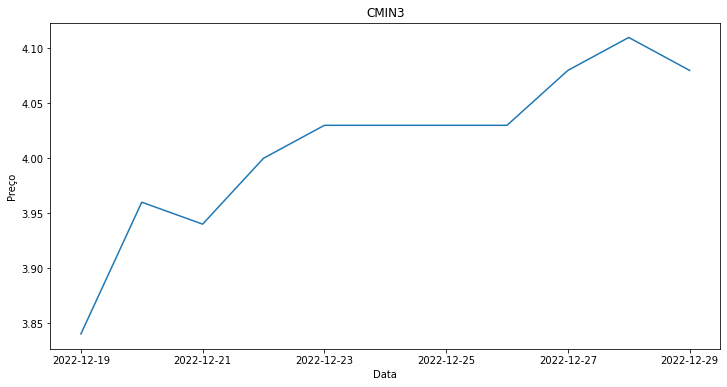

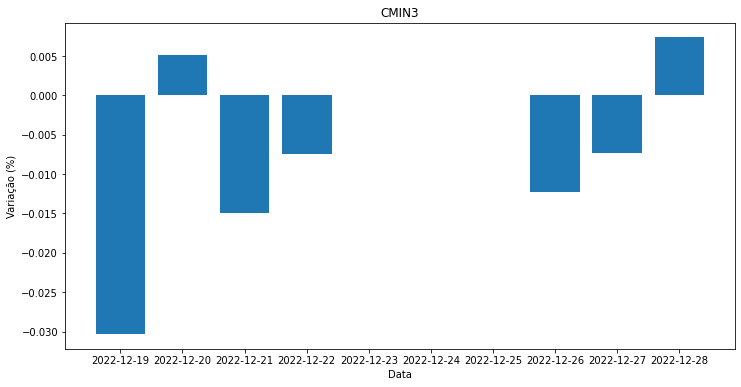

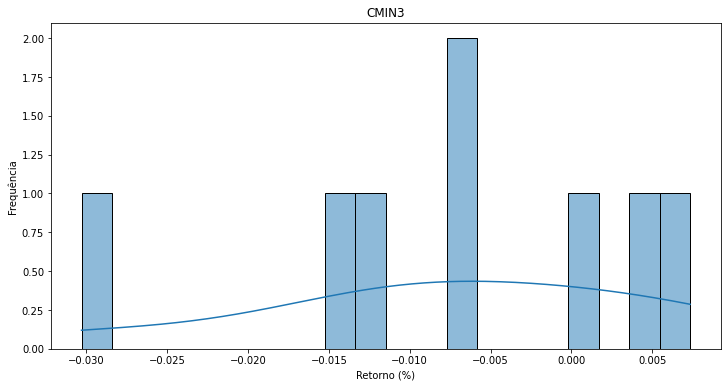

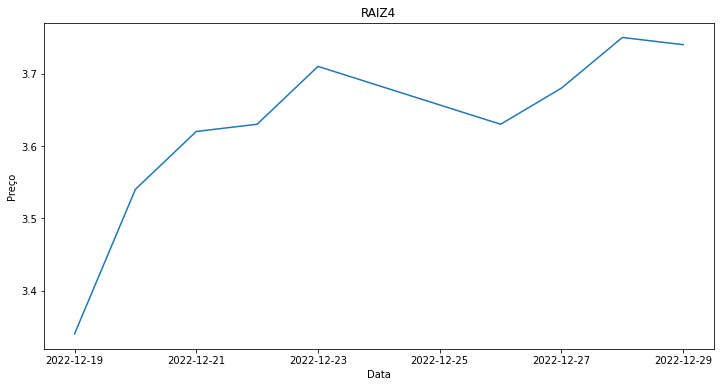

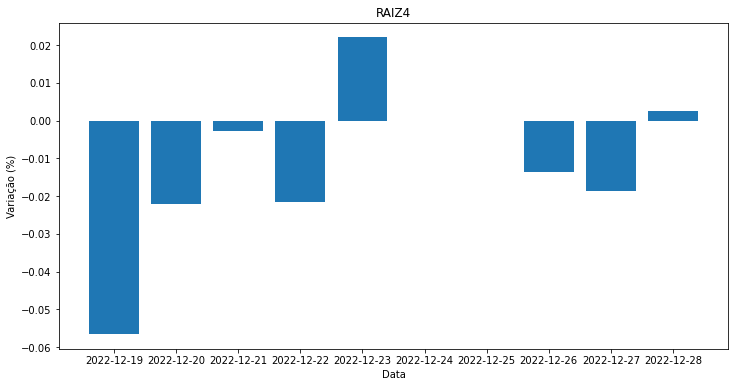

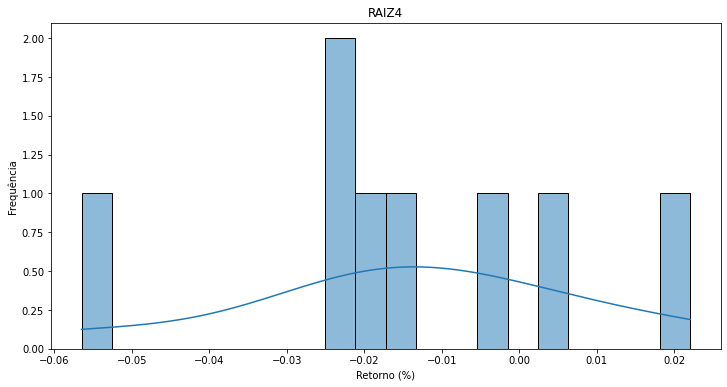

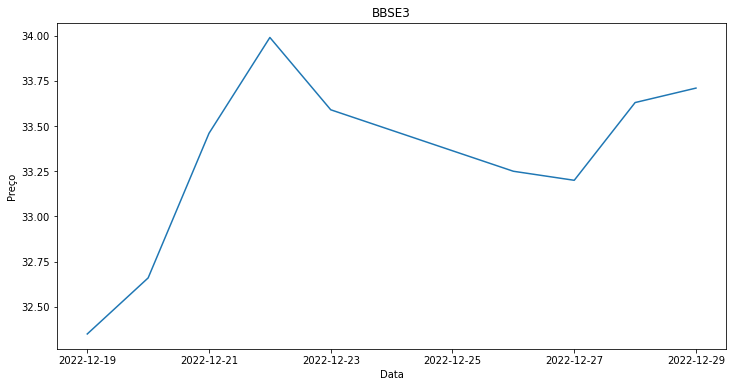

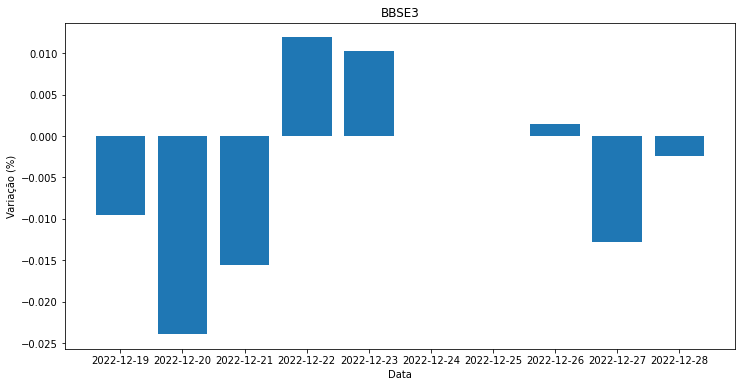

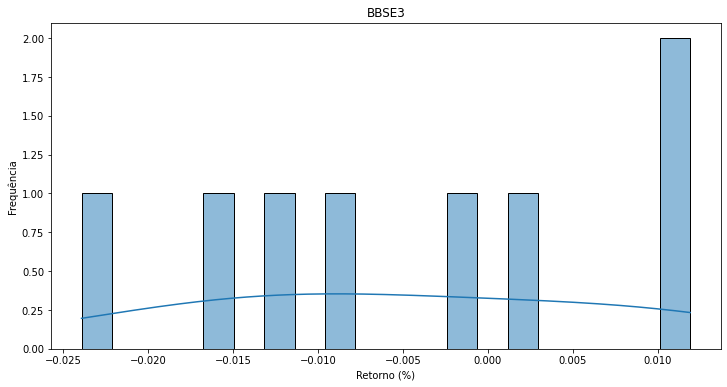

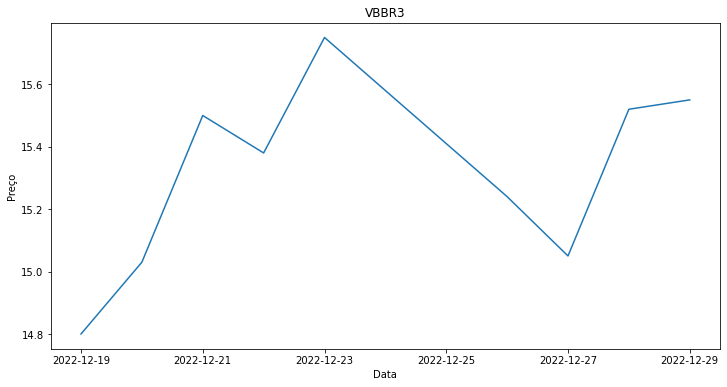

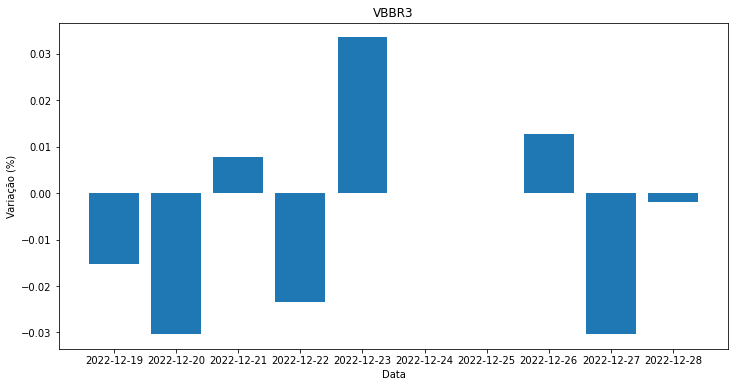

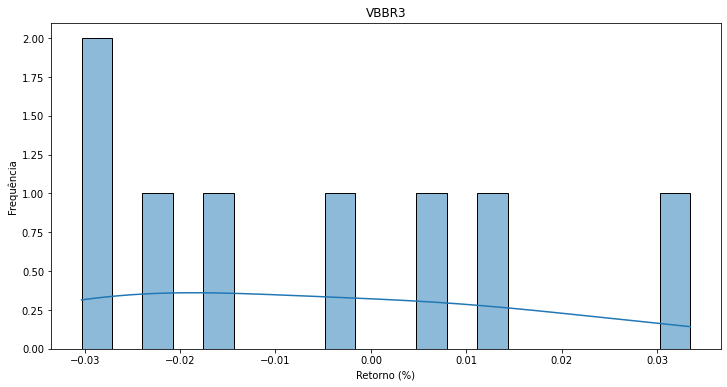

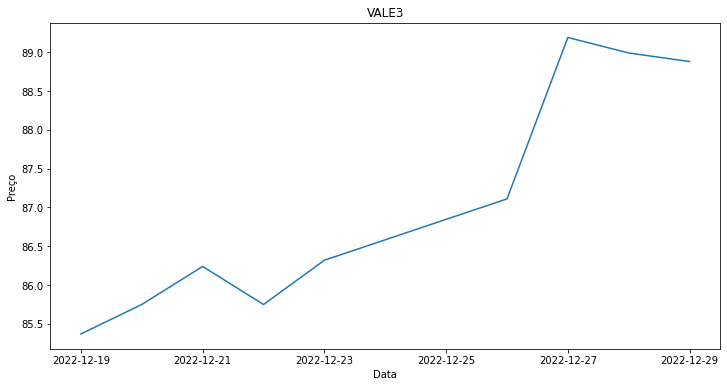

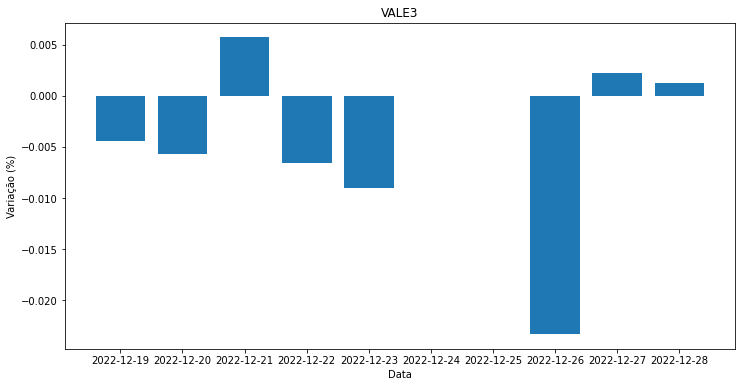

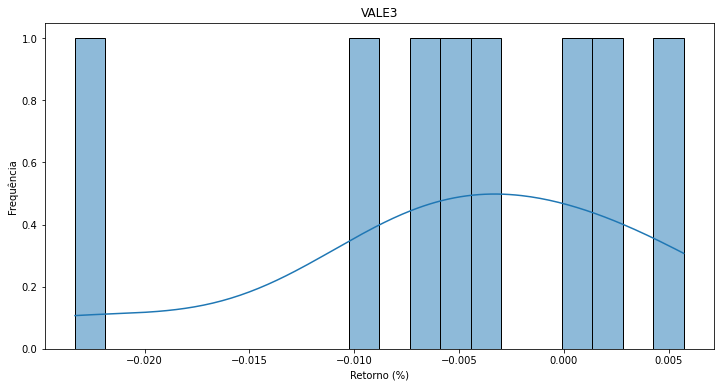

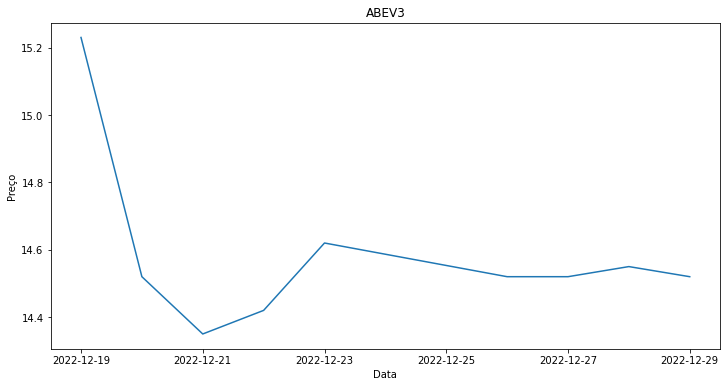

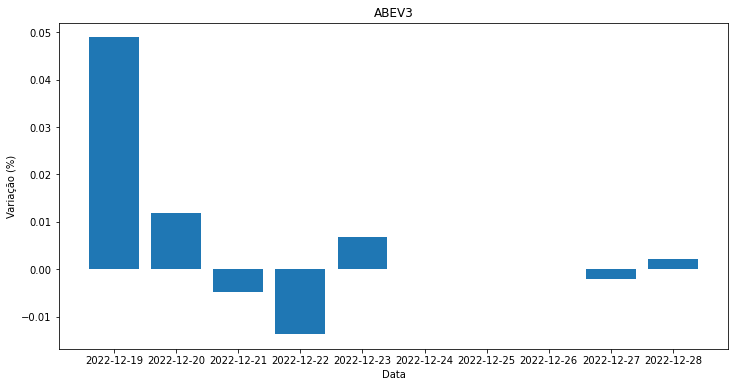

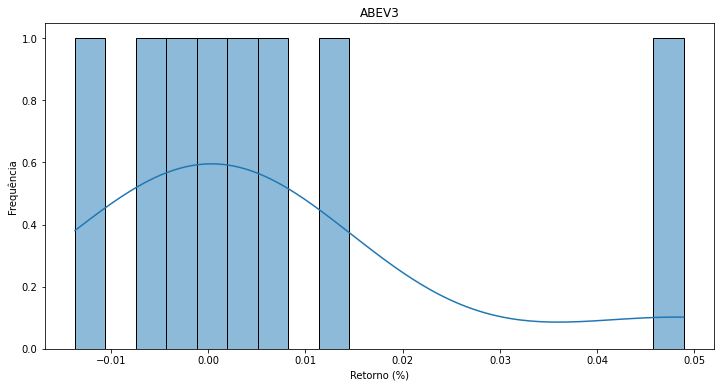

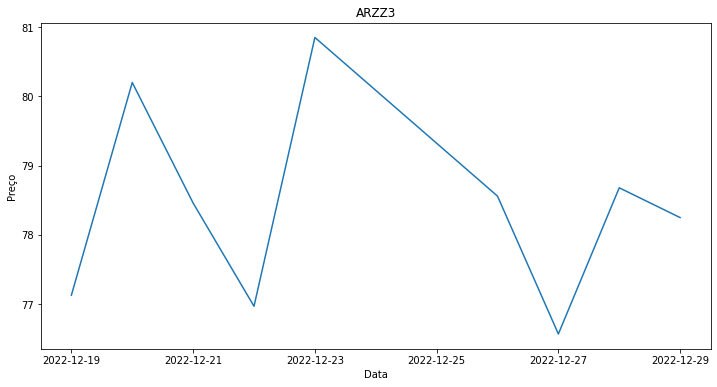

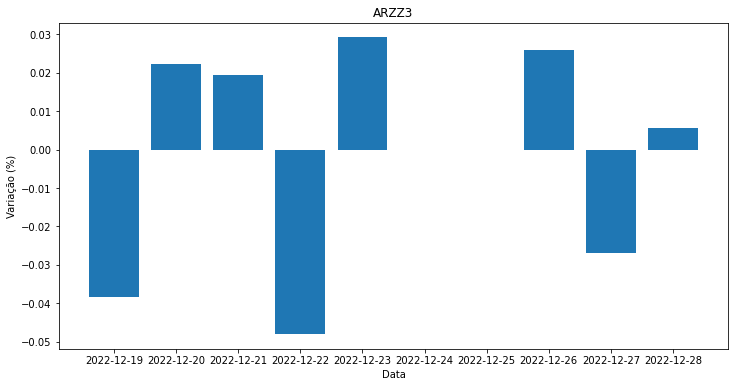

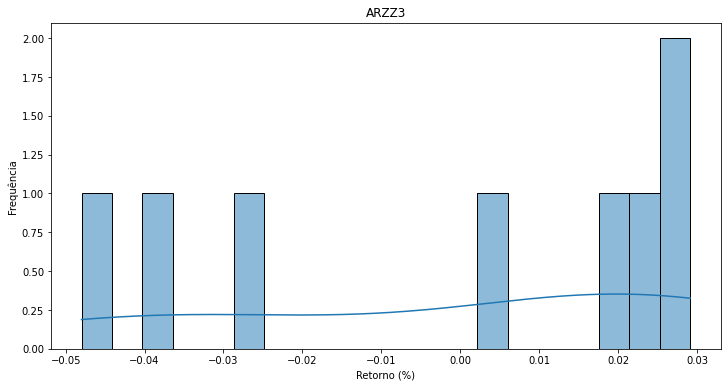

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

acoes = new_df['codneg'].unique()
for codneg in acoes:
    new_df_acao = new_df[new_df['codneg'] == codneg]
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(new_df_acao['dt_pregao'], new_df_acao['preult'])
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço')
    ax.set_title(codneg)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(new_df_acao['dt_pregao'], new_df_acao['diferenca_pct'])
    ax.set_xlabel('Data')
    ax.set_ylabel('Variação (%)')
    ax.set_title(codneg)
    plt.show()
    
    # criar o gráfico de distribuição de retornos
    fig, ax = plt.subplots(figsize=(12,6))
    sns.histplot(new_df_acao['diferenca_pct'], bins=20, kde=True, ax=ax)
    ax.set_xlabel('Retorno (%)')
    ax.set_ylabel('Frequência')
    ax.set_title(codneg)
    plt.show()